# House Prices Prediction

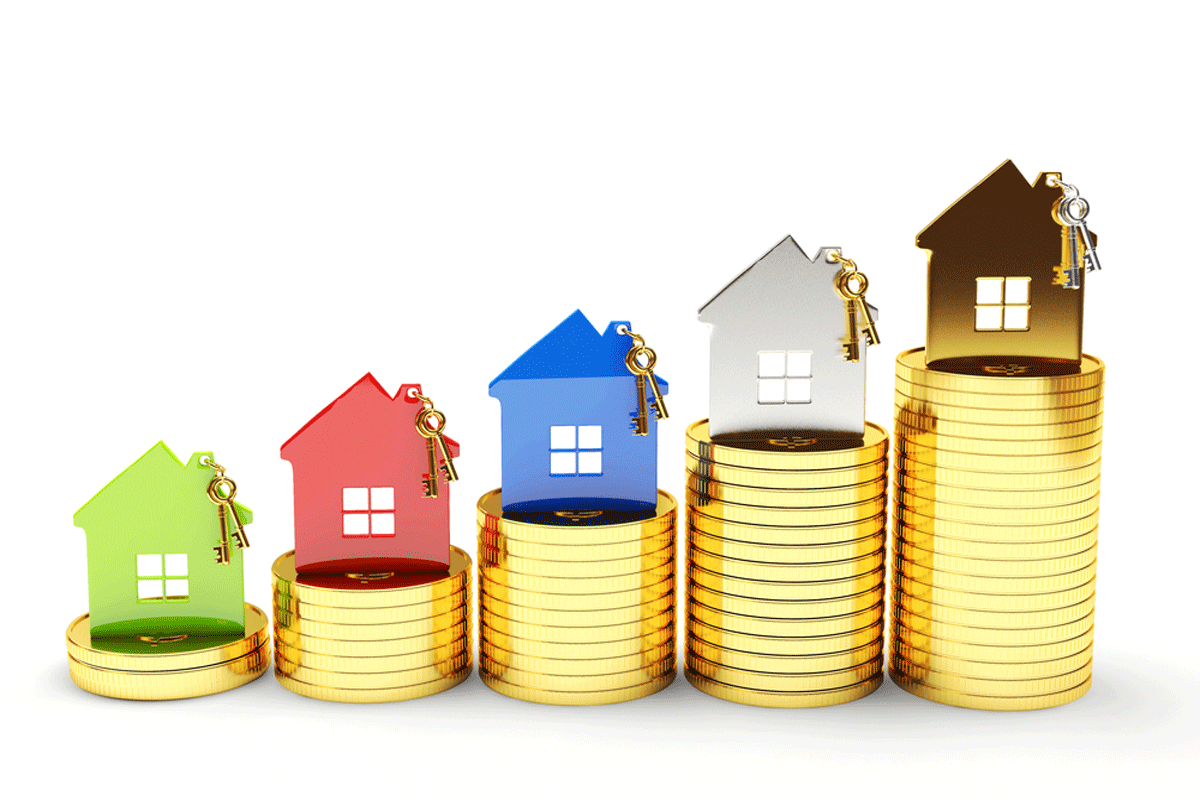

In this project we have a set of residential homes of Ames, Iowa. For each home we have features that describe the home, such as number of garages, fireplaces, etc.

The target of the project is predict the price of the house, so we are in front of a regression problem. We have two files, one for training the model and other for test it.

The keys of this project are:
* Data preprocessing and cleaning.
* Data Visualization.
* Exploratory Data Analysis (Univariate, Bivariate and Multi Analysis).
* ML models for regression problem.

You can get the data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# Table of Contents

- [Import Libreries](#import)   
- [Data preprocessing / Data Cleaning](#preprocessing)
- [Univariate Analysis](#uni)
- [Bivariate Analysis](#bi)
- [Multivariate Analysis](#multi)
- [Feature Engineering](#feature)
- [Models](#models)
- [Conclusion](#conclusion)

## Import Libreries

In [1]:
import pandas as pd
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from skopt import BayesSearchCV
import xgboost as xg
import plotly.express as px

!pip install pywaffle
from pywaffle import Waffle

pd.set_option('display.max_columns', None)

## Data preprocessing / Data Cleaning

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [3]:
df_train.shape

(1460, 81)

We have 1460 records and 81 features.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see, we have 81 features, some of them have empty values. We have as categorical as numerical features. Our target is **SalePrice**, this is a numerical feature, so we have a regression problem.

Let's take a look at our target.

In [5]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
df_train["SalePrice"].mode()

0    140000
Name: SalePrice, dtype: int64

In [7]:
scipy.stats.skew(df_train["SalePrice"])

1.880940746034036

The mean of the houses have a price of 180K, the most popular prices (mode) is 140K, and the median price is 163000.

Looking at the difference between the mean and the median, we can say that there are some outliers and that the distribution is right skewed (we can confirm that based on the skew value also).

In [14]:
def plot_numerical_distribution(df, feature):
    """ 
    Plot Histogram and box plots
    
    Parameters
    ----------
    df : dataframe
        Dataframe that contains the data
    feature : numerical feature name
        numerical feature name to plot
    """
    fix, ax = plt.subplots(2, 1, figsize = (8, 8))
    asd = sns.histplot(data=df, x=feature, color="#337CCF", kde=True, ax = ax[0], bins=150)
    ax[0].axvline(x = df[feature].mean(), color="#e31a1c", ls="--")
    ax[0].axvline(x = df[feature].mode()[0], color="black", ls="-")
    ax[0].axvline(x = df[feature].median(), color="#db57b2", ls=":")
    sns.boxplot(x=df[feature], ax = ax[1])
    ax[1].set_xlabel(feature)
    asd.set_title(feature + ' Distribution', fontsize = 15, loc="left")
    asd.set_ylabel('Count', fontsize = 13, loc="bottom")
    asd.set_xlabel(feature, fontsize = 13, loc="left")
    sns.despine()

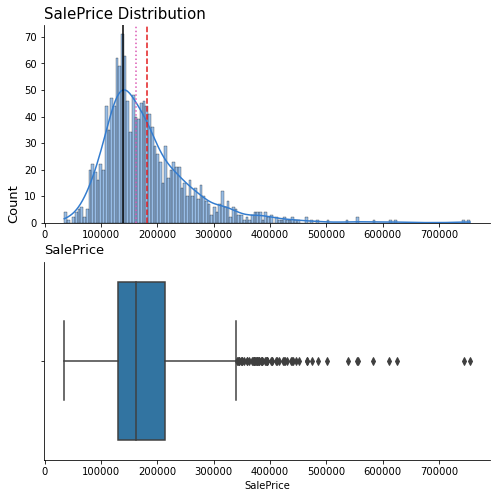

In [15]:
plot_numerical_distribution(df_train, 'SalePrice')

Here we can see that the price of most of houses are between 130K and 170K. Also, we can see many outliers, with price 500K, 600K and more than 700K.

Also, looking at the standard deviation we can say that most of the prices are close.

With the plot we confirm that shape looks like right distribution.

------------------

### Missing data

As we have too many features, I will check the Mutual Information and correlation in order to find the main features.

But first at all, we have to deal with the missing values.

In [9]:
obj = df_train.isnull().sum()
for key,value in obj.items():
    if value > 0:
        print(key,",",value)

LotFrontage , 259
Alley , 1369
MasVnrType , 8
MasVnrArea , 8
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinType2 , 38
Electrical , 1
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageQual , 81
GarageCond , 81
PoolQC , 1453
Fence , 1179
MiscFeature , 1406


#### LotFrontage

Linear feet of street connected to property.

We have 259 missing values  in this feature.

In [10]:
df_train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
df_train["LotFrontage"].mode()

0    60.0
Name: LotFrontage, dtype: float64

The mean and median have similar value close to 70, but the mode is 60.

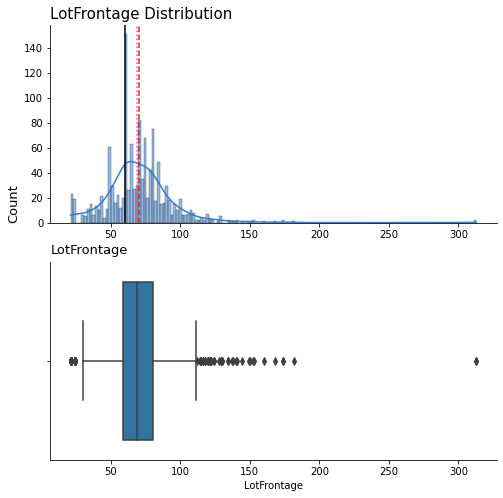

In [16]:
plot_numerical_distribution(df_train, 'LotFrontage')

The mean and median are similar, so I will impute the missing values with the mean. In the future, if this feature has strength on our target, we can find another way to impute.

In [17]:
df_train["LotFrontage"].fillna(inplace=True, value=df_train["LotFrontage"].mean())

#### MasVnrType and MasVnrArea

- MasVnrType, 8 Missing values.
- MasVnrArea, 8 Missing values.

MasVnrType is Masonry veneer type, and MasVnrArea is Masonry veneer area in square feet.

We have the same numbers of missing values in both, so I will analize together.

MasVnrType is a categorical feature, this is about the masonry veneer type.

In [313]:
df_train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
def show_waffle_plot(df, feature):
    """ 
    Show a waffle plot of a categorical feature
    
    Parameters
    ----------
    df : dataframe
        Dataframe that contains the data
    feature : categorical feature name
        categorical feature name to plot
    """
    mas_vnr_type_count = df.groupby(by=feature).count().rename(columns={"Id": "Count"})[["Count"]]
    fig = plt.figure(
        FigureClass=Waffle, 
        rows=25,
        icon_size=10, 
        figsize=(10, 20),
        values=mas_vnr_type_count["Count"], 
        title={'label': 'MasVnrType Values Count', 'loc': 'center'},
        labels=["{0} ({1})".format(k, v) for k, v in mas_vnr_type_count["Count"].items()],
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(mas_vnr_type_count), 'framealpha': 0}
    )
    fig.gca().set_facecolor('#EEEEEE')
    fig.set_facecolor('#EEEEEE')
    plt.show()

I use waffle plot for categorical features because there are a big difference among the number of occurrences of each category.

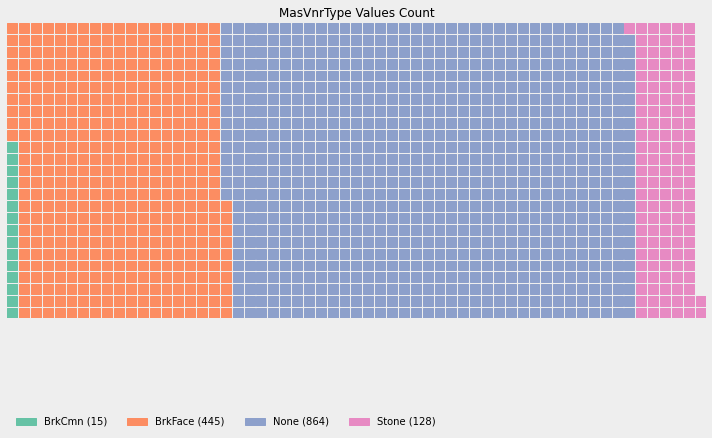

In [19]:
show_waffle_plot(df_train, 'MasVnrType')

Most of the MasVnrType are None, so I'll fill the NAN with that value, and as MasVnrArea is a numerical feature, I'll fill it with 0.

In [20]:
df_train["MasVnrType"].fillna(inplace=True, value="None")
df_train["MasVnrArea"].fillna(inplace=True, value=0.0)

#### BsmtQual, BsmtCond,  BsmtExposure, BsmtFinType1 and BsmtFinType2

- BsmtQual, 37 Missing values.
- BsmtCond, 37 Missing values.
- BsmtExposure, 38 Missing values.
- BsmtFinType1, 37 Missing values.
- BsmtFinType2, 38 Missing values.

- BsmtQual: Evaluates the height of the basement.
- BsmtCond: Evaluates the general condition of the basement.
- BsmtExposure: Refers to walkout or garden level walls.
- BsmtFinType1: Rating of basement finished area.
- BsmtFinType2: Rating of basement finished area (if multiple types).

These features are related to the basement.

In BsmtQual, BsmtCond and BsmtFinType1 we have 37 missing values. On the other hand, in BsmtExposure and BsmtFinType2 have one more, 38.

All the features are categoricals, let's see their values.

In [316]:
df_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

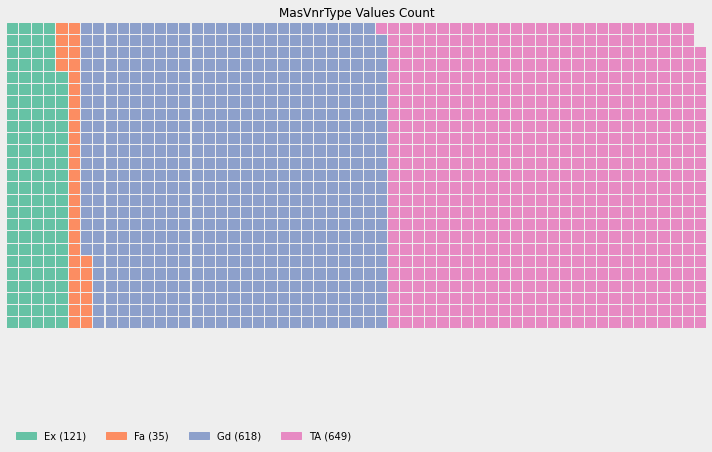

In [21]:
show_waffle_plot(df_train, 'BsmtQual')

The most common values are TA (Typical) with 649 values and Gd (Good) with 618 values. Based on the documentation, the possible values are:
 - Ex: Excellent
 - Gd: Good
 - TA: Typical
 - Fa: Fair
 - Po: Poor
 - NA: No Basement

In [22]:
df_train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

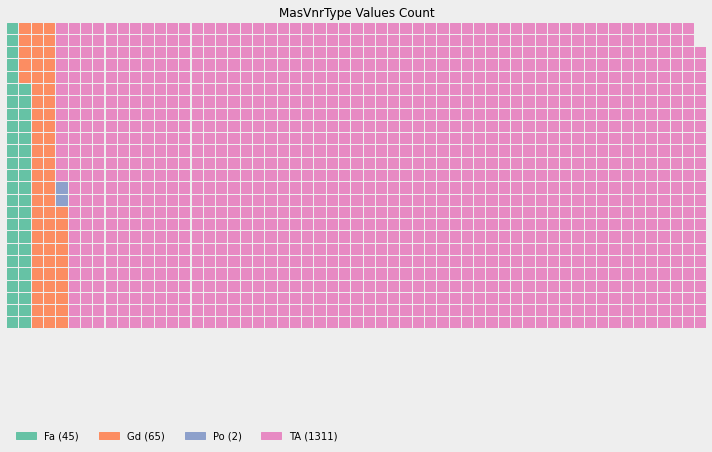

In [23]:
show_waffle_plot(df_train, 'BsmtCond')

The most common value is TA (Typical) with 1311 values. Based on the documentation, the possible values are:
 - Ex: Excellent
 - Gd: Good
 - TA: Typical
 - Fa: Fair
 - Po: Poor
 - NA: No Basement

In [24]:
df_train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

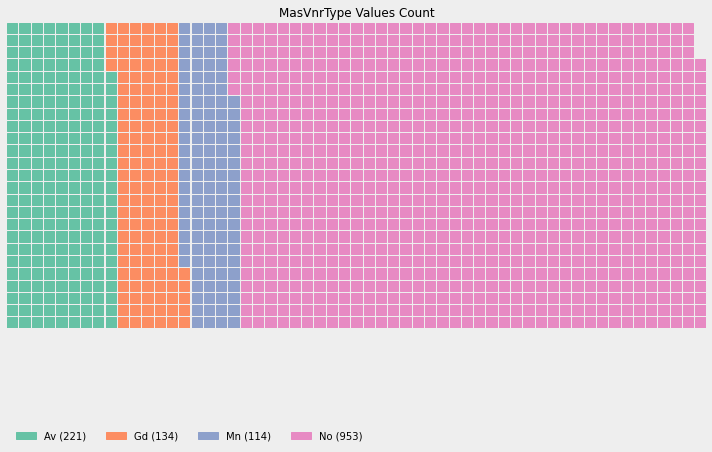

In [25]:
show_waffle_plot(df_train, 'BsmtExposure')

The mode is No (No Exposure) with 953 values. Based on the documentation, the possible values are:
 - No: No Exposure
 - Av: Average Exposure
 - Mn: Mimimum Exposure
 - Fa: Fair
 - NA: No Basement

In [26]:
df_train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

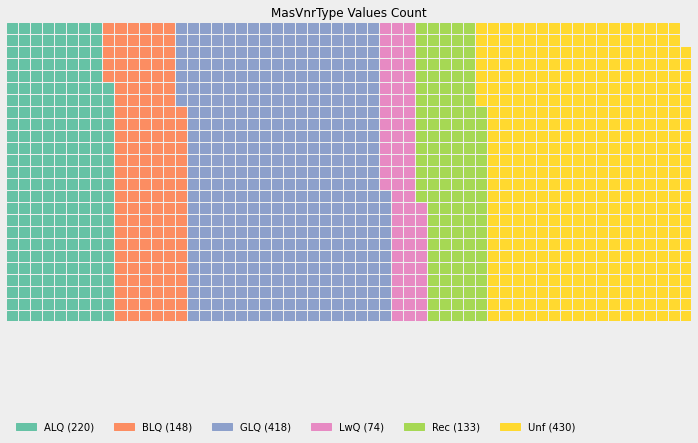

In [27]:
show_waffle_plot(df_train, 'BsmtFinType1')

The most common value are Unf (Unfinshed) with 430 and GQL (Good Living Quarters) with 418 records. Based on the documentation, the possible values are:

- GLQ: Good Living Quarters
- ALQ: Average Living Quarters
- BLQ: Below Average Living Quarters	
- Rec: Average Rec Room
- LwQ: Low Quality
- Unf: Unfinshed
- NA: No Basement

In [28]:
df_train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

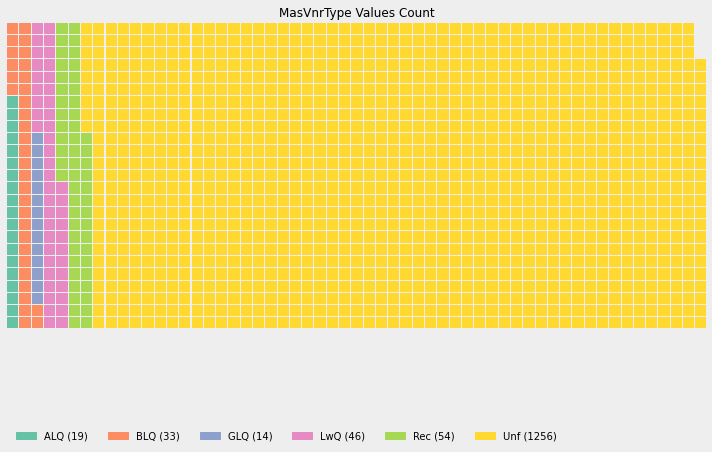

In [29]:
show_waffle_plot(df_train, 'BsmtFinType2')

The most common value in Unf (Unfinshed) with 1256 records. Based on the documentation, the possible values are:
 - GLQ: Good Living Quarters
 - ALQ: Average Living Quarters
 - BLQ: Below Average Living Quarters
 - Rec: Average Rec Room
 - LwQ: Low Quality
 - Unf: Unfinshed
 - NA: No Basement

In [30]:
df_train[df_train["BsmtQual"].isnull()].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17    18          90       RL         72.0    10791   Pave   NaN      Reg   
39    40          90       RL         65.0     6040   Pave   NaN      Reg   
90    91          20       RL         60.0     7200   Pave   NaN      Reg   
102  103          90       RL         64.0     7018   Pave   NaN      Reg   
156  157          20       RL         60.0     7200   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102         Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
17        Norm   Duplex     1Story            4            5       1967   
39        Norm   Duplex     1Story            4            5       1955   
90        Norm     1Fam     1Story            4            5       1950   
102       Norm   Duplex     1Story            5            5       1979   
156       Norm     1Fam     1Story            5            7       1950   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
17           1967     Gable  CompShg     MetalSd     MetalSd       None   
39           1955     Gable  CompShg     AsbShng     Plywood       None   
90           1950     Gable  CompShg     BrkFace     Wd Sdng       None   
102          1979     Gable  CompShg     HdBoard     HdBoard       None   
156          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
17          0.0        TA        TA       Slab      NaN      NaN          NaN   
39          0.0        TA        TA      PConc      NaN      NaN          NaN   
90          0.0        TA        TA       Slab      NaN      NaN          NaN   
102         0.0        TA        Fa       Slab      NaN      NaN          NaN   
156         0.0        TA        TA     CBlock      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
17           NaN           0          NaN           0          0            0   
39           NaN           0          NaN           0          0            0   
90           NaN           0          NaN           0          0            0   
102          NaN           0          NaN           0          0            0   
156          NaN           0          NaN           0          0            0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
17     GasA        TA          Y      SBrkr      1296         0             0   
39     GasA        TA          N      FuseP      1152         0             0   
90     GasA        TA          Y      FuseA      1040         0             0   
102    GasA        TA          Y      SBrkr      1535         0             0   
156    GasA        TA          Y      FuseF      1040         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
17        1296             0             0         2         0             2   
39        1152             0             0         2         0             2   
90        1040             0             0         1         0             2   
102       1535             0             0         2         0             4   
156       1040             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
17              2          TA             6        Typ           0   
39              2          Fa             6        Typ           0   
90              1          TA             4       

Looking at above, we can see that when these features are NaN, other features related to basement like BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF are 0. So, we can say that the features are NaN because the house doesn't have a basement.

But what is happennig with the one more value in BsmtExposure and BsmtFinType2?

In [31]:
df_train[((df_train["BsmtExposure"].isnull()) & (df_train["BsmtFinType1"].isnull()==False))].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
948  949          60       RL         65.0    14006   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
948         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
948       Norm     1Fam     2Story            7            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
948          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
948       144.0        Gd        TA      PConc       Gd       TA          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
948          Unf           0          Unf           0        936          936   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
948    GasA        Ex          Y      SBrkr       936       840             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
948       1776             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
948             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
948          TA     Attchd       2002.0          RFn           2         474   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
948         TA         TA          Y         144           96              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
948          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
948       2    2006       WD        Normal     192500

In case of BsmtExposure, we can see that the basement is not finished because the values of BsmtFinType1 and BsmtFinType2 are Unf, and the values of BsmtFinSF1 and BsmtFinSF2 are 0. Moreover, in BsmtUnfSF we have the value 936 and the same in TotalBsmtSF.

Based on that, I will imput the feature with No.

In [32]:
df_train[((df_train["BsmtFinType2"].isnull()) & (df_train["BsmtFinType1"].isnull()==False))].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
332         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
332       Norm     1Fam     1Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
332          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
332       296.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
332          GLQ        1124          NaN         479       1603         3206   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
332    GasA        Ex          Y      SBrkr      1629         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
332       1629             1             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
332             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
332          Gd     Attchd       2003.0          RFn           3         880   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
332         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
332          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
332      10    2009       WD        Normal     284000

In case of BsmtFinType2, it seems that the value is missing by error, because we have a value in BsmtFinSF2. As we have different values in BsmtUnfSF and TotalBsmtSF, I will fill the nan with Unf.

First at all, I will fill the special cases of BsmtFinType2 and BsmtExposure.

In [33]:
df_train.loc[((df_train["BsmtFinType2"].isnull()) & (df_train["BsmtFinType1"].isnull()==False)), "BsmtFinType2"] = "Unf"

In [34]:
df_train.loc[((df_train["BsmtExposure"].isnull()) & (df_train["BsmtFinType1"].isnull()==False)), "BsmtExposure"] = "No"

Now, the cases of No Basement.

In [35]:
df_train["BsmtQual"].fillna(inplace=True, value="NA")
df_train["BsmtCond"].fillna(inplace=True, value="NA")
df_train["BsmtExposure"].fillna(inplace=True, value="NA")
df_train["BsmtFinType1"].fillna(inplace=True, value="NA")
df_train["BsmtFinType2"].fillna(inplace=True, value="NA")

#### Electrical

Electrical system.

We have just 1 Missing value.

In [332]:
df_train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

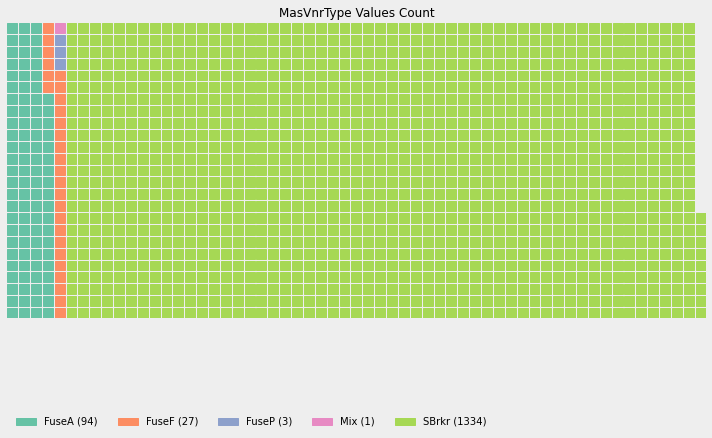

In [36]:
show_waffle_plot(df_train, 'Electrical')

The most popular value is SBrkr (Standard Circuit Breakers & Romex) with 1334 records. Based on the documentarion, the possible values are:
- SBrkr: Standard Circuit Breakers & Romex
- FuseA: Fuse Box over 60 AMP and all Romex wiring (Average)	
- FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix: Mixed

In [37]:
df_train[df_train["Electrical"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

As we have only one missing value, so I will fill it with SBrkr, the mode.

In [38]:
df_train["Electrical"].fillna(inplace=True, value="SBrkr")

#### FireplaceQu

- FireplaceQu, 690 Missing values.

In [39]:
df_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

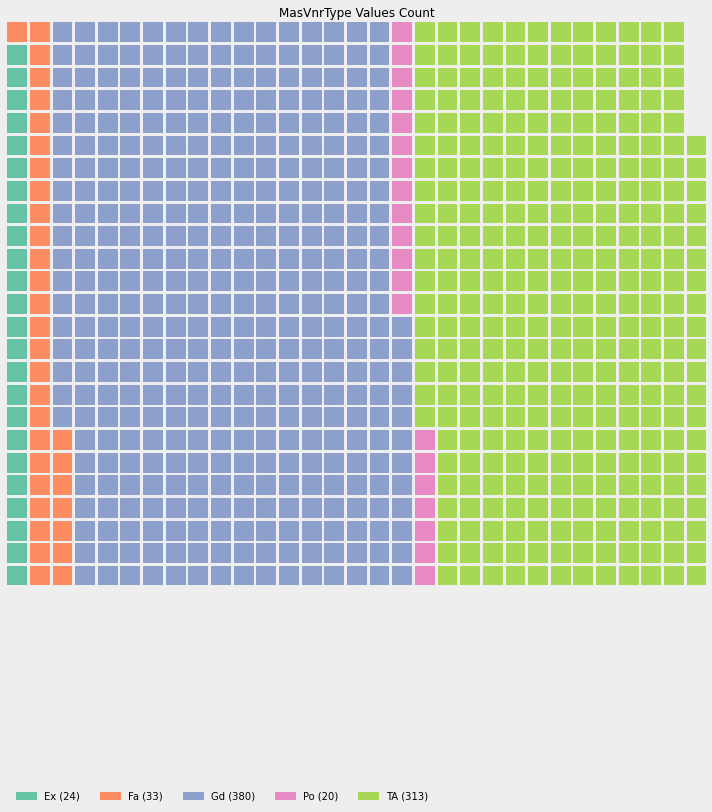

In [40]:
show_waffle_plot(df_train, 'FireplaceQu')

The most common value is the NaN, and the next one is Gd (Good). Based on the documentation, the possible values are:
- Ex Excellent - Exceptional Masonry Fireplace
- Gd: Good - Masonry Fireplace in main level
- TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa: Fair - Prefabricated Fireplace in basement
- Po: Poor - Ben Franklin Stove
- NA: No Fireplace

In [41]:
df_train[df_train["FireplaceQu"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL    65.000000     8450   Pave   NaN      Reg   
5        6          50       RL    85.000000    14115   Pave   NaN      IR1   
10      11          20       RL    70.000000    11200   Pave   NaN      Reg   
12      13          20       RL    70.049958    12968   Pave   NaN      IR2   
15      16          45       RM    51.000000     6120   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1452  1453         180       RM    35.000000     3675   Pave   NaN      Reg   
1453  1454          20       RL    90.000000    17217   Pave   NaN      Reg   
1454  1455          20       FV    62.000000     7500   Pave  Pave      Reg   
1458  1459          20       RL    68.000000     9717   Pave   NaN      Reg   
1459  1460          20       RL    75.000000     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
5            Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
10           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
12           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
15           Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
...          ...       ...       ...       ...          ...        ...   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
5          Norm     1Fam     1.5Fin            5            5       1993   
10         Norm     1Fam     1Story            5            5       1965   
12         Norm     1Fam     1Story            5            6       1962   
15         Norm     1Fam     1.5Unf            7            8       1929   
...         ...      ...        ...          ...          ...        ...   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5             1995     Gable  CompShg     VinylSd     VinylSd       None   
10            1965       Hip  CompShg     HdBoard     HdBoard       None   
12            1962       Hip  CompShg     HdBoard     Plywood       None   
15            2001     Gable  CompShg     Wd Sdng     Wd Sdng       None   
...            ...       ...      ...         ...         ...        ...   
1452          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1453          2006     Gable  CompShg     VinylSd     VinylSd       None   
1454          2005     Gable  CompShg     VinylSd     VinylSd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
5            0.0        TA        TA       Wood       Gd       TA   
10           0.0        TA        TA     CBlock       TA       TA   
12           0.0        TA        TA     CBlock       TA       TA   

Here the NaNs seem to be because the houses don't have a fireplace. We can say that base on the value of the feature Fireplaces with 0. So, I will imput the NaNs with NA (No Fireplace).

In [42]:
df_train["FireplaceQu"].fillna(inplace=True, value="NA")

#### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

- GarageType, 81 Missing values.
- GarageYrBlt, 81 Missing values.
- GarageFinish, 81 Missing values.
- GarageQual, 81 Missing values.
- GarageCond, 81 Missing values.

- GarageType: Garage location.
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage.
- GarageQual: Garage quality
- GarageCond: Garage condition

These features are related to the Garage.

In [43]:
df_train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

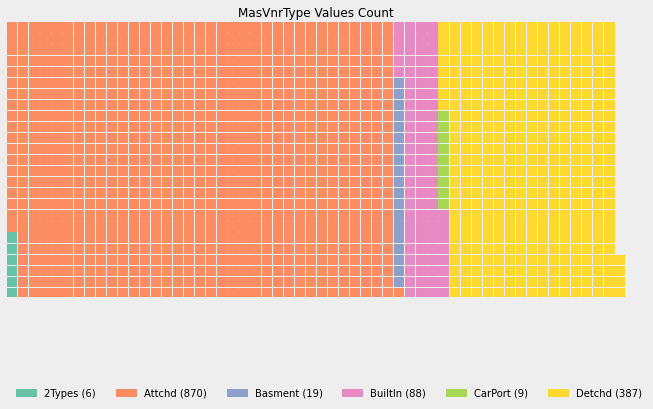

In [44]:
show_waffle_plot(df_train, 'GarageType')

The mode is Attchd (Attached to home) with 870 records. Based on the documentation, the possible values are:
- 2Types: More than one type of garage
- Attchd: Attached to home
- Basment: Basement Garage
- BuiltIn: Built-In (Garage part of house - typically has room above garage)
- CarPort: Car Port
- Detchd: Detached from home
- NA: No Garage

GarageYrBlt is a numerical feature, let's see their distribution.

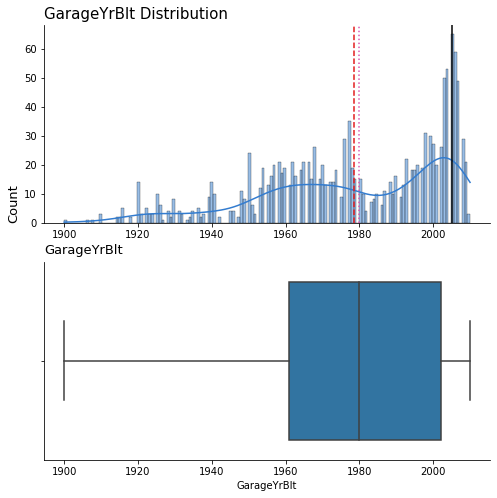

In [45]:
plot_numerical_distribution(df_train, 'GarageYrBlt')

Most of the garages were built between 2004 and 2009. We can see that it looks like left-skewed.

In [343]:
df_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

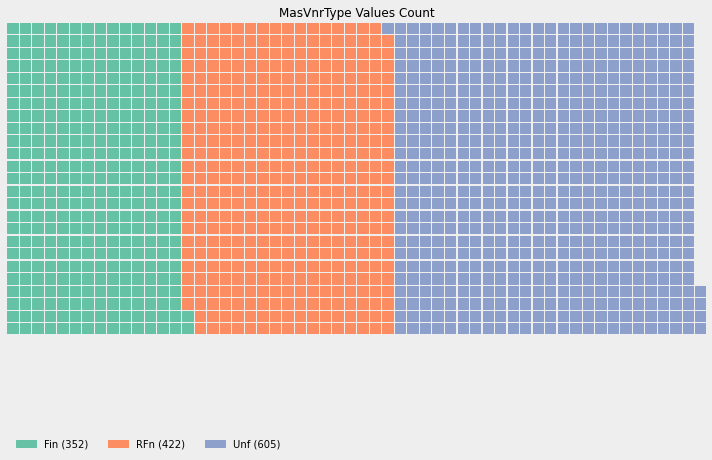

In [46]:
show_waffle_plot(df_train, 'GarageFinish')

Most of the houses have their garage unfinished, with 605 houses. Based on the documentation, the possible values are:
- Fin: Finished
- RFn: Rough Finished	
- Unf: Unfinished
- NA: No Garage

In [47]:
df_train["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

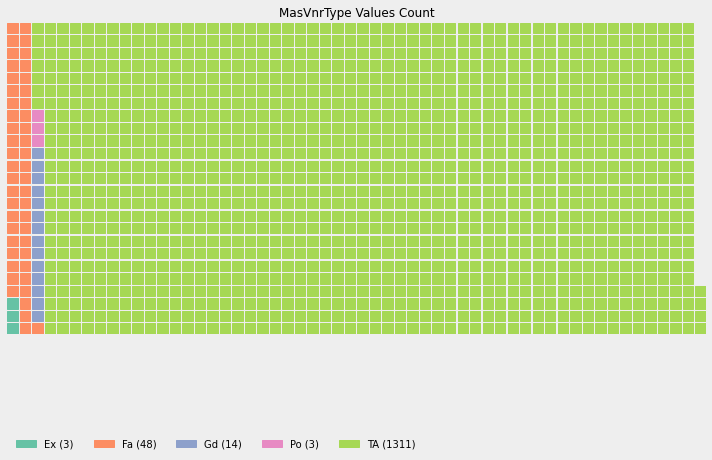

In [48]:
show_waffle_plot(df_train, 'GarageQual')

The mode is TA (Typical/Average) with 1311 records. Based on the documentation, the possible values are:
- Ex: Excellent
- Gd: Good
- TA: ypical/Average
- Fa: Fair
- Po: Poor
- NA: No Garage

In [347]:
df_train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

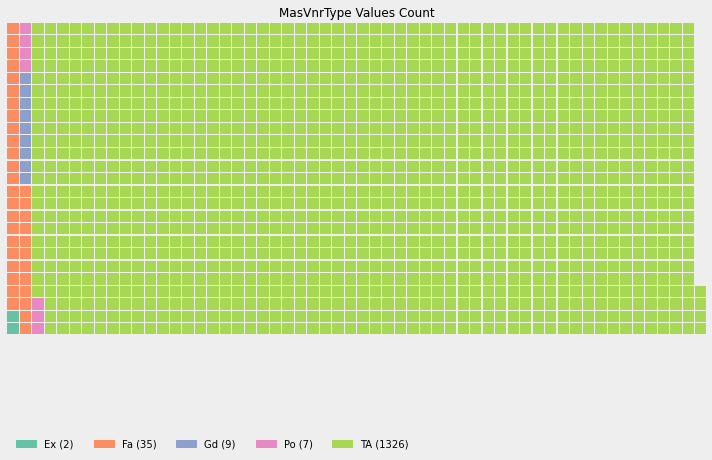

In [49]:
show_waffle_plot(df_train, 'GarageCond')

Most of the houses have Typical/Average garages. Based on the documentation, the possible values are:
- Ex: Excellent
- Gd: Good
- TA: Typical/Average
- Fa: Fair
- Po: Poor
- NA: No Garage  

After analysing each feature, let's explore the data.

In [50]:
df_train[df_train["GarageCond"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39      40          90       RL    65.000000     6040   Pave   NaN      Reg   
48      49         190       RM    33.000000     4456   Pave   NaN      Reg   
78      79          90       RL    72.000000    10778   Pave   NaN      Reg   
88      89          50  C (all)   105.000000     8470   Pave   NaN      IR1   
89      90          20       RL    60.000000     8070   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1349  1350          70       RM    50.000000     5250   Pave  Pave      Reg   
1407  1408          20       RL    70.049958     8780   Pave   NaN      IR1   
1449  1450         180       RM    21.000000     1533   Pave   NaN      Reg   
1450  1451          90       RL    60.000000     9000   Pave   NaN      Reg   
1453  1454          20       RL    90.000000    17217   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
39           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
48           Lvl    AllPub    Inside       Gtl      OldTown       Norm   
78           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
88           Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
89           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
...          ...       ...       ...       ...          ...        ...   
1349         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1407         Lvl    AllPub    Corner       Gtl      Mitchel       Norm   
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
39         Norm   Duplex     1Story            4            5       1955   
48         Norm   2fmCon     2Story            4            5       1920   
78         Norm   Duplex     1Story            4            5       1968   
88        Feedr     1Fam     1.5Fin            3            2       1915   
89         Norm     1Fam     1Story            4            5       1994   
...         ...      ...        ...          ...          ...        ...   
1349       Norm     1Fam     2Story            8            5       1872   
1407       Norm     1Fam     1Story            5            5       1985   
1449       Norm    Twnhs     SFoyer            5            7       1970   
1450       Norm   Duplex     2Story            5            5       1974   
1453       Norm     1Fam     1Story            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
39            1955     Gable  CompShg     AsbShng     Plywood       None   
48            2008     Gable  CompShg     MetalSd     MetalSd       None   
78            1968       Hip  CompShg     HdBoard     HdBoard       None   
88            1982       Hip  CompShg     Plywood     Plywood       None   
89            1995     Gable  CompShg     VinylSd     VinylSd       None   
...            ...       ...      ...         ...         ...        ...   
1349          1987     Gable  CompShg     MetalSd     MetalSd       None   
1407          1985     Gable  CompShg     HdBoard     Plywood       None   
1449          1970     Gable  CompShg     CemntBd     CmentBd       None   
1450          1974     Gable  CompShg     VinylSd     VinylSd       None   
1453          2006     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
39           0.0        TA        TA      PConc       NA       NA   
48           0.0        TA        TA     BrkTil       TA       TA   
78           0.0        TA        TA     CBlock       TA       TA   
88           0.0        Fa        Fa     CBlock       TA       Fa   

Here we have the same situation than the fireplaces, it seems that these houses don't have a garage. The values of GarageCars and GarageArea with 0 confirm this.

In [51]:
df_train["GarageType"].fillna(inplace=True, value="NA")
df_train["GarageYrBlt"].fillna(inplace=True, value=0)
df_train["GarageFinish"].fillna(inplace=True, value="NA")
df_train["GarageQual"].fillna(inplace=True, value="NA")
df_train["GarageCond"].fillna(inplace=True, value="NA")

#### Alley

Type of alley access to property.

In this we have 1369 Missing values.

In [52]:
df_train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

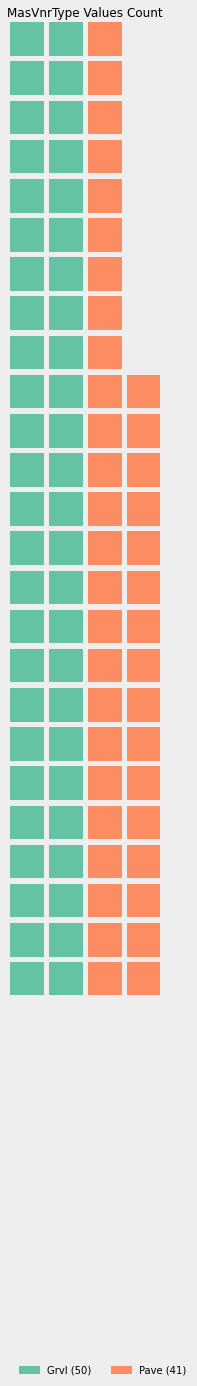

In [53]:
show_waffle_plot(df_train, 'Alley')

Most are NaNs, the next value is Grvl. The possible value based on the documentation are:
- Grvl: Gravel
- Pave: Paved
- NA: No alley access

In [54]:
df_train[df_train["Alley"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

It seems that here we have the same situation than with the fireplaces, the houses don't have an Alley. Then I will fill with NA (No alley access).

In [55]:
df_train["Alley"].fillna(inplace=True, value="NA")

#### PoolQC

Pool quality.

We have here 1453 Missing values.

In [56]:
df_train["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

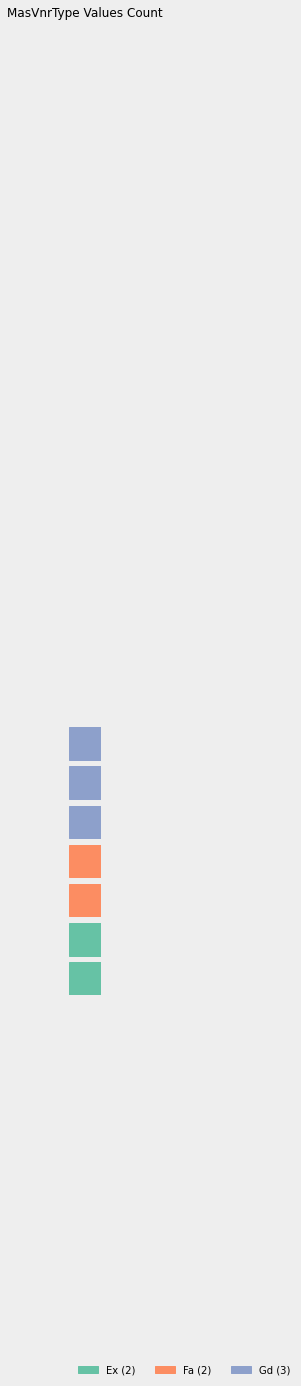

In [57]:
show_waffle_plot(df_train, 'PoolQC')

Most of the houses have nan in PoolQC. The possible values are:
- Ex: Excellent
- Gd: Good
- TA: Average/Typical
- Fa: Fair
- NA: No Pool

In [58]:
df_train[df_train["PoolQC"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1456  1457          20       RL         85.0    13175   Pave    NA      Reg   
1457  1458          70       RL         66.0     9042   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [59]:
df_train[df_train["PoolQC"].isnull() == False]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL   174.000000    25419   Pave    NA      Reg   
810    811          20       RL    78.000000    10140   Pave    NA      Reg   
1170  1171          80       RL    76.000000     9880   Pave    NA      Reg   
1182  1183          60       RL   160.000000    15623   Pave    NA      IR1   
1298  1299          60       RL   313.000000    63887   Pave    NA      IR3   
1386  1387          60       RL    80.000000    16692   Pave    NA      IR1   
1423  1424          80       RL    70.049958    19690   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
810          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1170         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   
1423         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197        Norm     1Fam     2Story            8            4       1918   
810        Norm     1Fam     1Story            6            6       1974   
1170       Norm     1Fam       SLvl            6            6       1977   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   
1386       Norm     1Fam     2Story            7            5       1978   
1423       Norm     1Fam       SLvl            6            7       1966   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197           1990     Gable  CompShg      Stucco      Stucco       None   
810           1999       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1170          1977     Gable  CompShg     Plywood     Plywood       None   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   
1423          1966      Flat  Tar&Grv     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
197          0.0        Gd        Gd      PConc       TA       TA   
810         99.0        TA        TA     CBlock       TA       TA   
1170         0.0        TA        TA     CBlock       TA       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   
1423         0.0        Gd        Gd     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
197            No          GLQ        1036          LwQ         184   
810            No          ALQ         663          LwQ         377   
1170           Av          ALQ         522          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   
1386           No          BLQ         790          LwQ         469   
1423           Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
197         140         1360    GasA        Gd          Y      SBrkr   
810           0         1040    GasA        Fa          Y      SBrkr   
1170        574         1096    GasA        TA          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   
1386      

We can see that when PoolQC is NaN we have 0 in PoolArea, and when PoolQC is not NaN, we find numbers in PoolArea.

So it looks like that the houses with NaN in PollQC don't have a pool, so we I can fill them with NA (No Pool).

In [60]:
df_train["PoolQC"].fillna(inplace=True, value="NA")

#### Fence

Fence quality.

We have here 1179 Missing Values.

In [61]:
df_train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

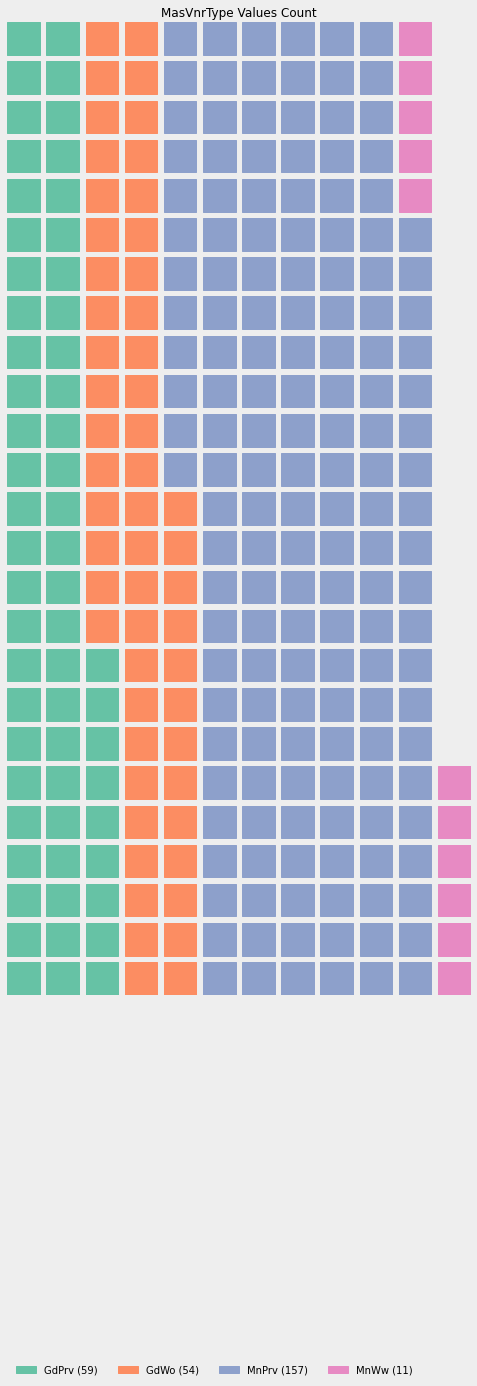

In [62]:
show_waffle_plot(df_train, 'Fence')

After the NaNs, the next common value is MnPrv (Minimum Privacy). The possible values are:
- GdPrv: Good Privacy
- MnPrv: Minimum Privacy
- GdWo: Good Wood
- MnWw: Minimum Wood/Wire
- NA: No Fence

In [63]:
df_train[df_train["Fence"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1453  1454          20       RL         90.0    17217   Pave    NA      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1453          2006     Gable  CompShg     VinylSd     VinylSd       None   
1454          2005     Gable  CompShg     VinylSd     VinylSd       None   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

We can deduce that the NaNs are because the houses don't have a fence, so I will fil them with NA (No Fence).

In [64]:
df_train["Fence"].fillna(inplace=True, value="NA")

#### MiscFeature

Miscellaneous feature not covered in other categories.

We have here 1406 Missing values.

In [65]:
df_train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

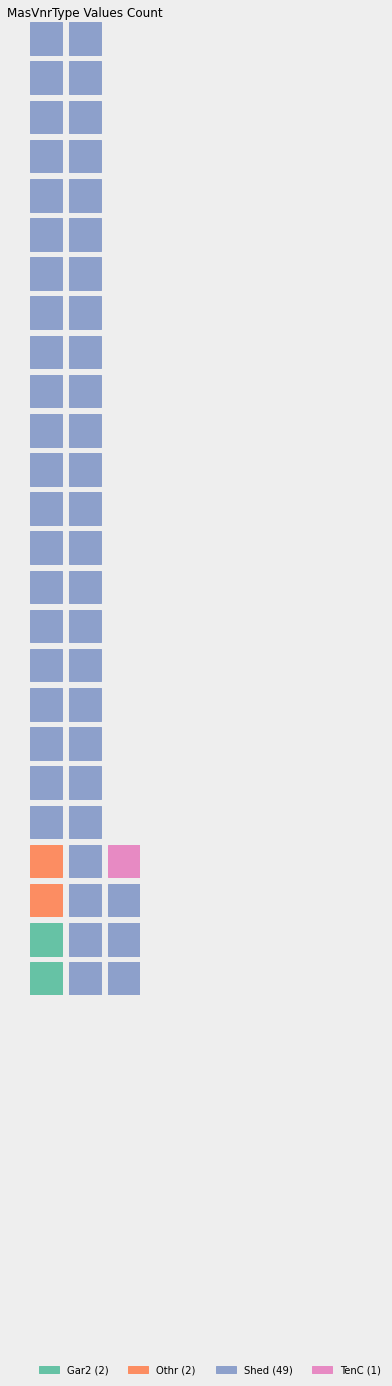

In [66]:
show_waffle_plot(df_train, 'MiscFeature')

The mode is Shed, with 49 houses. The possible values are:
- Elev: Elevator
- Gar2: 2nd Garage (if not described in garage section)
- Othr: Other
- Shed: Shed (over 100 SF)
- TenC: Tennis Court
- NA: None

In [67]:
df_train[df_train["MiscFeature"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1456  1457          20       RL         85.0    13175   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          2005     Gable  CompShg     VinylSd     VinylSd       None   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [68]:
df_train[df_train["MiscFeature"].isnull() == False].head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5      6          50       RL    85.000000    14115   Pave    NA      IR1   
7      8          60       RL    70.049958    10382   Pave    NA      IR1   
16    17          20       RL    70.049958    11241   Pave    NA      IR1   
17    18          90       RL    72.000000    10791   Pave    NA      Reg   
51    52          50       RM    52.000000     6240   Pave    NA      Reg   
84    85          80       RL    70.049958     8530   Pave    NA      IR1   
95    96          60       RL    70.049958     9765   Pave    NA      IR2   
98    99          30       RL    85.000000    10625   Pave    NA      Reg   
99   100          20       RL    77.000000     9320   Pave    NA      IR1   
106  107          30       RM    60.000000    10800   Pave  Grvl      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
5           Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
7           Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
16          Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
51          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
84          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
95          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
98          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
106         Lvl    AllPub    Inside       Gtl      OldTown       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
5         Norm     1Fam     1.5Fin            5            5       1993   
7         Norm     1Fam     2Story            7            6       1973   
16        Norm     1Fam     1Story            6            7       1970   
17        Norm   Duplex     1Story            4            5       1967   
51        Norm     1Fam     1.5Fin            6            6       1934   
84        Norm     1Fam       SLvl            7            5       1995   
95        Norm     1Fam     2Story            6            8       1993   
98        Norm     1Fam     1Story            5            5       1920   
99        Norm     1Fam     1Story            4            5       1959   
106       Norm     1Fam     1Story            4            7       1885   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
5            1995     Gable  CompShg     VinylSd     VinylSd       None   
7            1973     Gable  CompShg     HdBoard     HdBoard      Stone   
16           1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
17           1967     Gable  CompShg     MetalSd     MetalSd       None   
51           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
84           1996     Gable  CompShg     HdBoard     HdBoard    BrkFace   
95           1993     Gable  CompShg     VinylSd     VinylSd    BrkFace   
98           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
99           1959     Gable  CompShg     Plywood     Plywood       None   
106          1995   Mansard  CompShg     VinylSd     VinylSd       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
5           0.0        TA        TA       Wood       Gd       TA           No   
7         240.0        TA        TA     CBlock       Gd       TA           Mn   
16        180.0        TA        TA     CBlock       TA       TA           No   
17          0.0        TA        TA       Slab       NA       NA           NA   
51          0.0        TA        TA      PConc       TA       TA           No   
84         22.0        TA        TA      PConc       Gd       TA           No   
95         68.0        Ex        Gd      PConc       Gd       Gd           No   
98          0.0        TA        TA     BrkTil       T

Here we can see that we have 0 in MiscVal when MiscFeature is NaN. So, we deduce in these cases the houses don't have miscellaneous features. Due to that, I will fill the NaN with NA (None).

In [69]:
df_train["MiscFeature"].fillna(inplace=True, value="NA")

Let's check now all the features to confirm that we don't have any NaNs.

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now that we don't have any feature with NaNs, we can check the Mutual Information (MI) in order to see the how is the strength of the features over the target. 

In [71]:
X = df_train.copy()
y = X.pop("SalePrice")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [72]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

OverallQual     0.561013
YearBuilt       0.372033
GarageCars      0.355011
KitchenQual     0.328925
MSSubClass      0.270449
YearRemodAdd    0.235442
LotFrontage     0.206253
2ndFlrSF        0.192883
Exterior2nd     0.167542
OpenPorchSF     0.146068
Exterior1st     0.125573
OverallCond     0.108946
MasVnrArea      0.088672
GarageCond      0.080707
BedroomAbvGr    0.071907
CentralAir      0.052656
BsmtCond        0.043827
BsmtFinType2    0.033102
LandContour     0.025946
Condition1      0.021402
ExterCond       0.015763
Condition2      0.009578
LowQualFinSF    0.007078
MiscVal         0.003982
3SsnPorch       0.000937
Functional      0.000000
BsmtFinSF2      0.000000
Name: MI Scores, dtype: float64

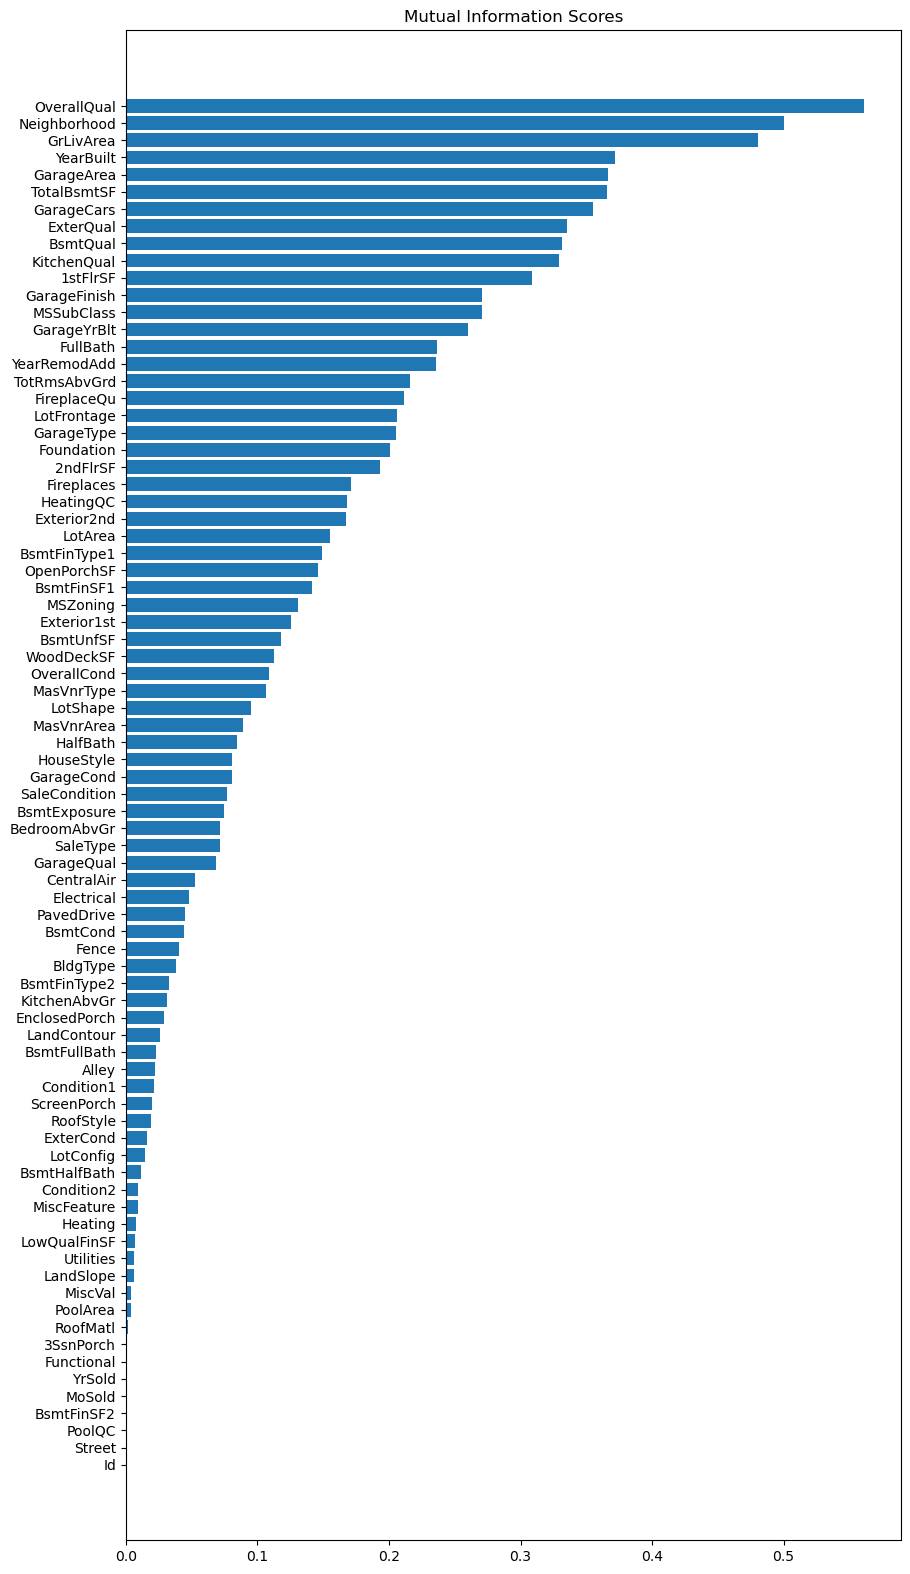

In [73]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10, 20))
plot_mi_scores(mi_scores)

We can see now how features like OverallEqual, Neihborhood and GrlivArea seem to have a high strength in the house's price.

I will take the features with MI more than 0.2 to start the project. It will be 16 features (from 81):
- OverallQual: Rates the overall material and finish of the house
- Neighborhood: Physical locations within Ames city limits
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- TotalBsmtSF: Total square feet of basement area
- YearBuilt: Original construction date
- GarageArea: Size of garage in square feet
- BsmtQual: Evaluates the height of the basement
- KitchenQual: Kitchen quality
- ExterQual: Evaluates the quality of the material on the exterior
- 1stFlrSF: First Floor square feet
- MSSUbClass: Identifies the type of dwelling involved in the sale.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- GarageYrBlt: Year garage was built
- FullBath: Full bathrooms above grade
- GarageFinish: Interior finish of the garage

Let's check now the correlation, and compare it with the output of MI.

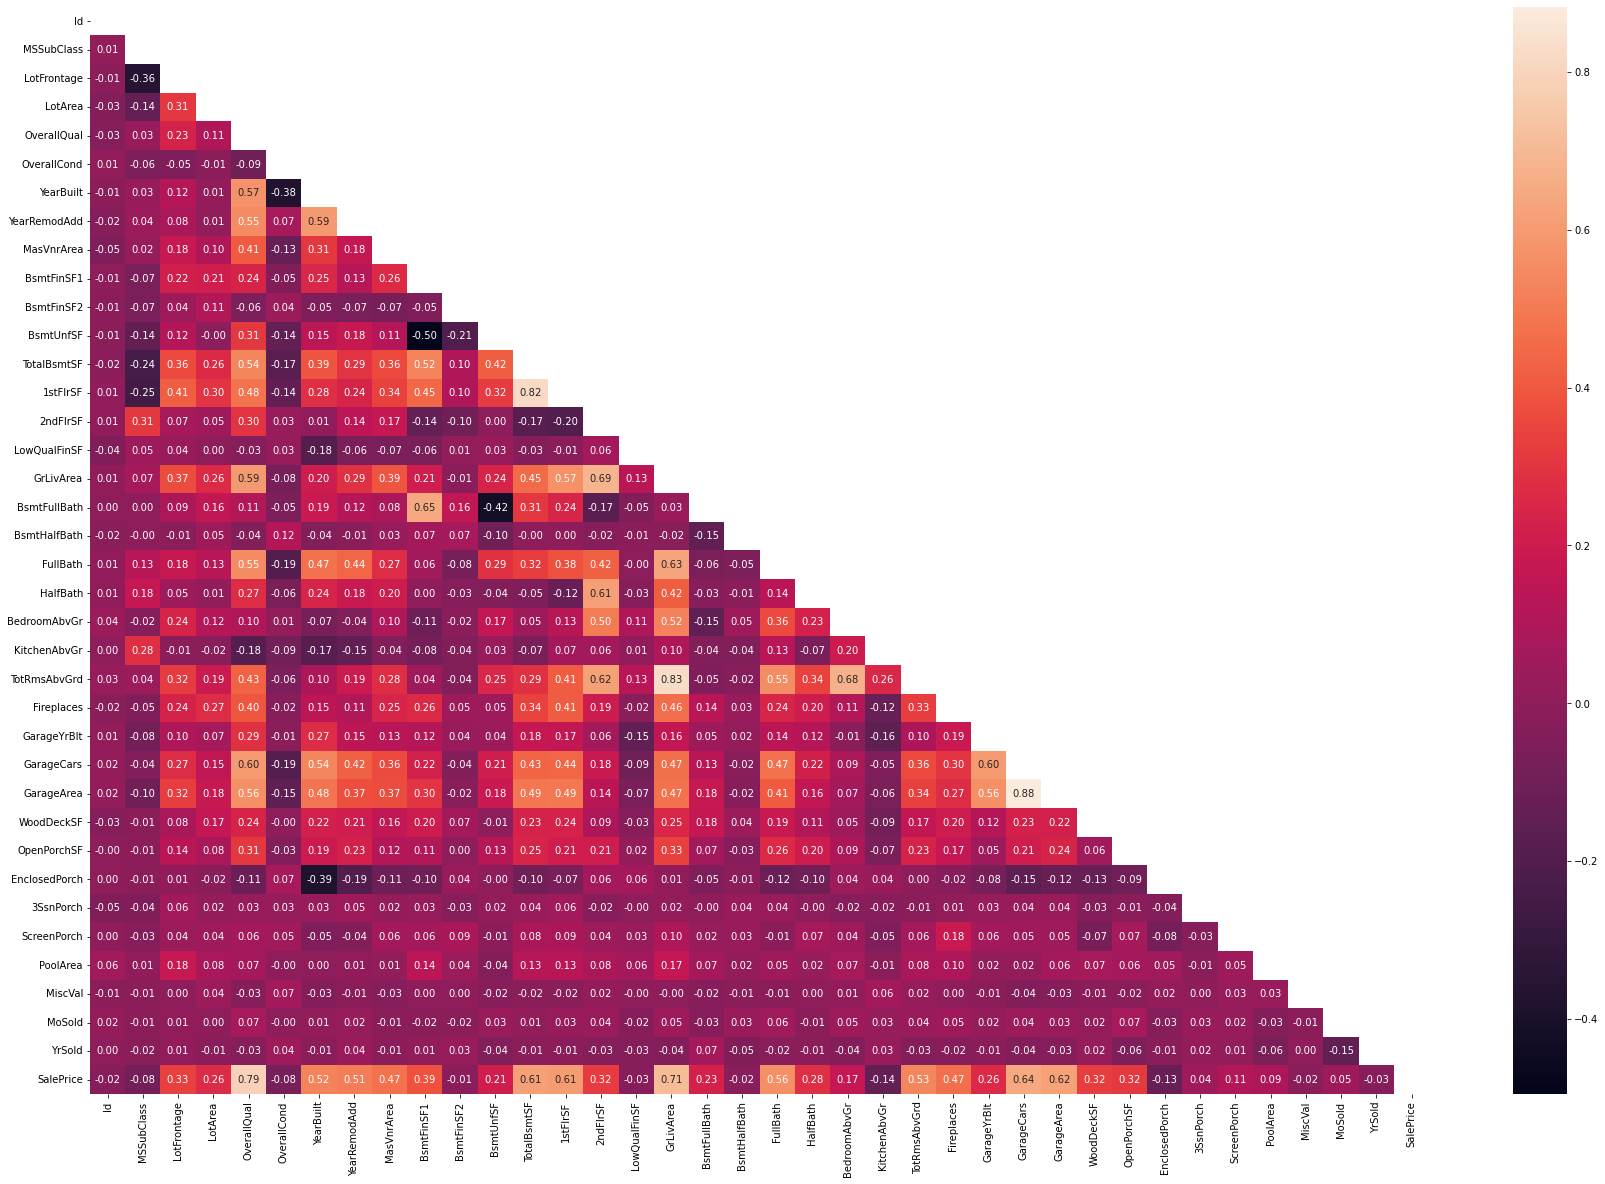

In [74]:
plt.figure(figsize=(30,20))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, mask=matrix, fmt=".2f")
plt.show()

Let's see the features with more than 0.50:
- OverallQual 0.79
- YearBuilt 0.52
- YearRemodAdd 0.51
- TotalBsmtSF 0.61
- 1stFlrSF 0.61
- GrLivArea 0.71
- FullBath 0.56
- TotRmsAbvGrd 0.53
- GarageCars 0.64
- GarageArea 0.62

The only difference with Mutual Information is that we have here the TotRmsAbvGrd (Total rooms above grade).

Let's generate dummies features with the categorical features that we have in the output of MI to check the correlation whit our target.

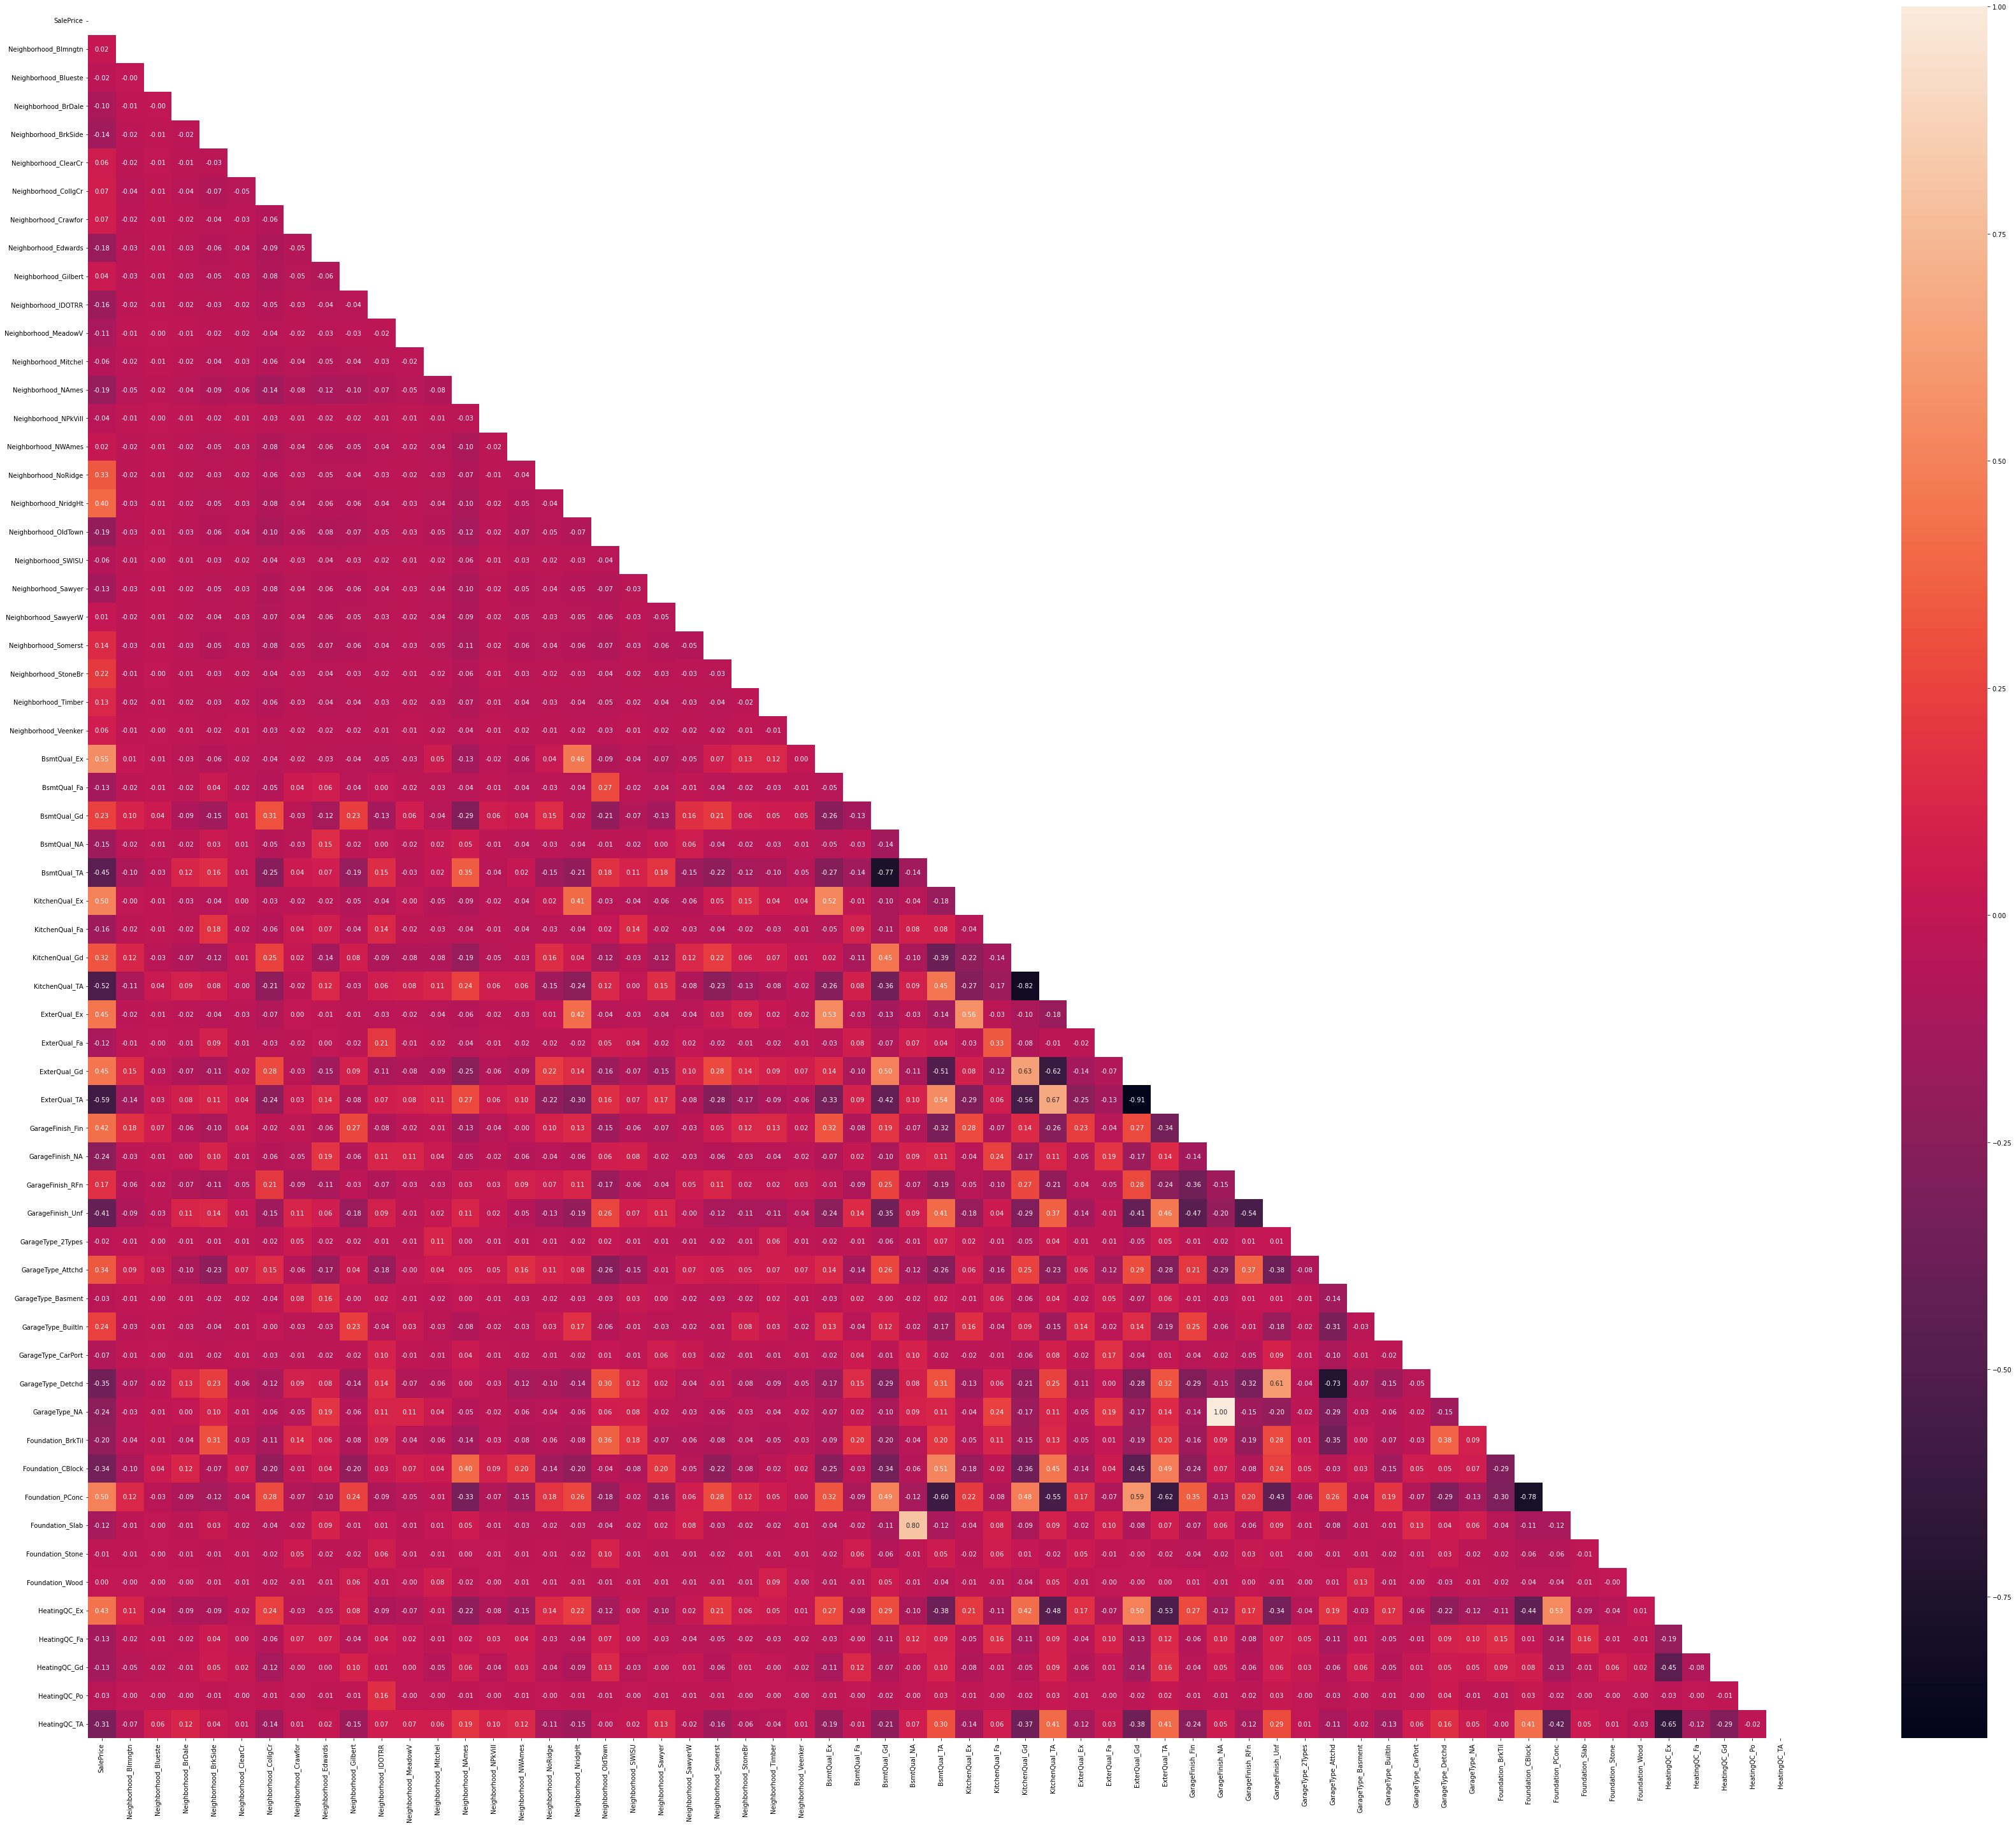

In [77]:
df_dummies = df_train[["Neighborhood", "BsmtQual", "KitchenQual", "ExterQual", "GarageFinish", "GarageType",
                       "Foundation", "HeatingQC", "SalePrice"]].copy()
df_dummies  = pd.get_dummies(df_dummies, prefix=['Neighborhood'], columns=['Neighborhood'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['BsmtQual'], columns=['BsmtQual'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['KitchenQual'], columns=['KitchenQual'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['ExterQual'], columns=['ExterQual'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['GarageFinish'], columns=['GarageFinish'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['GarageType'], columns=['GarageType'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['Foundation'], columns=['Foundation'])
df_dummies  = pd.get_dummies(df_dummies, prefix=['HeatingQC'], columns=['HeatingQC'])

plt.figure(figsize=(60,50))
matrix = np.triu(df_dummies.corr())
sns.heatmap(df_dummies.corr(), annot=True, mask=matrix, fmt=".2f")
plt.show()

It seems that the correlations agree with the output of MI, most of features have positive or negative correlation more than 0.4:
- GarashFinish -> Unf: -0.41
- GarashFinish -> Fin: 0.42
- ExterQual -> Ta: -0.59
- ExterQual -> Gd: 0.45
- ExterQual -> Ex: 0.45
- KitchenQual -> TA: -0.52
- KitchenQual -> Ex: 0.50
- BsmtQual -> Ta: -0.45
- BsmtQual -> Ex: 0.55
- Neighborhood -> NridgHt: 0.40
- Neighborhood -> NoRidge: 0.33

So, we only add the feature TotRmsAbvGrd to our list.

To summarise, we select these 17 features from the 81:
- OverallQual: Rates the overall material and finish of the house
- Neighborhood: Physical locations within Ames city limits
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- TotalBsmtSF: Total square feet of basement area
- YearBuilt:Original construction date
- GarageArea: Size of garage in square feet
- BsmtQual: Evaluates the height of the basement
- KitchenQual: Kitchen quality
- ExterQual: Evaluates the quality of the material on the exterior
- 1stFlrSF: First Floor square feet
- MSSUbClass: Identifies the type of dwelling involved in the sale.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- GarageYrBlt: Year garage was built
- FullBath: Full bathrooms above grade
- GarageFinish: Interior finish of the garage
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Later I added these other features to improve the predictions:
- 2ndFlrSF: Second floor square feet.
- MasVnrArea: Masonry veneer area in square feet.
- BsmtFinSF1: Type 1 finished square feet.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Foundation: Type of foundation.
- GarageType: Garage location.
- Fireplaces: Number of fireplaces.
- HeatingQC: Heating quality and condition.

Let's explore now each feature.

## Univariate Analysis<a name="uni"></a>

### OverallQual 

Rates the overall material and finish of the house.

In [78]:
df_train["OverallQual"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [79]:
df_train["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

This featue has a numerical type, but actually it is an ordinal categorical type that rates the overall material and finish of the house, from 1 to 10.

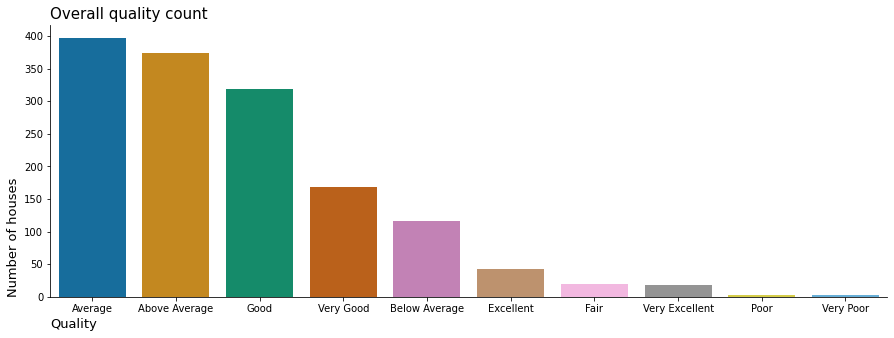

In [351]:
fig, ax = plt.subplots(figsize=(15, 5))
df_overall_qual = df_train[["OverallQual"]].copy()
overall_qual_code_to_description = {
    10:"Very Excellent",
    9:"Excellent",
    8:"Very Good",
    7:"Good",
    6:"Above Average",
    5:"Average",
    4:"Below Average",
    3:"Fair",
    2:"Poor",
    1:"Very Poor",
}
df_overall_qual['OverallQualDescription'] = df_overall_qual['OverallQual'].map(overall_qual_code_to_description)
overall_qual_count_plot = sns.countplot(data=df_overall_qual, x="OverallQualDescription", palette="colorblind", ax=ax, orient='v',
                                     order = df_overall_qual['OverallQualDescription'].value_counts().index)
overall_qual_count_plot.set_title('Overall quality count', fontsize = 15, loc='left')
overall_qual_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
overall_qual_count_plot.set_xlabel('Quality', fontsize = 13, loc="left")
sns.despine()

Most of the houses have a rate of 5, 6 and 7. We have few with 10, 1 and 2.

Let's do a frequency table in order to have more detail.

In [85]:
def build_frec_table(df, feature):
    frec = df[feature].value_counts()
    frec_df = pd.DataFrame(frec)
    frec_df.rename(columns={feature:'frec_abs'}, inplace=True)
    class_abs_values = frec_df["frec_abs"].values

    acum = []
    value_acum = 0
    for i in class_abs_values:
        value_acum = value_acum + i
        acum.append(value_acum)

    frec_df["frec_abs_acum"] = acum
    frec_df['frec_rel_%'] = round(100 * (frec_df['frec_abs'] / len(df[feature])), 4)

    class_rel_values = frec_df["frec_rel_%"].values
    acum = []
    value_acum = 0
    for i in class_rel_values:
        value_acum = value_acum + i
        acum.append(value_acum)

    frec_df["frec_rel_%_acuma"] = acum
    return frec_df

In [86]:
overall_qual_frec_df = build_frec_table(df_train, "OverallQual")
overall_qual_frec_df.head(11)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
5        397            397     27.1918           27.1918
6        374            771     25.6164           52.8082
7        319           1090     21.8493           74.6575
8        168           1258     11.5068           86.1643
4        116           1374      7.9452           94.1095
9         43           1417      2.9452           97.0547
3         20           1437      1.3699           98.4246
10        18           1455      1.2329           99.6575
2          3           1458      0.2055           99.8630
1          2           1460      0.1370          100.0000

Here we can see for example how the rates 5 (Average) and 6 (Above Average) contain 52% of the houses. We have very few cases of houses with other rates like 1 (Very Poor), 2 (Poor), 3 (Fair) or 10 (Very Excellent). So this feature is not very balanced.

### Neighborhood

Physical locations within Ames city limits.

In [87]:
df_train["Neighborhood"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Neighborhood
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


This feature is a nominal categorical type.

In [88]:
df_train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

We have 25 neighborhoods, where the most popular Neighborhood is Names, with 225 houses. The next one is CollCr with 150.

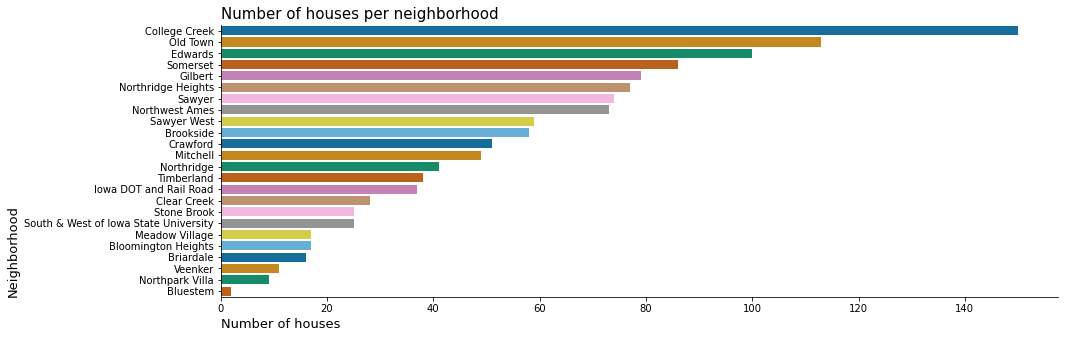

In [354]:
fig, ax = plt.subplots(figsize=(15, 5))

neighborhood_code_to_description = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'Mitchel': 'Mitchell',
    'MeadowV': 'Meadow Village',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}
df_neighborhood = df_train[["Neighborhood"]].copy()
df_neighborhood['NeighborhoodDescription'] = df_neighborhood['Neighborhood'].map(neighborhood_code_to_description)
neighborhood_count_plot = sns.countplot(data=df_neighborhood, y="NeighborhoodDescription", palette="colorblind", ax=ax, orient='h',
                                     order = df_neighborhood['NeighborhoodDescription'].value_counts().index)
neighborhood_count_plot.set_title('Number of houses per neighborhood', fontsize = 15, loc='left')
neighborhood_count_plot.set_ylabel('Neighborhood', fontsize = 13, loc="bottom")
neighborhood_count_plot.set_xlabel('Number of houses', fontsize = 13, loc="left")
sns.despine()

In [93]:
neighborhood_frec_df = build_frec_table(df_train, "Neighborhood")
neighborhood_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
NAmes         225            225     15.4110           15.4110
CollgCr       150            375     10.2740           25.6850
OldTown       113            488      7.7397           33.4247
Edwards       100            588      6.8493           40.2740
Somerst        86            674      5.8904           46.1644
Gilbert        79            753      5.4110           51.5754
NridgHt        77            830      5.2740           56.8494
Sawyer         74            904      5.0685           61.9179
NWAmes         73            977      5.0000           66.9179
SawyerW        59           1036      4.0411           70.9590
BrkSide        58           1094      3.9726           74.9316
Crawfor        51           1145      3.4932           78.4248
Mitchel        49           1194      3.3562           81.7810
NoRidge        41           1235      2.8082           84.5892
Timber         38           1273      2.6027           87.1919
IDOTRR         37           1310      2.5342           89.7261
ClearCr        28           1338      1.9178           91.6439
StoneBr        25           1363      1.7123           93.3562
SWISU          25           1388      1.7123           95.0685
MeadowV        17           1405      1.1644           96.2329
Blmngtn        17           1422      1.1644           97.3973
BrDale         16           1438      1.0959           98.4932
Veenker        11           1449      0.7534           99.2466
NPkVill         9           1458      0.6164           99.8630
Blueste         2           1460      0.1370          100.0000

Here we can see how 4 neighborhoods (North Ames, College Creek, Old Town, Edwards) reach 40% of the houses.

### GrLivArea 

Above grade (ground) living area square feet.

In [94]:
df_train["GrLivArea"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


This is a numerical feature.

In [95]:
df_train["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [96]:
df_train["GrLivArea"].mode()

0    864
Name: GrLivArea, dtype: int64

In [97]:
scipy.stats.skew(df_train["GrLivArea"])

1.365155954773434

The mean is 1515 and the median is 1464, the difference between them could say that there are some outliers. The mode is 864.

The standar deviation is just of 525, so most of the values are close to the mean.

We have also a big difference between the min and max.

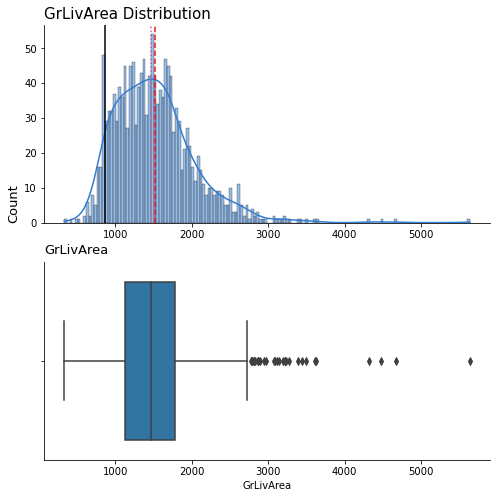

In [98]:
plot_numerical_distribution(df_train, 'GrLivArea')

In black we can see the mode, in pink the median and the with red the mean.

The distribution looks like a right skewed, confirmed with the skew value of 1.36, with some outliers in the right.

Here we can see with more detail some outliers. We'll deal with them later.

### GarageCars

Size of garage in car capacity.

In [99]:
df_train["GarageCars"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageCars
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [100]:
df_train["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

This is a nominal categorical feature.

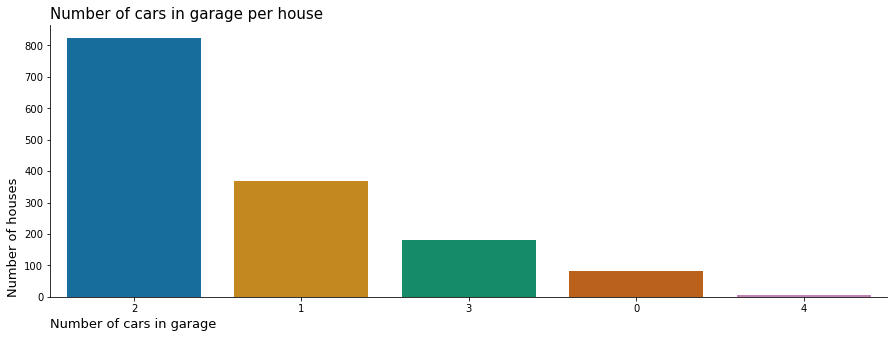

In [356]:
fig, ax = plt.subplots(figsize=(15, 5))
neighborhood_count_plot = sns.countplot(data=df_train, x="GarageCars", palette="colorblind", ax=ax, orient='v',
                                       order = df_train['GarageCars'].value_counts().index)
neighborhood_count_plot.set_title('Number of cars in garage per house', fontsize = 15, loc='left')
neighborhood_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
neighborhood_count_plot.set_xlabel('Number of cars in garage', fontsize = 13, loc="left")
sns.despine()

We can see clearly that most of the houses have a garage for 2 cars.

In [105]:
garage_cars_frec_df = build_frec_table(df_train, "GarageCars")
garage_cars_frec_df.head(5)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
2       824            824     56.4384           56.4384
1       369           1193     25.2740           81.7124
3       181           1374     12.3973           94.1097
0        81           1455      5.5479           99.6576
4         5           1460      0.3425          100.0001

Here we can see how almost 60% of the houses have garage for 2 cars.

### TotalBsmtSF

Total square feet of basement area.

In [106]:
df_train["TotalBsmtSF"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: TotalBsmtSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [107]:
df_train["TotalBsmtSF"].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [108]:
df_train["TotalBsmtSF"].mode()

0    0
Name: TotalBsmtSF, dtype: int64

In [109]:
scipy.stats.skew(df_train["TotalBsmtSF"])

1.522688086978629

The min is 0, that is related with houses without basement. Also the mode is 0.

We have also a big max value of 6110.

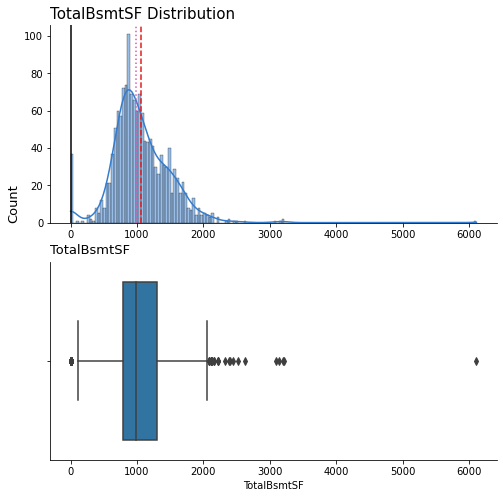

In [110]:
plot_numerical_distribution(df_train, 'TotalBsmtSF')

The distribution looks like a right skewed, confirmed with the skew value of 1.52.

In black we can see the mode, in pink the median and the with red the mean.

The values are not very spread, most are close to the mean. We can see also the houses without basement

Here we can see the outliers, and how the 50% of the values are between 795 and 1298.

### YearBuilt

Original construction date.

In [111]:
df_train["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [112]:
df_train["YearBuilt"].mode()

0    2006
Name: YearBuilt, dtype: int64

In [113]:
scipy.stats.skew(df_train["YearBuilt"])

-0.612830724202899

We have sparsed numbers of years, from 1872 to 2010, with mean in 1971. The mode is 2006, so most of the houses were built in 2006.

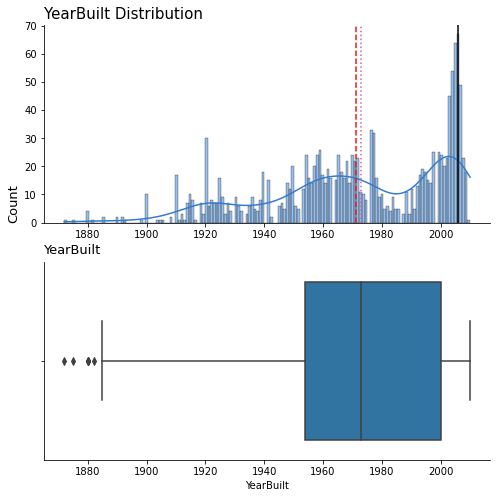

In [114]:
plot_numerical_distribution(df_train, 'YearBuilt')

In black we can see the mode, in pink the median and the with red the mean.

The shape is like a left skewed, confirmed with the skew value of -0.6. It says the number of the houses increase with the years, with the pick in 2006.

We can see two groups of years. The first one is from 1955 to 1977, and the other one from 1990 to 2009.

### GarageArea

Size of garage in square feet.

In [115]:
df_train["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

We have houses without garage, so the min is 0. The median is 480 and mean 472.

In [116]:
df_train["GarageArea"].mode()

0    0
Name: GarageArea, dtype: int64

In [117]:
scipy.stats.skew(df_train["GarageArea"])

0.1797959420587727

The mode is 0, so most of the houses don't have a garage.

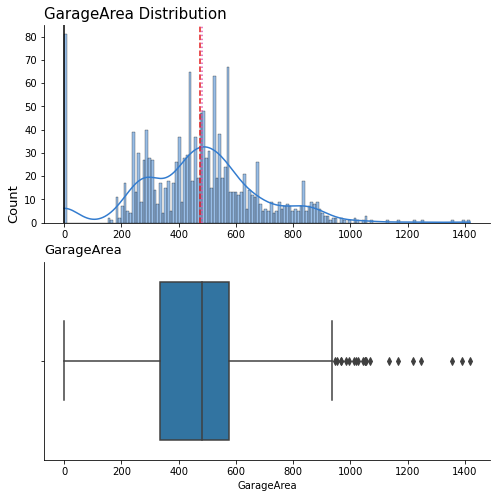

In [118]:
plot_numerical_distribution(df_train, 'GarageArea')

The distribution is a bit right skewed, confirmed with the skew value of 0.17.

In black we can see the mode, in pink the median and the with red the mean.

The 50% of the garages have an area between 334 and 576.

### BsmtQual

Evaluates the height of the basement

In [119]:
df_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

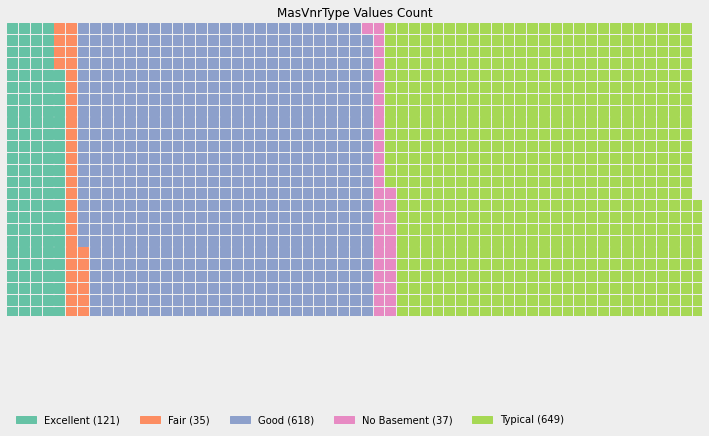

In [363]:
df_bsmt_qual = df_train[["BsmtQual", "Id"]].copy()
df_bsmt_qual_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
    'NA': 'No Basement'
}   
df_bsmt_qual['BsmtQualDescription'] = df_bsmt_qual['BsmtQual'].map(df_bsmt_qual_code_to_description)
show_waffle_plot(df_bsmt_qual, 'BsmtQualDescription')

Here we can see the most common categories, TA (Typical) and Gd (Good). Let's see the table:

In [121]:
bsmt_qual_frec_df = build_frec_table(df_train, "BsmtQual")
bsmt_qual_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
TA       649            649     44.4521           44.4521
Gd       618           1267     42.3288           86.7809
Ex       121           1388      8.2877           95.0686
NA        37           1425      2.5342           97.6028
Fa        35           1460      2.3973          100.0001

Typical and Good have 86% of the houses.

### KitchenQual

Kitchen quality

In [122]:
df_train["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

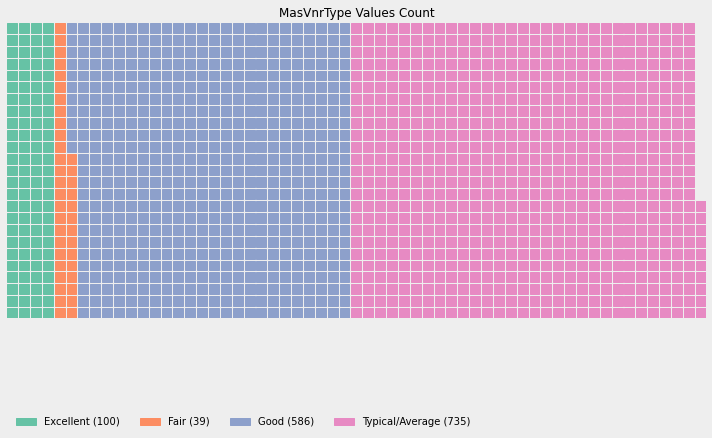

In [361]:
df_kitchen_qual = df_train[["KitchenQual", "Id"]].copy()
kitchen_qual_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical/Average',
    'Fa': 'Fair',
    'Po': 'Poor'
}
df_kitchen_qual['KitchenQualDescription'] = df_kitchen_qual['KitchenQual'].map(kitchen_qual_code_to_description)
show_waffle_plot(df_kitchen_qual, 'KitchenQualDescription')

In this feature we have also 2 big groups, TA (Typical/Average) and Gd (Good).

In [124]:
kitchen_qual_frec_df = build_frec_table(df_train, "KitchenQual")
kitchen_qual_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
TA       735            735     50.3425           50.3425
Gd       586           1321     40.1370           90.4795
Ex       100           1421      6.8493           97.3288
Fa        39           1460      2.6712          100.0000

Just the 50% of the houses have a kitchen with quality Typical/Average.

### ExterQual

Evaluates the quality of the material on the exterior

In [125]:
df_train["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

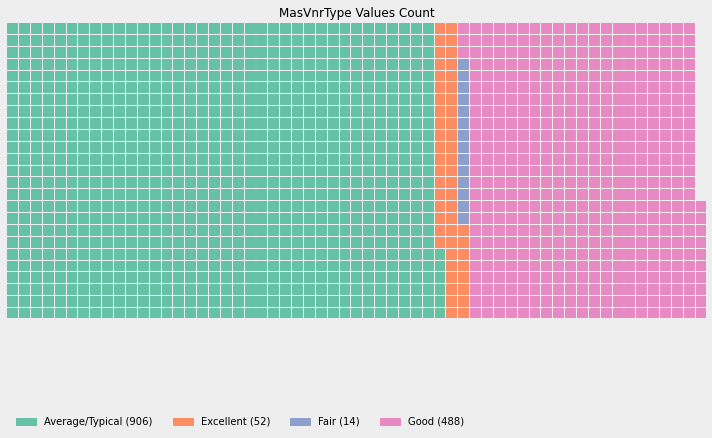

In [358]:
df_exter_qual = df_train[["ExterQual", "Id"]].copy()
exter_qual_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'Po': 'Poor'
}
df_exter_qual['ExterQualDescription'] = df_exter_qual['ExterQual'].map(exter_qual_code_to_description)
show_waffle_plot(df_exter_qual, 'ExterQualDescription')

With the 62%, the most common value is TA (Average/Typical).

In [127]:
exter_qual_frec_df = build_frec_table(df_train, "ExterQual")
exter_qual_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
TA       906            906     62.0548           62.0548
Gd       488           1394     33.4247           95.4795
Ex        52           1446      3.5616           99.0411
Fa        14           1460      0.9589          100.0000

We can appreciate how 2 types are related with 95% of the houses.

We have few cases with quality Ex (Excellent) and Fa (Fair).

### 1stFlrSF

First Floor square feet.

In [128]:
df_train["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [129]:
df_train["1stFlrSF"].mode()

0    864
Name: 1stFlrSF, dtype: int64

In [130]:
scipy.stats.skew(df_train["1stFlrSF"])

1.3753417421837937

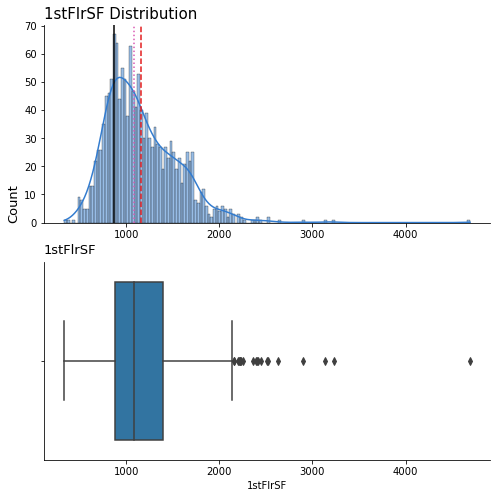

In [131]:
plot_numerical_distribution(df_train, '1stFlrSF')

In black we can see the mode, in pink the median and the with red the mean.

We have an unimodal little right skewed distribution (skew value 1.37). We can see that most of the data is between 800 and 1200.

The mode is 864, the median is 1087 and the mean is 1162.

We can see some outliers close to the max.

### MSSUbClass

Identifies the type of dwelling involved in the sale.

In [132]:
df_train["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

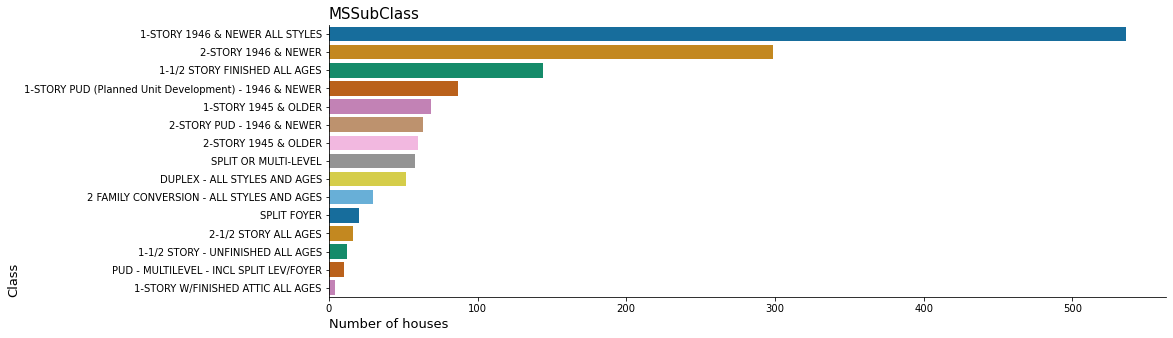

In [249]:
fig, ax = plt.subplots(figsize=(15, 5))
df_ms_sub_class = df_train[["MSSubClass"]].copy()
ms_sub_class_code_to_description = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
}

df_ms_sub_class['MSSubClassDescription'] = df_ms_sub_class['MSSubClass'].map(ms_sub_class_code_to_description)
ms_sub_class_count_plot = sns.countplot(data=df_ms_sub_class, y="MSSubClassDescription", palette="colorblind", 
                                        ax=ax, orient='h', 
                                        order = df_ms_sub_class['MSSubClassDescription'].value_counts().index)
ms_sub_class_count_plot.set_title('MSSubClass', fontsize = 15, loc='left')
ms_sub_class_count_plot.set_ylabel('Class', fontsize = 13, loc="bottom")
ms_sub_class_count_plot.set_xlabel('Number of houses', fontsize = 13, loc="left")
sns.despine()

The most commun value is 20 (1-STORY 1946 & NEWER ALL STYLES) with 535 hoses, and the next one is 60 (2-STORY 1946 & NEWER) with 299.

In [135]:
ms_sub_class_frec_df = build_frec_table(df_train, "MSSubClass")
ms_sub_class_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
20        536            536     36.7123           36.7123
60        299            835     20.4795           57.1918
50        144            979      9.8630           67.0548
120        87           1066      5.9589           73.0137
30         69           1135      4.7260           77.7397
160        63           1198      4.3151           82.0548
70         60           1258      4.1096           86.1644
80         58           1316      3.9726           90.1370
90         52           1368      3.5616           93.6986
190        30           1398      2.0548           95.7534
85         20           1418      1.3699           97.1233
75         16           1434      1.0959           98.2192
45         12           1446      0.8219           99.0411
180        10           1456      0.6849           99.7260
40          4           1460      0.2740          100.0000

20 and 60 concentrate the 57% of the houses.

### YearRemodAdd

Remodel date (same as construction date if no remodeling or additions)

In [136]:
df_train["YearRemodAdd"].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [137]:
df_train["YearRemodAdd"].mode()

0    1950
Name: YearRemodAdd, dtype: int64

In [138]:
scipy.stats.skew(df_train["YearRemodAdd"])

-0.5030444967597948

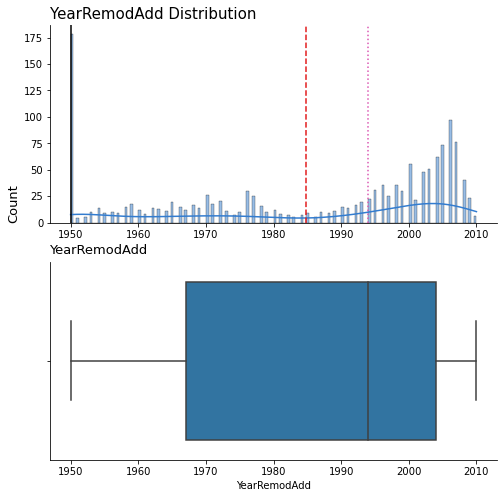

In [139]:
plot_numerical_distribution(df_train, 'YearRemodAdd')

In black we can see the mode, in pink the median and the with red the mean.

The skew value is -0.50, showing a left skewed distribution. We have the mode and min in 1950.

The max is 2010, the mean is 1984 and the median 1994.

It seems that there are not outliers in this case.

### GarageYrBlt

Year garage was built

In [140]:
df_train["GarageYrBlt"].describe()

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [141]:
df_train["GarageYrBlt"].mode()

0    0.0
Name: GarageYrBlt, dtype: float64

In [142]:
scipy.stats.skew(df_train["GarageYrBlt"])

-3.8655241719861873

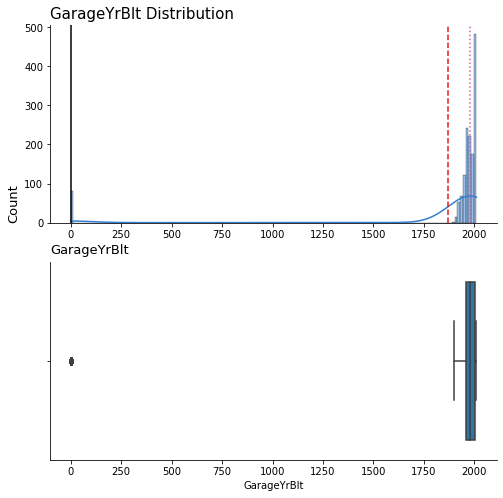

In [143]:
plot_numerical_distribution(df_train, 'GarageYrBlt')

In black we can see the mode, in pink the median and the with red the mean.

We see that we have houses without garages. The mode is 0, so most of the houses don't have a garage.

We see also a very left skewed distribution, with the a narrow spread.

### FullBath

Basement full bathrooms.

In [144]:
df_train["BsmtFullBath"].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

This is a categorical nomimal feature.

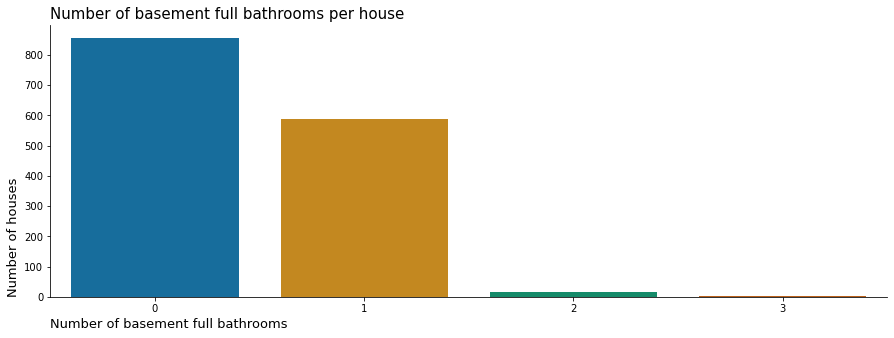

In [147]:
fig, ax = plt.subplots(figsize=(15, 5))
neighborhood_count_plot = sns.countplot(data=df_train, x="BsmtFullBath", palette="colorblind", ax=ax, orient='v')
neighborhood_count_plot.set_title('Number of basement full bathrooms per house', fontsize = 15, loc='left')
neighborhood_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
neighborhood_count_plot.set_xlabel('Number of basement full bathrooms', fontsize = 13, loc="left")
sns.despine()

In [148]:
bsmt_full_bath_frec_df = build_frec_table(df_train, "BsmtFullBath")
bsmt_full_bath_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
0       856            856     58.6301           58.6301
1       588           1444     40.2740           98.9041
2        15           1459      1.0274           99.9315
3         1           1460      0.0685          100.0000

Most of the basements don't have full bathroom. But we have 2 groups, the other 40% of the houses have 1 full bathroom.

### GarageFinish

Interior finish of the garage.

In [252]:
df_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

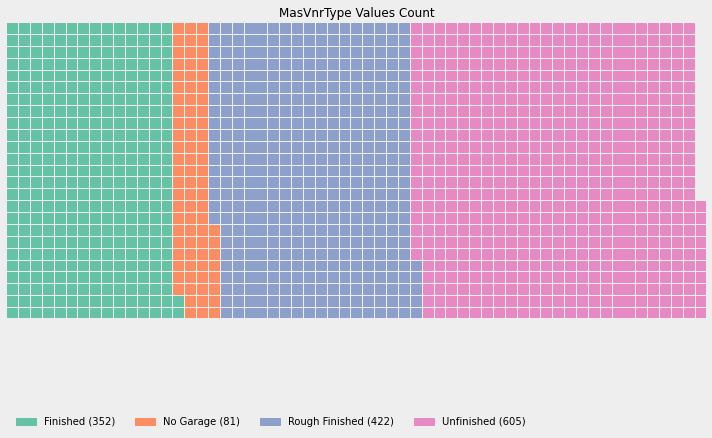

In [255]:
df_garage_finish = df_train[["GarageFinish", "Id"]].copy()
garage_finish_code_to_description = {
    'Fin': 'Finished',
    'RFn': 'Rough Finished',
    'Unf': 'Unfinished',
    'NA': 'No Garage'
}
df_garage_finish['GarageFinishDescription'] = df_garage_finish['GarageFinish'].map(garage_finish_code_to_description)
show_waffle_plot(df_garage_finish, 'GarageFinishDescription')

We can see that most of garages are not finished, 41% of them.

In [151]:
garage_finish_frec_df = build_frec_table(df_train, "GarageFinish")
garage_finish_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
Unf       605            605     41.4384           41.4384
RFn       422           1027     28.9041           70.3425
Fin       352           1379     24.1096           94.4521
NA         81           1460      5.5479          100.0000

We have few houses without garage, and two groups of 25% with garages RFn and FIn.

### TotRmsAbvGrd

Total rooms above grade (does not include bathrooms).

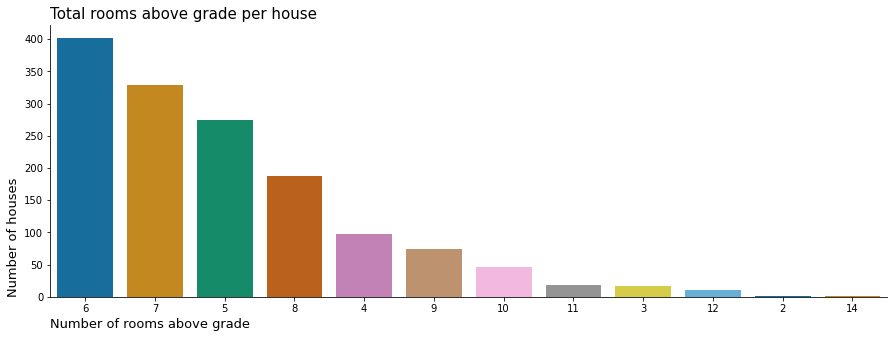

In [153]:
fig, ax = plt.subplots(figsize=(15, 5))
tot_rms_abv_grd_count_plot = sns.countplot(data=df_train, x="TotRmsAbvGrd", palette="colorblind", ax=ax, orient='v',
                                          order = df_train['TotRmsAbvGrd'].value_counts().index)
tot_rms_abv_grd_count_plot.set_title('Total rooms above grade per house', fontsize = 15, loc='left')
tot_rms_abv_grd_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
tot_rms_abv_grd_count_plot.set_xlabel('Number of rooms above grade', fontsize = 13, loc="left")
sns.despine()

In [154]:
tot_rms_abv_grd_frec_df = build_frec_table(df_train, "TotRmsAbvGrd")
tot_rms_abv_grd_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
6        402            402     27.5342           27.5342
7        329            731     22.5342           50.0684
5        275           1006     18.8356           68.9040
8        187           1193     12.8082           81.7122
4         97           1290      6.6438           88.3560
9         75           1365      5.1370           93.4930
10        47           1412      3.2192           96.7122
11        18           1430      1.2329           97.9451
3         17           1447      1.1644           99.1095
12        11           1458      0.7534           99.8629
2          1           1459      0.0685           99.9314
14         1           1460      0.0685           99.9999

Most of the houses have 6 rooms, and with 7 rooms contain the 50% of the houses.

Also, there is just 1 house with 2 and 14 rooms.

### Fireplaces

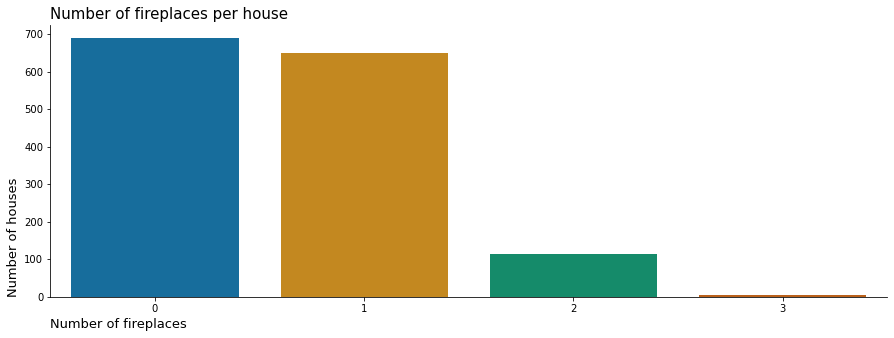

In [156]:
fig, ax = plt.subplots(figsize=(15, 5))
tot_rms_abv_grd_count_plot = sns.countplot(data=df_train, x="Fireplaces", palette="colorblind", ax=ax, 
                                           order = df_train['Fireplaces'].value_counts().index)
tot_rms_abv_grd_count_plot.set_title('Number of fireplaces per house', fontsize = 15, loc='left')
tot_rms_abv_grd_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
tot_rms_abv_grd_count_plot.set_xlabel('Number of fireplaces', fontsize = 13, loc="left")
sns.despine()

In [157]:
fireplaces_frec_df = build_frec_table(df_train, "Fireplaces")
fireplaces_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
0       690            690     47.2603           47.2603
1       650           1340     44.5205           91.7808
2       115           1455      7.8767           99.6575
3         5           1460      0.3425          100.0000

Mos of the houses don't have a fireplace (47%) and another big group of houses have just 1 fireplace.

### MasVnrArea

In [158]:
df_train["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [159]:
df_train["MasVnrArea"].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [160]:
scipy.stats.skew(df_train["MasVnrArea"])

2.6748646898037354

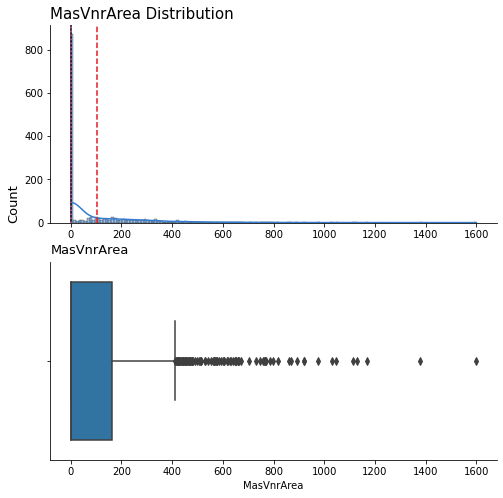

In [161]:
plot_numerical_distribution(df_train, 'MasVnrArea')

In black we can see the mode, in pink the median and the with red the mean.


We can see a very right skewed distribution, where the mode and median is 0. And the mean is 103.

### HeatingQC

Heating quality and condition.

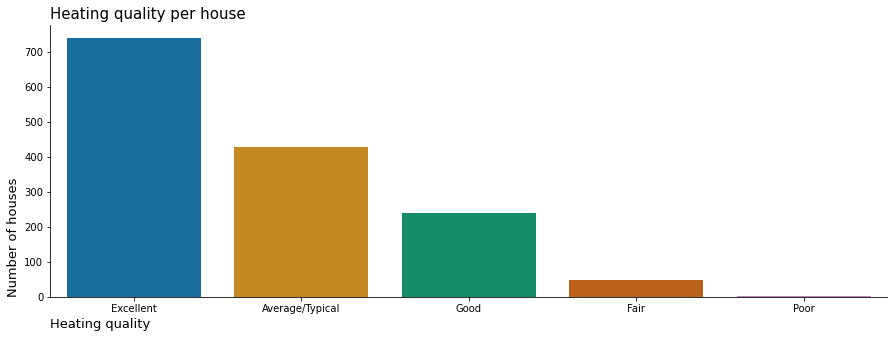

In [247]:
fig, ax = plt.subplots(figsize=(15, 5))
df_heating_qc = df_train[["HeatingQC"]].copy()
heating_qc_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
}
df_heating_qc['HeatingQCDescription'] = df_heating_qc['HeatingQC'].map(heating_qc_code_to_description)
heating_qc_count_plot = sns.countplot(data=df_heating_qc, x="HeatingQCDescription", palette="colorblind", ax=ax, orient='v',
                                     order = df_heating_qc['HeatingQCDescription'].value_counts().index)
heating_qc_count_plot.set_title('Heating quality per house', fontsize = 15, loc='left')
heating_qc_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
heating_qc_count_plot.set_xlabel('Heating quality', fontsize = 13, loc="left")
sns.despine()

In [164]:
heating_qc_frec_df = build_frec_table(df_train, "HeatingQC")
heating_qc_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
Ex       741            741     50.7534           50.7534
TA       428           1169     29.3151           80.0685
Gd       241           1410     16.5068           96.5753
Fa        49           1459      3.3562           99.9315
Po         1           1460      0.0685          100.0000

Half of the houses (50%) have Heating quality and condition Excellent. We have few houses with Fair or Poor quality.

### Foundation

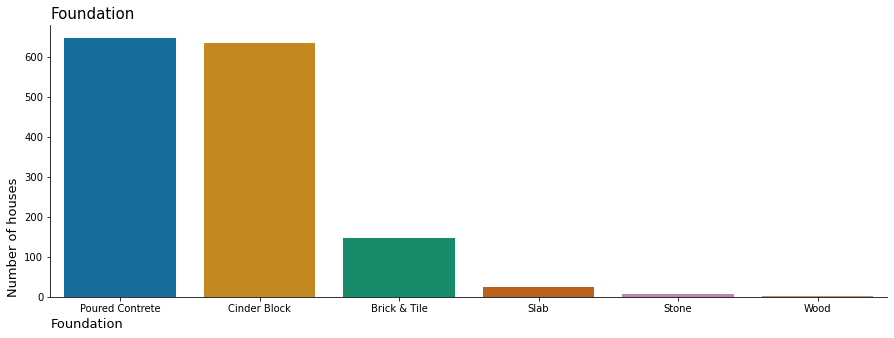

In [256]:
fig, ax = plt.subplots(figsize=(15, 5))
df_foundation = df_train[["Foundation"]].copy()
foundation_code_to_description = {
    'BrkTil': 'Brick & Tile',
    'CBlock': 'Cinder Block',
    'PConc': 'Poured Contrete',
    'Slab': 'Slab',
    'Stone': 'Stone',
    'Wood': 'Wood'
}
df_foundation['FoundationDescription'] = df_foundation['Foundation'].map(foundation_code_to_description)
foundation_count_plot = sns.countplot(data=df_foundation, x="FoundationDescription", palette="colorblind", ax=ax, orient='v',
                                     order = df_foundation['FoundationDescription'].value_counts().index)
foundation_count_plot.set_title('Foundation', fontsize = 15, loc='left')
foundation_count_plot.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
foundation_count_plot.set_xlabel('Foundation', fontsize = 13, loc="left")
sns.despine()

In [167]:
foundation_frec_df = build_frec_table(df_train, "Foundation")
foundation_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
PConc        647            647     44.3151           44.3151
CBlock       634           1281     43.4247           87.7398
BrkTil       146           1427     10.0000           97.7398
Slab          24           1451      1.6438           99.3836
Stone          6           1457      0.4110           99.7946
Wood           3           1460      0.2055          100.0001

Clearly we can see two big groups, Poured Contrete (PConc) and Cinder Block (CBlock). Both together, contain 87% of the houses.

### GarageType

Garage location.

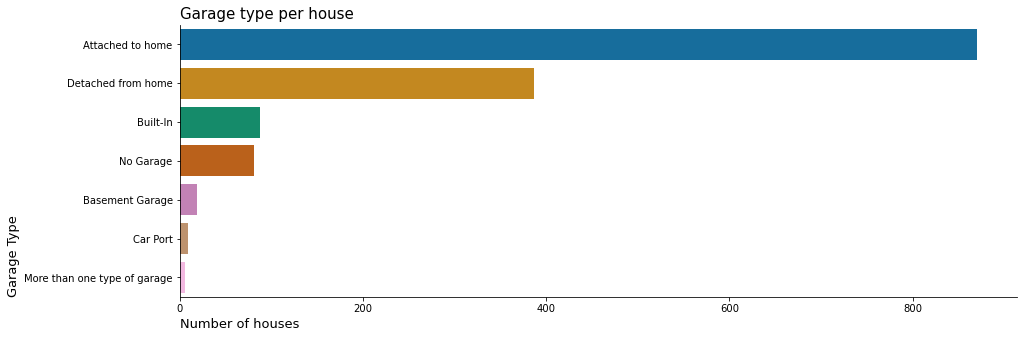

In [258]:
fig, ax = plt.subplots(figsize=(15, 5))
df_garage_type = df_train[["GarageType"]].copy()
garage_type_code_to_description = {
    '2Types': 'More than one type of garage',
    'Attchd': 'Attached to home',
    'Basment': 'Basement Garage',
    'BuiltIn': 'Built-In',
    'CarPort': 'Car Port',
    'Detchd': 'Detached from home',
    'NA': 'No Garage'
}

df_garage_type['GarageTypeDescription'] = df_garage_type['GarageType'].map(garage_type_code_to_description)
foundation_count_plot = sns.countplot(data=df_garage_type, y="GarageTypeDescription", palette="colorblind", ax=ax, 
                                      orient='h',
                                      order = df_garage_type['GarageTypeDescription'].value_counts().index)
foundation_count_plot.set_title('Garage type per house', fontsize = 15, loc='left')
foundation_count_plot.set_ylabel('Garage Type', fontsize = 13, loc="bottom")
foundation_count_plot.set_xlabel('Number of houses', fontsize = 13, loc="left")
sns.despine()

In [170]:
garage_type_frec_df = build_frec_table(df_train, "GarageType")
garage_type_frec_df.head(25)

frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acuma
Attchd        870            870     59.5890           59.5890
Detchd        387           1257     26.5068           86.0958
BuiltIn        88           1345      6.0274           92.1232
NA             81           1426      5.5479           97.6711
Basment        19           1445      1.3014           98.9725
CarPort         9           1454      0.6164           99.5889
2Types          6           1460      0.4110           99.9999

60% of the houses have the garage attached to the home, and there 81 houses without garage.

### 2ndFlrSF

Second floor square feet.

In [171]:
df_train["2ndFlrSF"].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [172]:
df_train["2ndFlrSF"].mode()

0    0
Name: 2ndFlrSF, dtype: int64

In [173]:
scipy.stats.skew(df_train["2ndFlrSF"])

0.8121942731961613

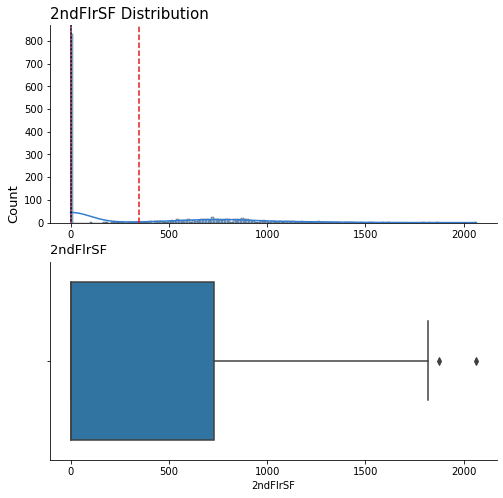

In [174]:
plot_numerical_distribution(df_train, '2ndFlrSF')

In black we can see the mode, in pink the median and the with red the mean.


The median, mode and min is 0. So, most of the houses doesn't have a 2nd floor.

The distribution is right skewed.

### BsmtFinSF1

 Type 1 finished square feet.

In [175]:
df_train["BsmtFinSF1"].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [176]:
df_train["BsmtFinSF1"].mode()

0    0
Name: BsmtFinSF1, dtype: int64

In [177]:
scipy.stats.skew(df_train["BsmtFinSF1"])

1.6837708962341815

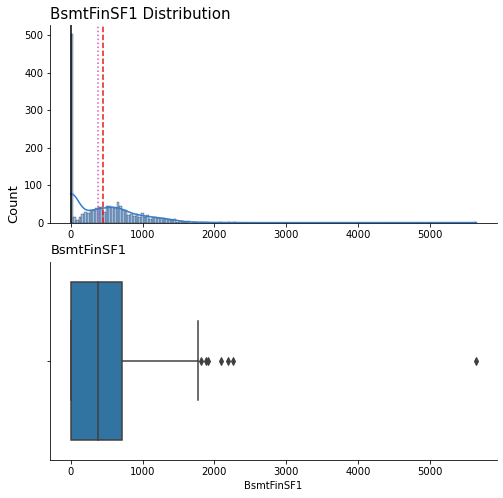

In [178]:
plot_numerical_distribution(df_train, 'BsmtFinSF1')

In black we can see the mode, in pink the median and the with red the mean.


This also is positive skewed.

He we have also 0 has mode and min, representing most of the houses.

## Bivariate Analysis <a name="bi"></a>

Now I will do a bivariate analysis between the selected features and the target, and I will check their impact on the target and if there is a correlation.

### Sale price by overall material quality (OverallQual)

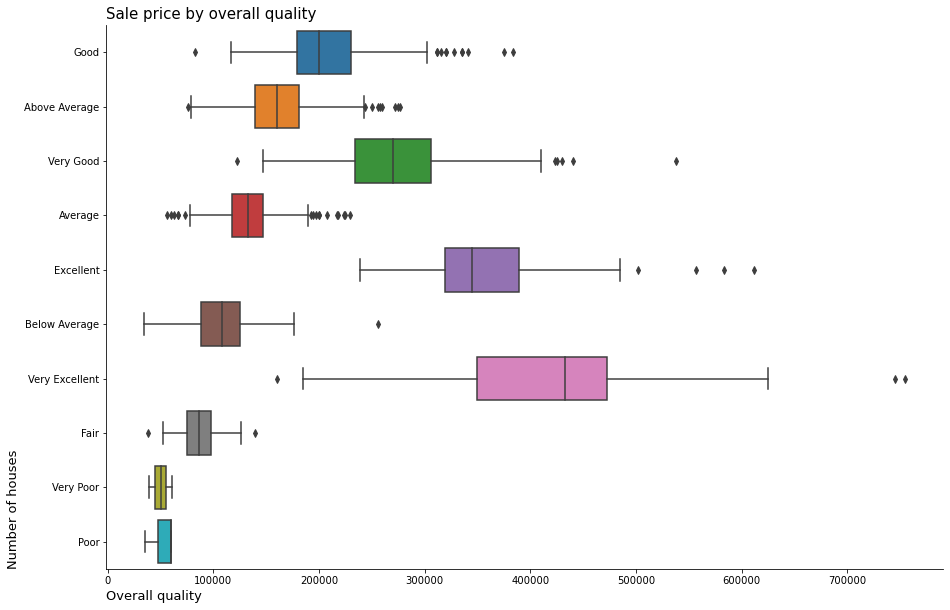

In [262]:
fig, ax = plt.subplots(figsize=(15, 10))
df_overall_qual = df_train[["OverallQual", "SalePrice"]].copy()
overall_qual_code_to_description = {
    10:"Very Excellent",
    9:"Excellent",
    8:"Very Good",
    7:"Good",
    6:"Above Average",
    5:"Average",
    4:"Below Average",
    3:"Fair",
    2:"Poor",
    1:"Very Poor",
}
df_overall_qual['OverallQualDescription'] = df_overall_qual['OverallQual'].map(overall_qual_code_to_description)
over_qual_and_sale_price = sns.boxplot(data=df_overall_qual, y="OverallQualDescription", x="SalePrice", ax=ax, orient='h')
over_qual_and_sale_price.set_title('Sale price by overall quality', fontsize = 15, loc='left')
over_qual_and_sale_price.set_ylabel('Number of houses', fontsize = 13, loc="bottom")
over_qual_and_sale_price.set_xlabel('Overall quality', fontsize = 13, loc="left")
sns.despine()

Here we can see clearly how the price increases with the rate of Overall Quality.

###  Sale price by neighborhood (Neighborhood)

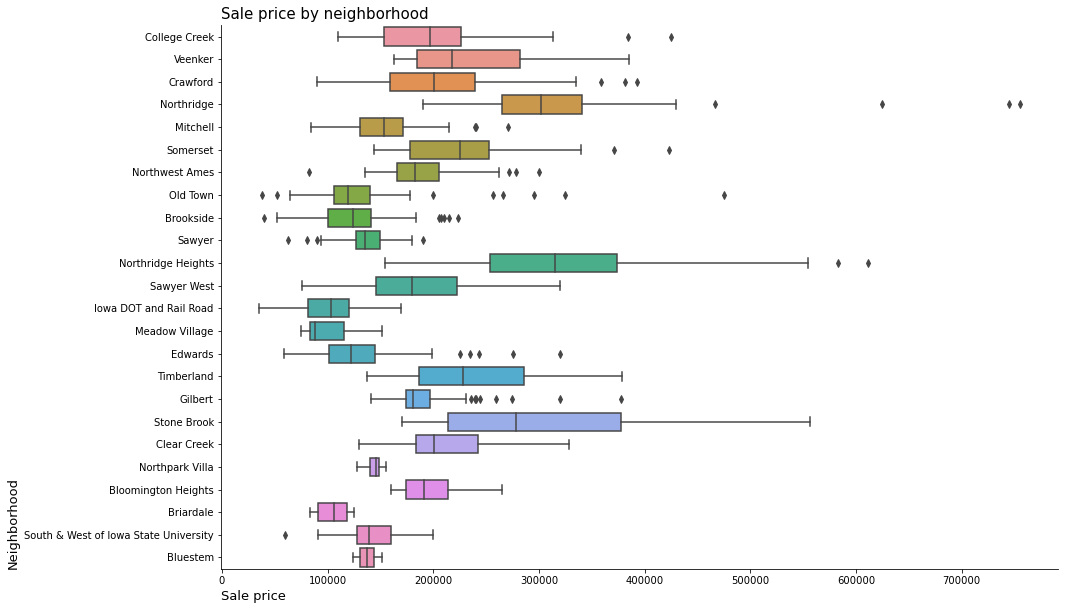

In [364]:
fig, ax = plt.subplots(figsize=(15, 10))
df_neighborhood = df_train[["Neighborhood", "SalePrice"]].copy()
df_neighborhood['NeighborhoodDescription'] = df_neighborhood['Neighborhood'].map(neighborhood_code_to_description)
neighborhood_and_sale_price = sns.boxplot(data=df_neighborhood, y="NeighborhoodDescription", x="SalePrice", 
                                          ax=ax, orient="h")
neighborhood_and_sale_price.set_title('Sale price by neighborhood', fontsize = 15, loc='left')
neighborhood_and_sale_price.set_ylabel('Neighborhood', fontsize = 13, loc="bottom")
neighborhood_and_sale_price.set_xlabel('Sale price', fontsize = 13, loc="left")
sns.despine()

Here we can see how the price varies with the neighborhood. We have max price in NridgHt and NoRidge. In other neighborhoods like OldTown and BrkSide, the price is low.

### Sale price by above grade living area square feet (GrLivArea)

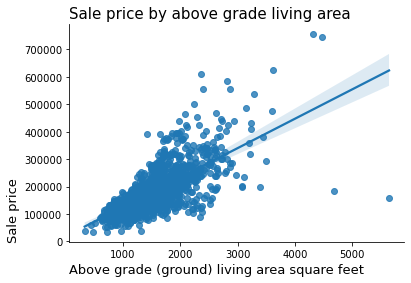

In [189]:
gr_liv_area_and_sale_price = sns.regplot(data=df_train, x="GrLivArea", y="SalePrice")
gr_liv_area_and_sale_price.set_title('Sale price by above grade living area', fontsize = 15, loc='left')
gr_liv_area_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
gr_liv_area_and_sale_price.set_xlabel('Above grade (ground) living area square feet', fontsize = 13, loc="left")
sns.despine()

Here we can confirm the positive correlation of 0.71 that we found between GrLivArea and SalePrice.

The prices increases with the Above grade living area square feet.

### Sale price by number of cars in garage (GarageCars)

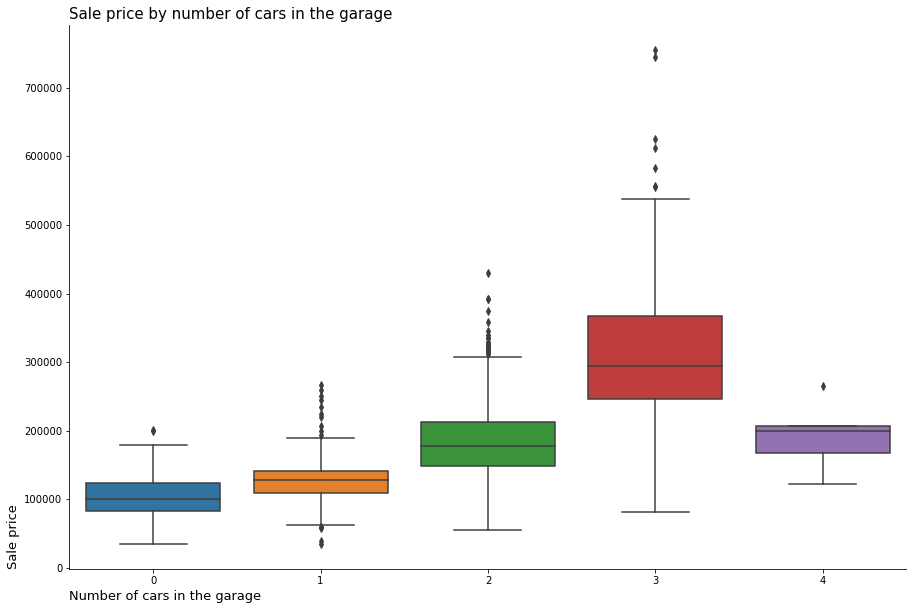

In [192]:
fig, ax = plt.subplots(figsize=(15, 10))
garage_cars_and_sale_price = sns.boxplot(data = df_train, x = "GarageCars", y = "SalePrice", ax=ax)
garage_cars_and_sale_price.set_title('Sale price by number of cars in the garage', fontsize = 15, loc='left')
garage_cars_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
garage_cars_and_sale_price.set_xlabel('Number of cars in the garage', fontsize = 13, loc="left")
sns.despine()

Here we can see how the price increases with the number of cars, except when the garage is for 4 cars.

Let's see how many houses there are for each number of cars in the garage.

In [193]:
house_by_carage_cars = df_train.groupby("GarageCars").count()
house_by_carage_cars.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
GarageCars                                                                   
0            81          81        81           81       81      81     81   
1           369         369       369          369      369     369    369   
2           824         824       824          824      824     824    824   
3           181         181       181          181      181     181    181   
4             5           5         5            5        5       5      5   

            LotShape  LandContour  Utilities  LotConfig  LandSlope  \
GarageCars                                                           
0                 81           81         81         81         81   
1                369          369        369        369        369   
2                824          824        824        824        824   
3                181          181        181        181        181   
4                  5            5          5          5          5   

            Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
GarageCars                                                               
0                     81          81          81        81          81   
1                    369         369         369       369         369   
2                    824         824         824       824         824   
3                    181         181         181       181         181   
4                      5           5           5         5           5   

            OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
GarageCars                                                                 
0                    81           81         81            81         81   
1                   369          369        369           369        369   
2                   824          824        824           824        824   
3                   181          181        181           181        181   
4                     5            5          5             5          5   

            RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
GarageCars                                                               
0                 81           81           81          81          81   
1                369          369          369         369         369   
2                824          824          824         824         824   
3                181          181          181         181         181   
4                  5            5            5           5           5   

            ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
GarageCars                                                         
0                  81         81          81        81        81   
1                 369        369         369       369       369   
2                 824        824         824       824       824   
3                 181        181         181       181       181   
4                   5          5           5         5         5   

            BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
GarageCars                                                                     
0                     81            81          81            81          81   
1                    369           369         369           369         369   
2                    824           824         824           824         824   
3                    181           181         181           181         181   
4                      5             5           5             5           5   

            BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
GarageCars                                                           
0                  81           81       81         81          81   
1                 369          369      369        369         369   
2                 824          824      824        824         824   
3               

In [194]:
df_train.groupby("GarageCars")["SalePrice"].describe().T

GarageCars              0              1              2              3  \
count           81.000000     369.000000     824.000000     181.000000   
mean        103317.283951  128116.688347  183851.663835  309636.121547   
std          32815.023389   30412.386890   51617.144258  106832.925939   
min          34900.000000   35311.000000   55993.000000   81000.000000   
25%          82500.000000  110000.000000  148000.000000  246578.000000   
50%         100000.000000  128000.000000  177750.000000  295000.000000   
75%         124000.000000  142000.000000  213000.000000  367294.000000   
max         200500.000000  266500.000000  430000.000000  755000.000000   

GarageCars              4  
count            5.000000  
mean        192655.800000  
std          52621.839745  
min         123000.000000  
25%         168000.000000  
50%         200000.000000  
75%         206300.000000  
max         265979.000000

The median of the price of the house with 1 car is higher than without cars, but we can see that them have similar prices in some cases.

In the case of houses with 2 or 3 cars, the price is more spread than with 1 car. Houses with 1 car we can see that the range of the price is short (we can see this looking at the standart deviation). Most of the houses (824) have garage for 2 cars, and their price does not vary much (compared with houses with 3 cars, when there are much less houses).

In case of 4 cars, the price decrease, but we only have 5 houses with garage for 4 cars. The price could decrease for other factors also.

### Sale price by total square feet of basement area (TotalBsmtSF)

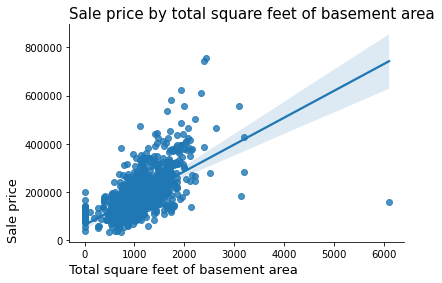

In [196]:
total_bsmt_sf_and_sale_price = sns.regplot(data=df_train, x="TotalBsmtSF", y="SalePrice")
total_bsmt_sf_and_sale_price.set_title('Sale price by total square feet of basement area', fontsize = 15, loc='left')
total_bsmt_sf_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
total_bsmt_sf_and_sale_price.set_xlabel('Total square feet of basement area', fontsize = 13, loc="left")
sns.despine()

We can see above a positive corelation between TotalBsmtSF and SalePrice

### Sale price and year built (YearBuilt)

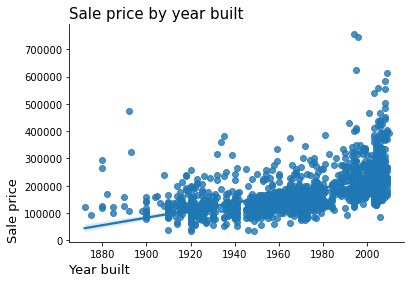

In [198]:
year_built_and_sale_price = sns.regplot(data=df_train, x="YearBuilt", y="SalePrice")
year_built_and_sale_price.set_title('Sale price by year built', fontsize = 15, loc='left')
year_built_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
year_built_and_sale_price.set_xlabel('Year built', fontsize = 13, loc="left")
sns.despine()

We can see how the price increases with the year built, but it doesn't seem to be a line, it looks like a curve.

### Sale price by garage area (GarageArea)

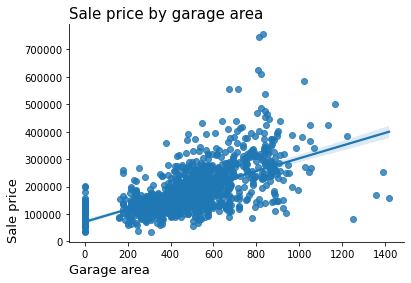

In [199]:
garage_area_and_sale_price = sns.regplot(data=df_train, x="GarageArea", y="SalePrice")
garage_area_and_sale_price.set_title('Sale price by garage area', fontsize = 15, loc='left')
garage_area_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
garage_area_and_sale_price.set_xlabel('Garage area', fontsize = 13, loc="left")
sns.despine()

Based on above, we see that with more garage area, the price also increases, confirming the positive correlation.

### Sale price by basement quality (BsmtQual)

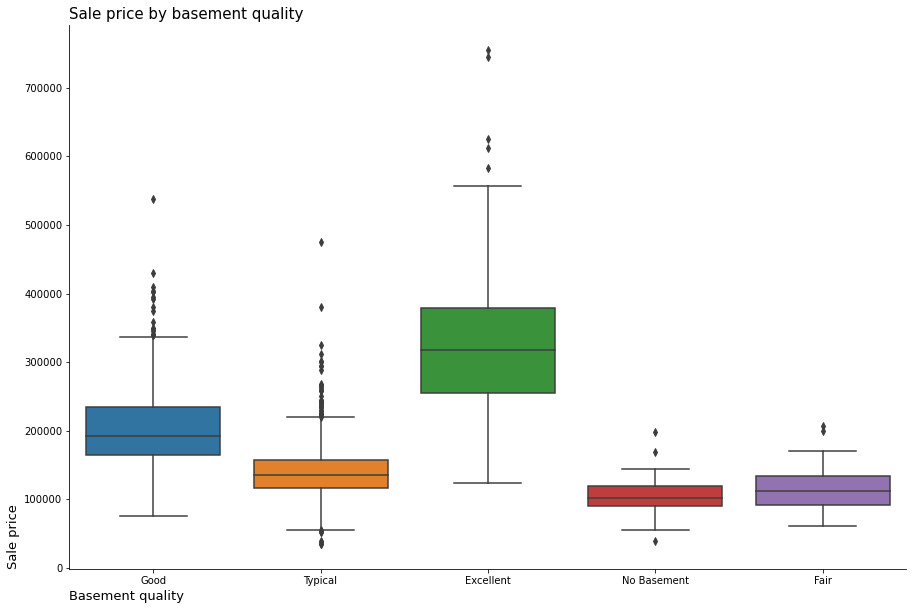

In [263]:
fig, ax = plt.subplots(figsize=(15, 10))

df_bsmt_qual_qc = df_train[["BsmtQual", "SalePrice"]].copy()
bsmt_qual_qc_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
    'NA': 'No Basement'
}

df_bsmt_qual_qc['BsmtQualDescription'] = df_bsmt_qual_qc['BsmtQual'].map(bsmt_qual_qc_code_to_description)
bsmt_qual_and_sale_price = sns.boxplot(data=df_bsmt_qual_qc, x="BsmtQualDescription", y="SalePrice", ax=ax)
bsmt_qual_and_sale_price.set_title('Sale price by basement quality', fontsize = 15, loc='left')
bsmt_qual_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
bsmt_qual_and_sale_price.set_xlabel('Basement quality', fontsize = 13, loc="left")
sns.despine()

When the quality is Good or Excellent we see a positive correlation, and here we can confirm that. The price is max when the quality is Excellent.

Also in these two cases, the price is spread and not narrow as the other.

On the other hand, when the quality is Typical, No Basement, or Fair, the prices dicrease, showing a negative correlation.

### Sale price by kitchen quality (KitchenQual)

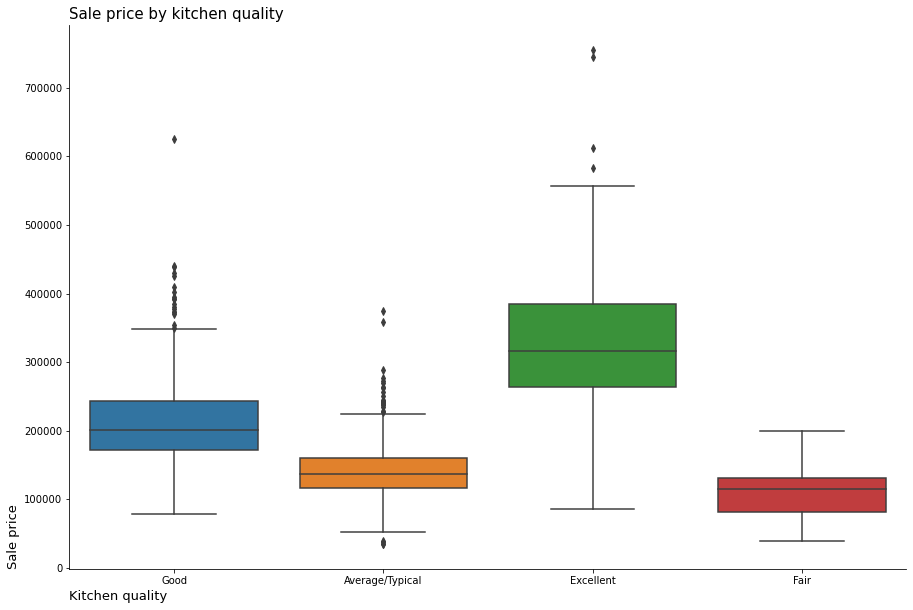

In [270]:
fig, ax = plt.subplots(figsize=(15, 10))
df_kitchen_qu = df_train[["KitchenQual", "SalePrice"]].copy()
kitchen_qu_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
}
df_kitchen_qu['KitchenQualDescription'] = df_kitchen_qu['KitchenQual'].map(kitchen_qu_code_to_description)
ketchen_qual_sale_price = sns.boxplot(data=df_kitchen_qu, x="KitchenQualDescription", y="SalePrice", ax=ax)
ketchen_qual_sale_price.set_title('Sale price by kitchen quality', fontsize = 15, loc='left')
ketchen_qual_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
ketchen_qual_sale_price.set_xlabel('Kitchen quality', fontsize = 13, loc="left")
sns.despine()

We can confirm and see the negative correlation when the quality is Typical or Fair. In case of Typical, we see min sale prices, confirming the negative correlation -0.52.

In case of Good and Excellent, the price increases. When the quality is Excellent, the price has his max value, confirming the high value of correlation.

### Sale price by quality of the material on the exterior (ExterQual)

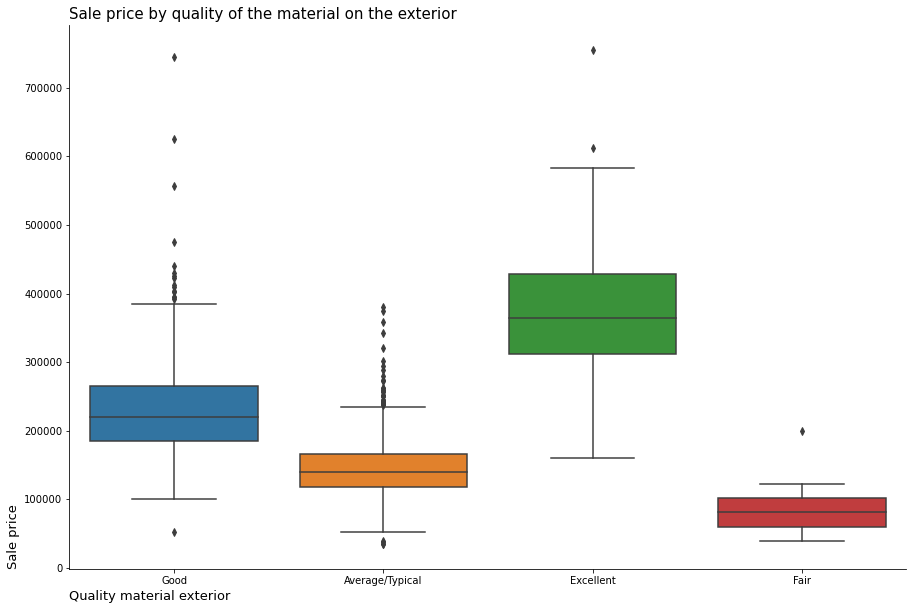

In [272]:
fig, ax = plt.subplots(figsize=(15, 10))
df_exter_qu = df_train[["ExterQual", "SalePrice"]].copy()
exter_qu_code_to_description = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average/Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
}
df_exter_qu['ExterQualDescription'] = df_exter_qu['ExterQual'].map(exter_qu_code_to_description)
exter_qual_and_sale_price = sns.boxplot(data=df_exter_qu, x="ExterQualDescription", y="SalePrice", ax=ax)
exter_qual_and_sale_price.set_title('Sale price by quality of the material on the exterior', fontsize = 15, loc='left')
exter_qual_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
exter_qual_and_sale_price.set_xlabel('Quality material exterior', fontsize = 13, loc="left")
sns.despine()

Here we have a similiar situation than KitchenQual, price high when the quality is Good and Excellent, with high max prices en both.

On the other hand, the price decreases with Typical and Fair, with min price with Typical.

In [207]:
df_train.groupby('ExterQual')['SalePrice'].describe().T

ExterQual             Ex             Fa             Gd             TA
count          52.000000      14.000000     488.000000     906.000000
mean       367360.961538   87985.214286  231633.510246  144341.313466
std        116401.264200   39826.918794   71188.873899   42471.815703
min        160000.000000   39300.000000   52000.000000   34900.000000
25%        311404.000000   60250.000000  185000.000000  118589.500000
50%        364606.500000   82250.000000  220000.000000  139450.000000
75%        428788.500000  102000.000000  265984.250000  165500.000000
max        755000.000000  200000.000000  745000.000000  381000.000000

Here we have a numerical comparation.

We have few houses with quality Excellent and Fair. However, the price in the case of Excellent is sparsed.

If we compare with Ta, we have much more houses, and the range of the price is limited. We can see that comparing the std, 116401 in case of Ex, against 42471 of Ta.

We can see this below with the dististribution graph.

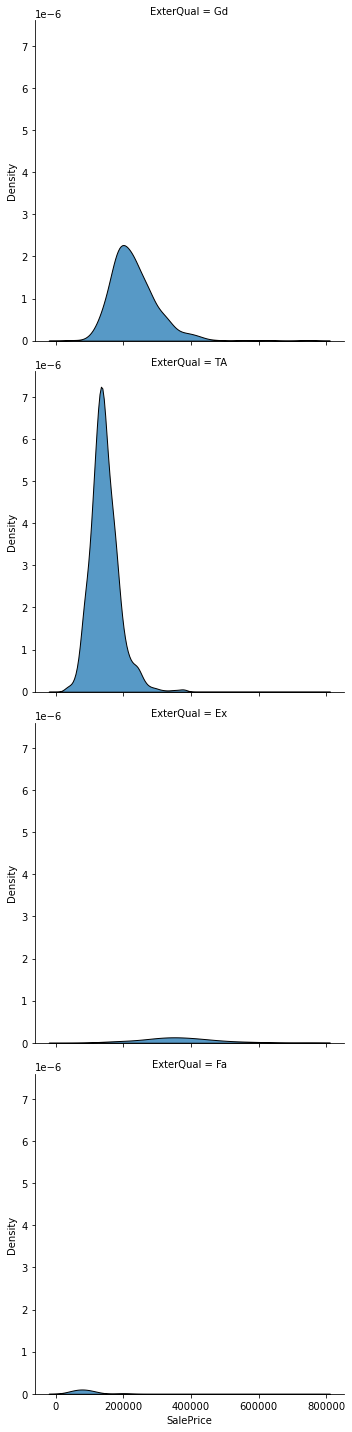

In [208]:
_ = sns.displot(data = df_train, x="SalePrice", col="ExterQual", multiple="stack", kind="kde", col_wrap=1)

### Sale price by first floor square feet (1stFlrSF)

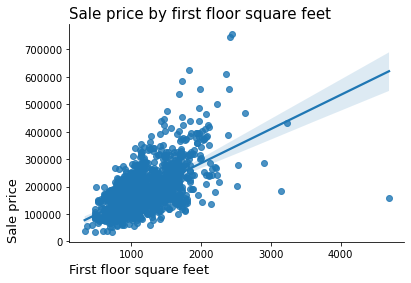

In [210]:
fst_flr_sf_and_sale_price = sns.regplot(data=df_train, x="1stFlrSF", y="SalePrice")
fst_flr_sf_and_sale_price.set_title('Sale price by first floor square feet', fontsize = 15, loc='left')
fst_flr_sf_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
fst_flr_sf_and_sale_price.set_xlabel('First floor square feet', fontsize = 13, loc="left")
sns.despine()

Here we can observe how the price increases when the first floor square feet also does.

### Sale price by remodel date (YearRemodAdd)

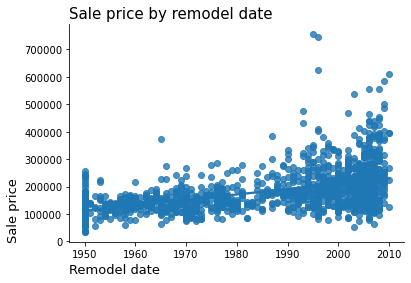

In [211]:
year_remod_add_and_sale_price = sns.regplot(data=df_train, x="YearRemodAdd", y="SalePrice")
year_remod_add_and_sale_price.set_title('Sale price by remodel date', fontsize = 15, loc='left')
year_remod_add_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
year_remod_add_and_sale_price.set_xlabel('Remodel date', fontsize = 13, loc="left")
sns.despine()

We can appreciate here how the price increases with the years, it looks like a curve. It has the same behavior than year built, also if the remodel date is the same than construction date means that the house has not been remodeled.

In [219]:
df_remod_houses = df_train[df_train["YearBuilt"] != df_train["YearRemodAdd"]]
df_remod_houses.shape

(696, 81)

We have just 696 houses that have been remodelated.

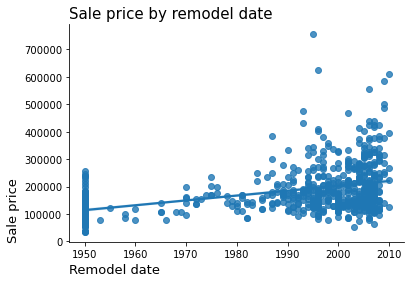

In [216]:
year_remod_add_and_sale_price = sns.regplot(data=df_remod_houses, x="YearRemodAdd", y="SalePrice")
year_remod_add_and_sale_price.set_title('Sale price by remodel date', fontsize = 15, loc='left')
year_remod_add_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
year_remod_add_and_sale_price.set_xlabel('Remodel date', fontsize = 13, loc="left")
sns.despine()

The relationship looks similar than before.

### Sale price by year garage was built (GarageYrBlt)

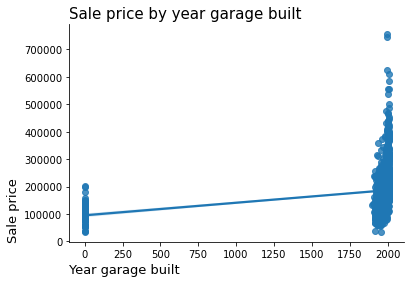

In [221]:
garage_yr_blt_and_sale_price = sns.regplot(data=df_train, x="GarageYrBlt", y="SalePrice")
garage_yr_blt_and_sale_price.set_title('Sale price by year garage built', fontsize = 15, loc='left')
garage_yr_blt_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
garage_yr_blt_and_sale_price.set_xlabel('Year garage built', fontsize = 13, loc="left")
sns.despine()

It seems that most of the garage were built around year 2000, and a house with garage have more price.

### Sale price by full bathrooms above grade (FullBath)

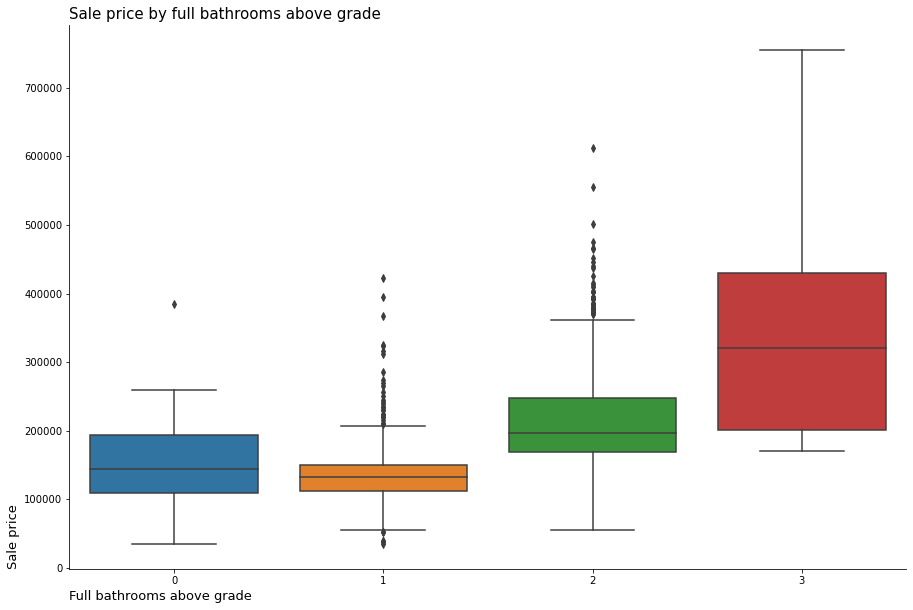

In [222]:
fig, ax = plt.subplots(figsize=(15, 10))
full_bath_and_sale_price = sns.boxplot(data = df_train, x = "FullBath", y = "SalePrice", ax=ax)
full_bath_and_sale_price.set_title('Sale price by full bathrooms above grade', fontsize = 15, loc='left')
full_bath_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
full_bath_and_sale_price.set_xlabel('Full bathrooms above grade', fontsize = 13, loc="left")
sns.despine()

In [224]:
df_train.groupby('FullBath')['SalePrice'].describe().T

FullBath              0              1              2              3
count          9.000000     650.000000     768.000000      33.000000
mean      165200.888889  134751.440000  213009.825521  347822.909091
std       106083.806001   41565.080488   72446.809159  165185.455377
min        35311.000000   34900.000000   55000.000000  170000.000000
25%       108959.000000  112000.000000  168500.000000  200624.000000
50%       145000.000000  132375.000000  196750.000000  320000.000000
75%       194201.000000  150562.500000  248082.000000  430000.000000
max       385000.000000  423000.000000  611657.000000  755000.000000

As we can see, we have few houses with 0 FullBath. With 1 FullBath, the mean is similar than 0 FullBath. We have much more cases, but the range of the price is limited looking at the standard deviation.

The price starts to increase with 2 and 3 FullBath. Most of houses have 2 FullBath.

The price with 3 FullBath is well sparsed, it we have here the max price.

### Sale price by garage status (GarageFinish)

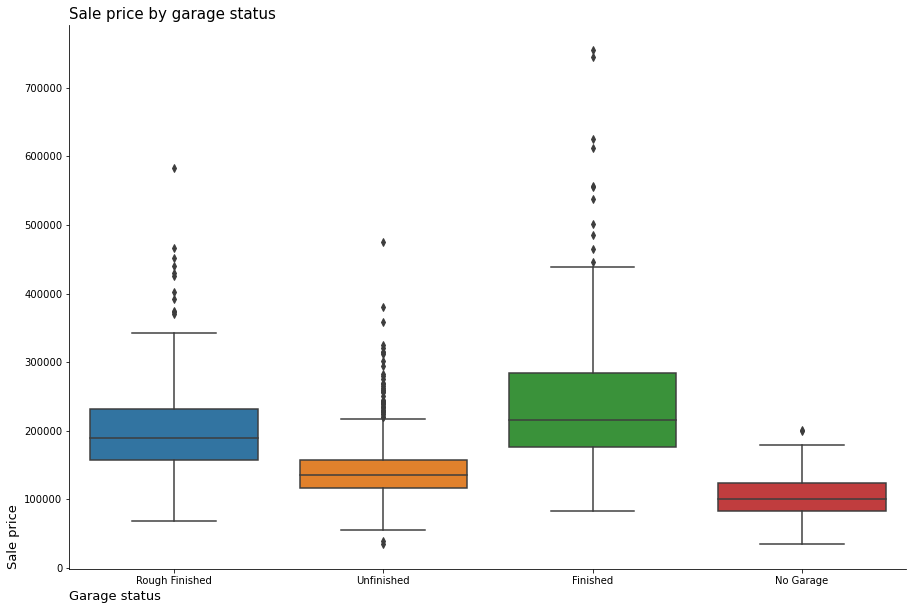

In [274]:
fig, ax = plt.subplots(figsize=(15, 10))
df_garage_finish_qc = df_train[["GarageFinish", "SalePrice"]].copy()
garage_finish_code_to_description = {
    'Fin': 'Finished',
    'RFn': 'Rough Finished',
    'Unf': 'Unfinished',
    'NA': 'No Garage'
}
df_garage_finish_qc['GarageFinishDescription'] = df_garage_finish_qc['GarageFinish'].map(garage_finish_code_to_description)
garage_finish_and_sale_price = sns.boxplot(data=df_garage_finish_qc, x="GarageFinishDescription", y="SalePrice", ax=ax)
garage_finish_and_sale_price.set_title('Sale price by garage status', fontsize = 15, loc='left')
garage_finish_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
garage_finish_and_sale_price.set_xlabel('Garage status', fontsize = 13, loc="left")
sns.despine()

In [226]:
df_train.groupby('GarageFinish')['SalePrice'].describe().T

GarageFinish            Fin             NA            RFn            Unf
count            352.000000      81.000000     422.000000     605.000000
mean          240052.690341  103317.283951  202068.869668  142156.423140
std            96960.593232   32815.023389   63536.222518   46498.528211
min            82500.000000   34900.000000   68400.000000   35311.000000
25%           176000.000000   82500.000000  158000.000000  116000.000000
50%           215000.000000  100000.000000  190000.000000  135000.000000
75%           283847.250000  124000.000000  232000.000000  157000.000000
max           755000.000000  200500.000000  582933.000000  475000.000000

When the house doesn't  have a garage or has it unfinished, the price is bellow the mean of the house's price. Most of the houses have the garage unfinished. And this is the case where the price range is narrow.

The price increases above the mean when the house has the garage Finished or Rough Finished, and we have the max price when it is finished.

### Sale price by total rooms above grade (TotRmsAbvGrd)

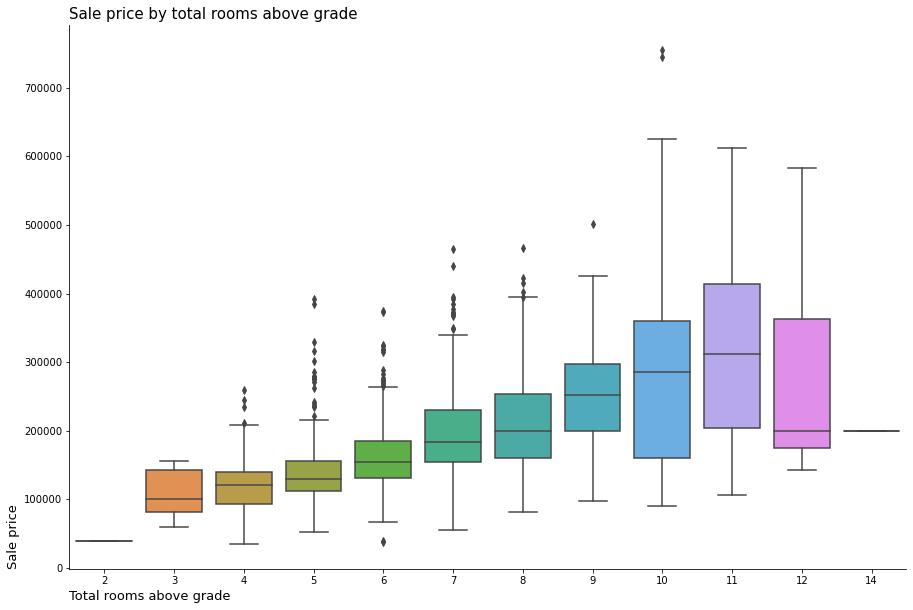

In [227]:
fig, ax = plt.subplots(figsize=(15, 10))
tot_rms_abv_grd_and_sale_price = sns.boxplot(data = df_train, x = "TotRmsAbvGrd", y = "SalePrice", ax=ax)
tot_rms_abv_grd_and_sale_price.set_title('Sale price by total rooms above grade', fontsize = 15, loc='left')
tot_rms_abv_grd_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
tot_rms_abv_grd_and_sale_price.set_xlabel('Total rooms above grade', fontsize = 13, loc="left")
sns.despine()

Here we can see how the price increases with the total of rooms. We find the max price with 10 roOms, and the median decreases with 12 and 14 rooms.

### Sale price by number of firepalces (Fireplaces)

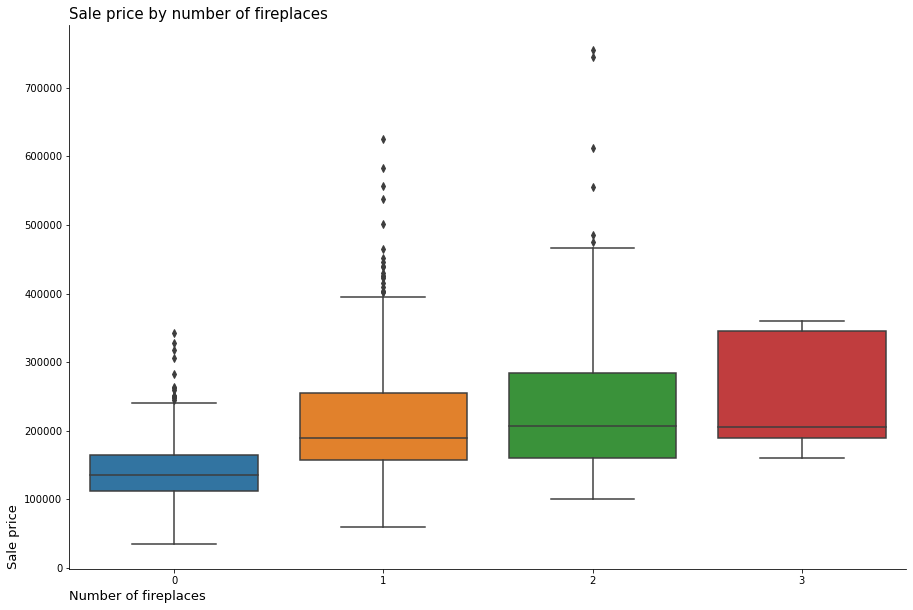

In [228]:
fig, ax = plt.subplots(figsize=(15, 10))
over_qual_and_sale_price = sns.boxplot(data = df_train, x = "Fireplaces", y = "SalePrice", ax=ax)
over_qual_and_sale_price.set_title('Sale price by number of fireplaces', fontsize = 15, loc='left')
over_qual_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
over_qual_and_sale_price.set_xlabel('Number of fireplaces', fontsize = 13, loc="left")
sns.despine()

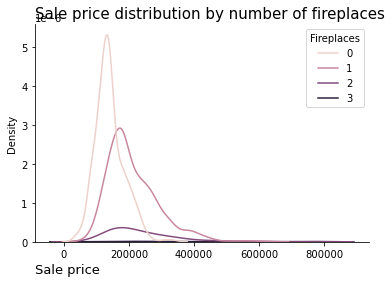

In [366]:
fireplace_and_sale_price = sns.kdeplot(data=df_train, x="SalePrice", hue="Fireplaces")
fireplace_and_sale_price.set_title('Sale price distribution by number of fireplaces', fontsize = 15, loc='left')
fireplace_and_sale_price.set_xlabel('Sale price', fontsize = 13, loc="left")
sns.despine()

Remember that most of the hoses have 0 and 1 fireplaces.

When the house has 0 or 1 fireplace, the distribution is heavy tailed, with a limited range of price. In case of 2 or 3 fireplace, the distribution looks short.

### Sale price by masonry veneer area (MasVnrArea)

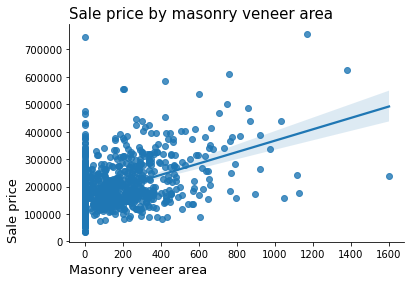

In [235]:
mas_vnr_area_and_sale_price = sns.regplot(data=df_train, x="MasVnrArea", y="SalePrice")
mas_vnr_area_and_sale_price.set_title('Sale price by masonry veneer area', fontsize = 15, loc='left')
mas_vnr_area_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
mas_vnr_area_and_sale_price.set_xlabel('Masonry veneer area', fontsize = 13, loc="left")
sns.despine()

Here we can see how the price increases with the masonry veneer area in square feet.

### Sale price by heating quality and condition (HeatingQC)

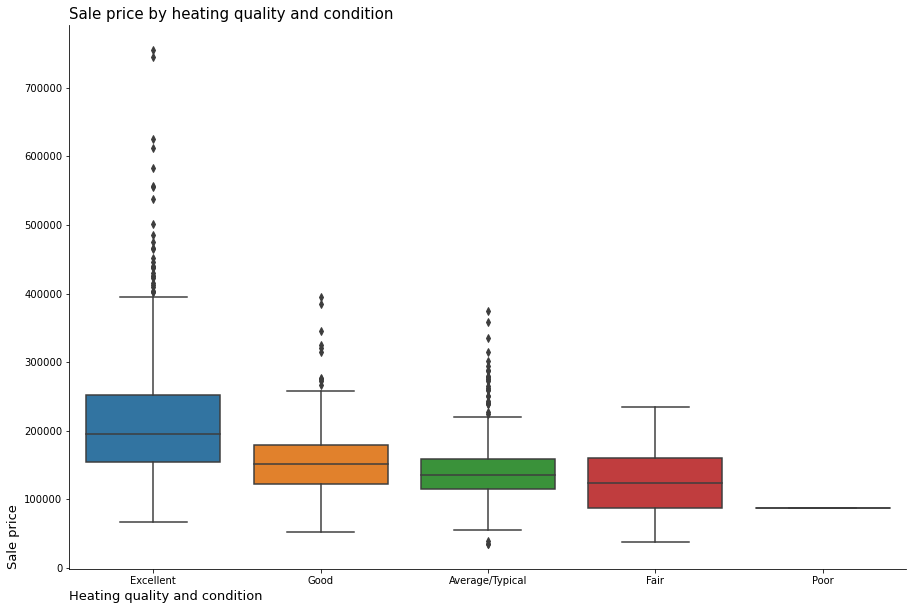

In [275]:
fig, ax = plt.subplots(figsize=(15, 10))

df_heating_qc = df_train[["HeatingQC", "SalePrice"]].copy()
df_heating_qc['HeatingQCDescription'] = df_heating_qc['HeatingQC'].map(heating_qc_code_to_description)
over_qual_and_sale_price = sns.boxplot(data=df_heating_qc, x="HeatingQCDescription", y="SalePrice", ax=ax)
over_qual_and_sale_price.set_title('Sale price by heating quality and condition', fontsize = 15, loc='left')
over_qual_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
over_qual_and_sale_price.set_xlabel('Heating quality and condition', fontsize = 13, loc="left")
sns.despine()

Here we can see how the price decreases based on the heating quality and condition.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


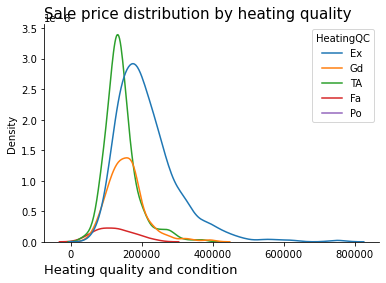

In [239]:
fireplace_and_sale_price = sns.kdeplot(data=df_train, x="SalePrice", hue="HeatingQC")
fireplace_and_sale_price.set_title('Sale price distribution by heating quality', fontsize = 15, loc='left')
fireplace_and_sale_price.set_xlabel('Heating quality and condition', fontsize = 13, loc="left")
sns.despine()

With most of the qualities the distribution is kind of heavy tailed, but in case of Fair, the distribution looks short tailed.

### Sale price by foundation (Foundation)

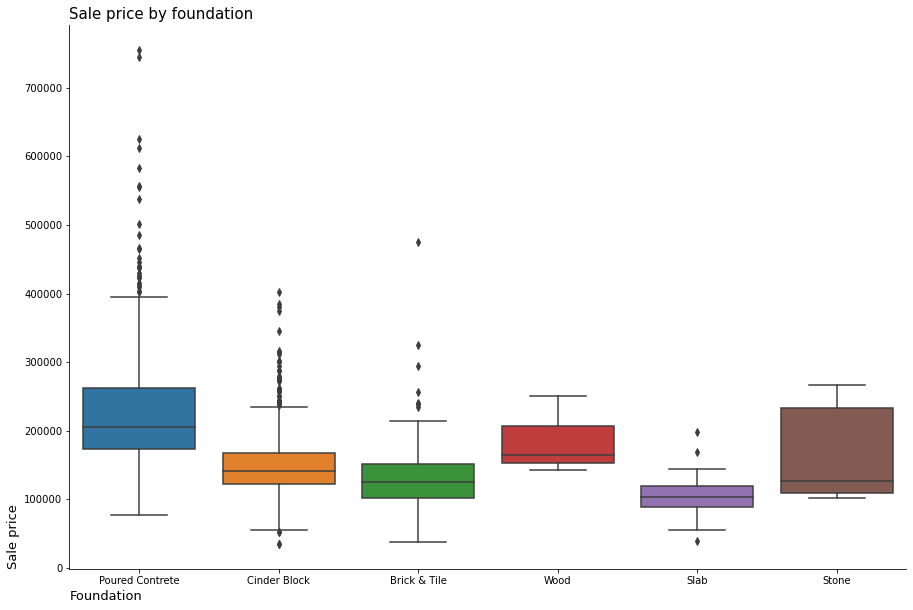

In [369]:
fig, ax = plt.subplots(figsize=(15, 10))
df_fundation = df_train[["Foundation", "SalePrice"]].copy()
foundation_code_to_description = {
    'BrkTil': 'Brick & Tile',
    'CBlock': 'Cinder Block',
    'PConc': 'Poured Contrete',
    'Slab': 'Slab',
    'Stone': 'Stone',
    'Wood': 'Wood'
}
df_fundation['FoundationDescription'] = df_fundation['Foundation'].map(foundation_code_to_description)
over_qual_and_sale_price = sns.boxplot(data=df_fundation, x="FoundationDescription", y="SalePrice", ax=ax)
over_qual_and_sale_price.set_title('Sale price by foundation', fontsize = 15, loc='left')
over_qual_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
over_qual_and_sale_price.set_xlabel('Foundation', fontsize = 13, loc="left")
sns.despine()

We can appreciate how the price drecreases when the foundation is Cinder Block, Brick & Tile or Slab.

We can find the max price when the foundation is Poured Contrete, and the min price when it is Cinder Block.

### Sale price by garage type (GarageType)

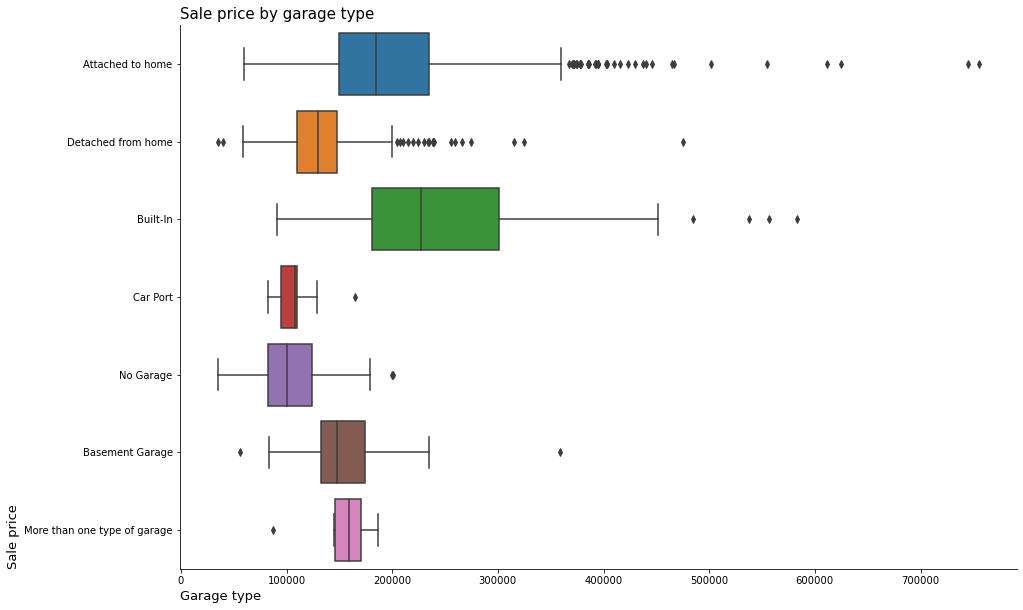

In [280]:
fig, ax = plt.subplots(figsize=(15, 10))
df_garage_type = df_train[["GarageType", "SalePrice"]].copy()
df_garage_type['GarageTypeDescription'] = df_garage_type['GarageType'].map(garage_type_code_to_description)
garage_type_and_sale_price = sns.boxplot(data=df_garage_type, y="GarageTypeDescription", x="SalePrice", ax=ax, orient='h')
garage_type_and_sale_price.set_title('Sale price by garage type', fontsize = 15, loc='left')
garage_type_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
garage_type_and_sale_price.set_xlabel('Garage type', fontsize = 13, loc="left")
sns.despine()

In this case, we can see low price when the house has a garage type Detached from home, Car Port of if the the house doesn't  have a garage.

A house with Attached to home or Built-In, we can see that has a high price.

### Sale price by second floor square feet (2ndFlrSF)

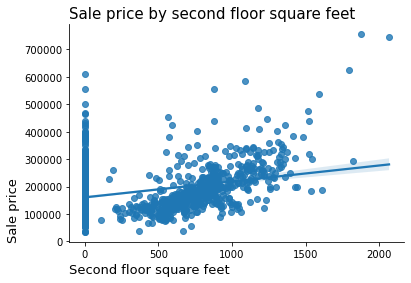

In [244]:
flr2_sf_and_sale_price = sns.regplot(data=df_train, x="2ndFlrSF", y="SalePrice")
flr2_sf_and_sale_price.set_title('Sale price by second floor square feet', fontsize = 15, loc='left')
flr2_sf_and_sale_price.set_ylabel('Sale price', fontsize = 13, loc="bottom")
flr2_sf_and_sale_price.set_xlabel('Second floor square feet', fontsize = 13, loc="left")
sns.despine()

We can see how the price increases with the Second floor square feet with like a curve.

### Conclusions

We have observed that the price can be affected by some features, here we have a summary:

- The price increases with the rate of Overall Quality.
- We have max price in NridgHt and NoRidge neighboorhoods and low price in other like OldTown and BrkSide.
- The price increases with the Above grade living area square feet.
- The price increases with the number of cars, except when the garage is for 4 cars.
- We saw positive corelation between TotalBsmtSF and SalePrice
- We can see how the price increases with the year built.
- As 1stFlrSF increases, the price also does.
- We can see show the price increases with the total of rooms.

## Multivariate Analisys<a name="multi"></a>

I'll do some Bivariate analisys in order to find relations between our targes and two or more features.

### Sale price by basement quality (BsmtQual) and total square feet (TotalBsmtSF)

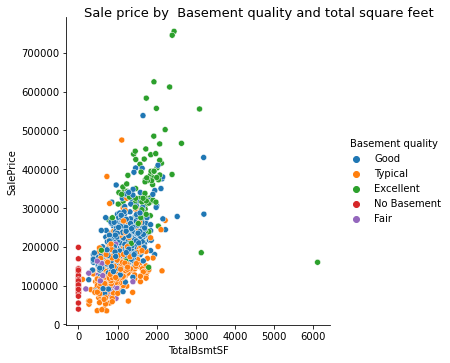

In [348]:
df_sale_price_bsmt_qu_toal_bsmt_sf = df_train[["BsmtQual", "TotalBsmtSF", "SalePrice"]].copy()
df_sale_price_bsmt_qu_toal_bsmt_sf['BsmtQualDescription'] = df_sale_price_bsmt_qu_toal_bsmt_sf['BsmtQual'].map(
                                                                                bsmt_qual_qc_code_to_description)
total_bsmt_df_and_sale_price = sns.relplot(data = df_sale_price_bsmt_qu_toal_bsmt_sf, x="TotalBsmtSF", y="SalePrice",
                                           hue="BsmtQualDescription")
total_bsmt_df_and_sale_price.fig.suptitle('Sale price by  Basement quality and total square feet', x=0.6, y=1, 
                                          fontsize=13)
total_bsmt_df_and_sale_price._legend.set_title('Basement quality')

Based on above, we can see how the price increases with the total square feet of basement area, and we can find a higher price based on the quality of the basement.

### Sale price by garage cars (GarageCars) and garage finish (GarageFinish)

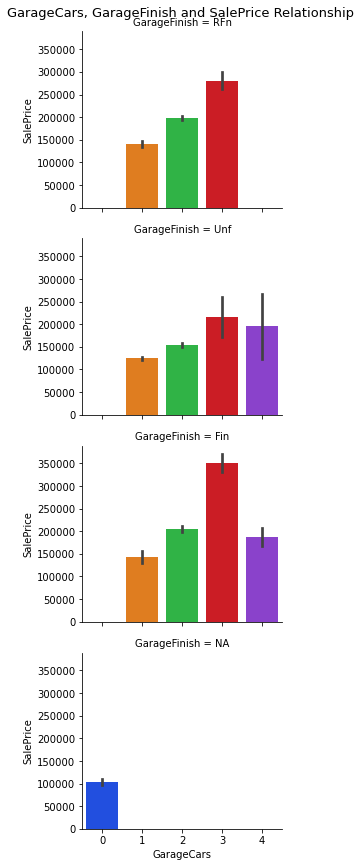

In [286]:
garage_cars_and_garage_finis_and_sale_price = sns.catplot(
        x='GarageCars', 
        y='SalePrice', 
        data=df_train,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        col ='GarageFinish',
        col_wrap=1)
_ = garage_cars_and_garage_finis_and_sale_price.fig.suptitle('GarageCars, GarageFinish and SalePrice Relationship', 
                                                         x=0.6, y=1, fontsize=13)

We see that if the house has garege for 3 cars, it has always the highest price, regardless of quality.

There is a difference only for 4 cars, that is lower than a house with 1 or 2, when the quality is No Garage.

### Sale price by year built (YearBuilt) and kitchen quality (KitchenQual)

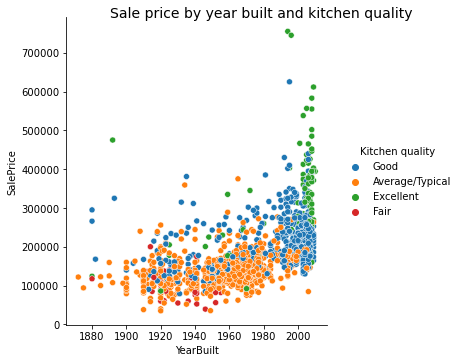

In [341]:
df_year_built_kitchen_sale_price = df_train[["YearBuilt", "KitchenQual", "SalePrice"]].copy()
df_year_built_kitchen_sale_price["KitchenQualDescription"] = df_year_built_kitchen_sale_price['KitchenQual'].map(
                                        kitchen_qu_code_to_description)
year_built_and_kitchen_qual_and_sale_price_plot = sns.relplot(data=df_year_built_kitchen_sale_price, x="YearBuilt", 
                                                         y="SalePrice", hue="KitchenQualDescription")
year_built_and_kitchen_qual_and_sale_price_plot.fig.suptitle('Sale price by year built and kitchen quality', 
                                                        x=0.6, y=1, fontsize=14)
year_built_and_kitchen_qual_and_sale_price_plot._legend.set_title('Kitchen quality')

Based on above, the quality has changed with the years, and  also the price has been increased.

### Sale price by year built (YearBuilt) and neighborhood (Neighborhood)

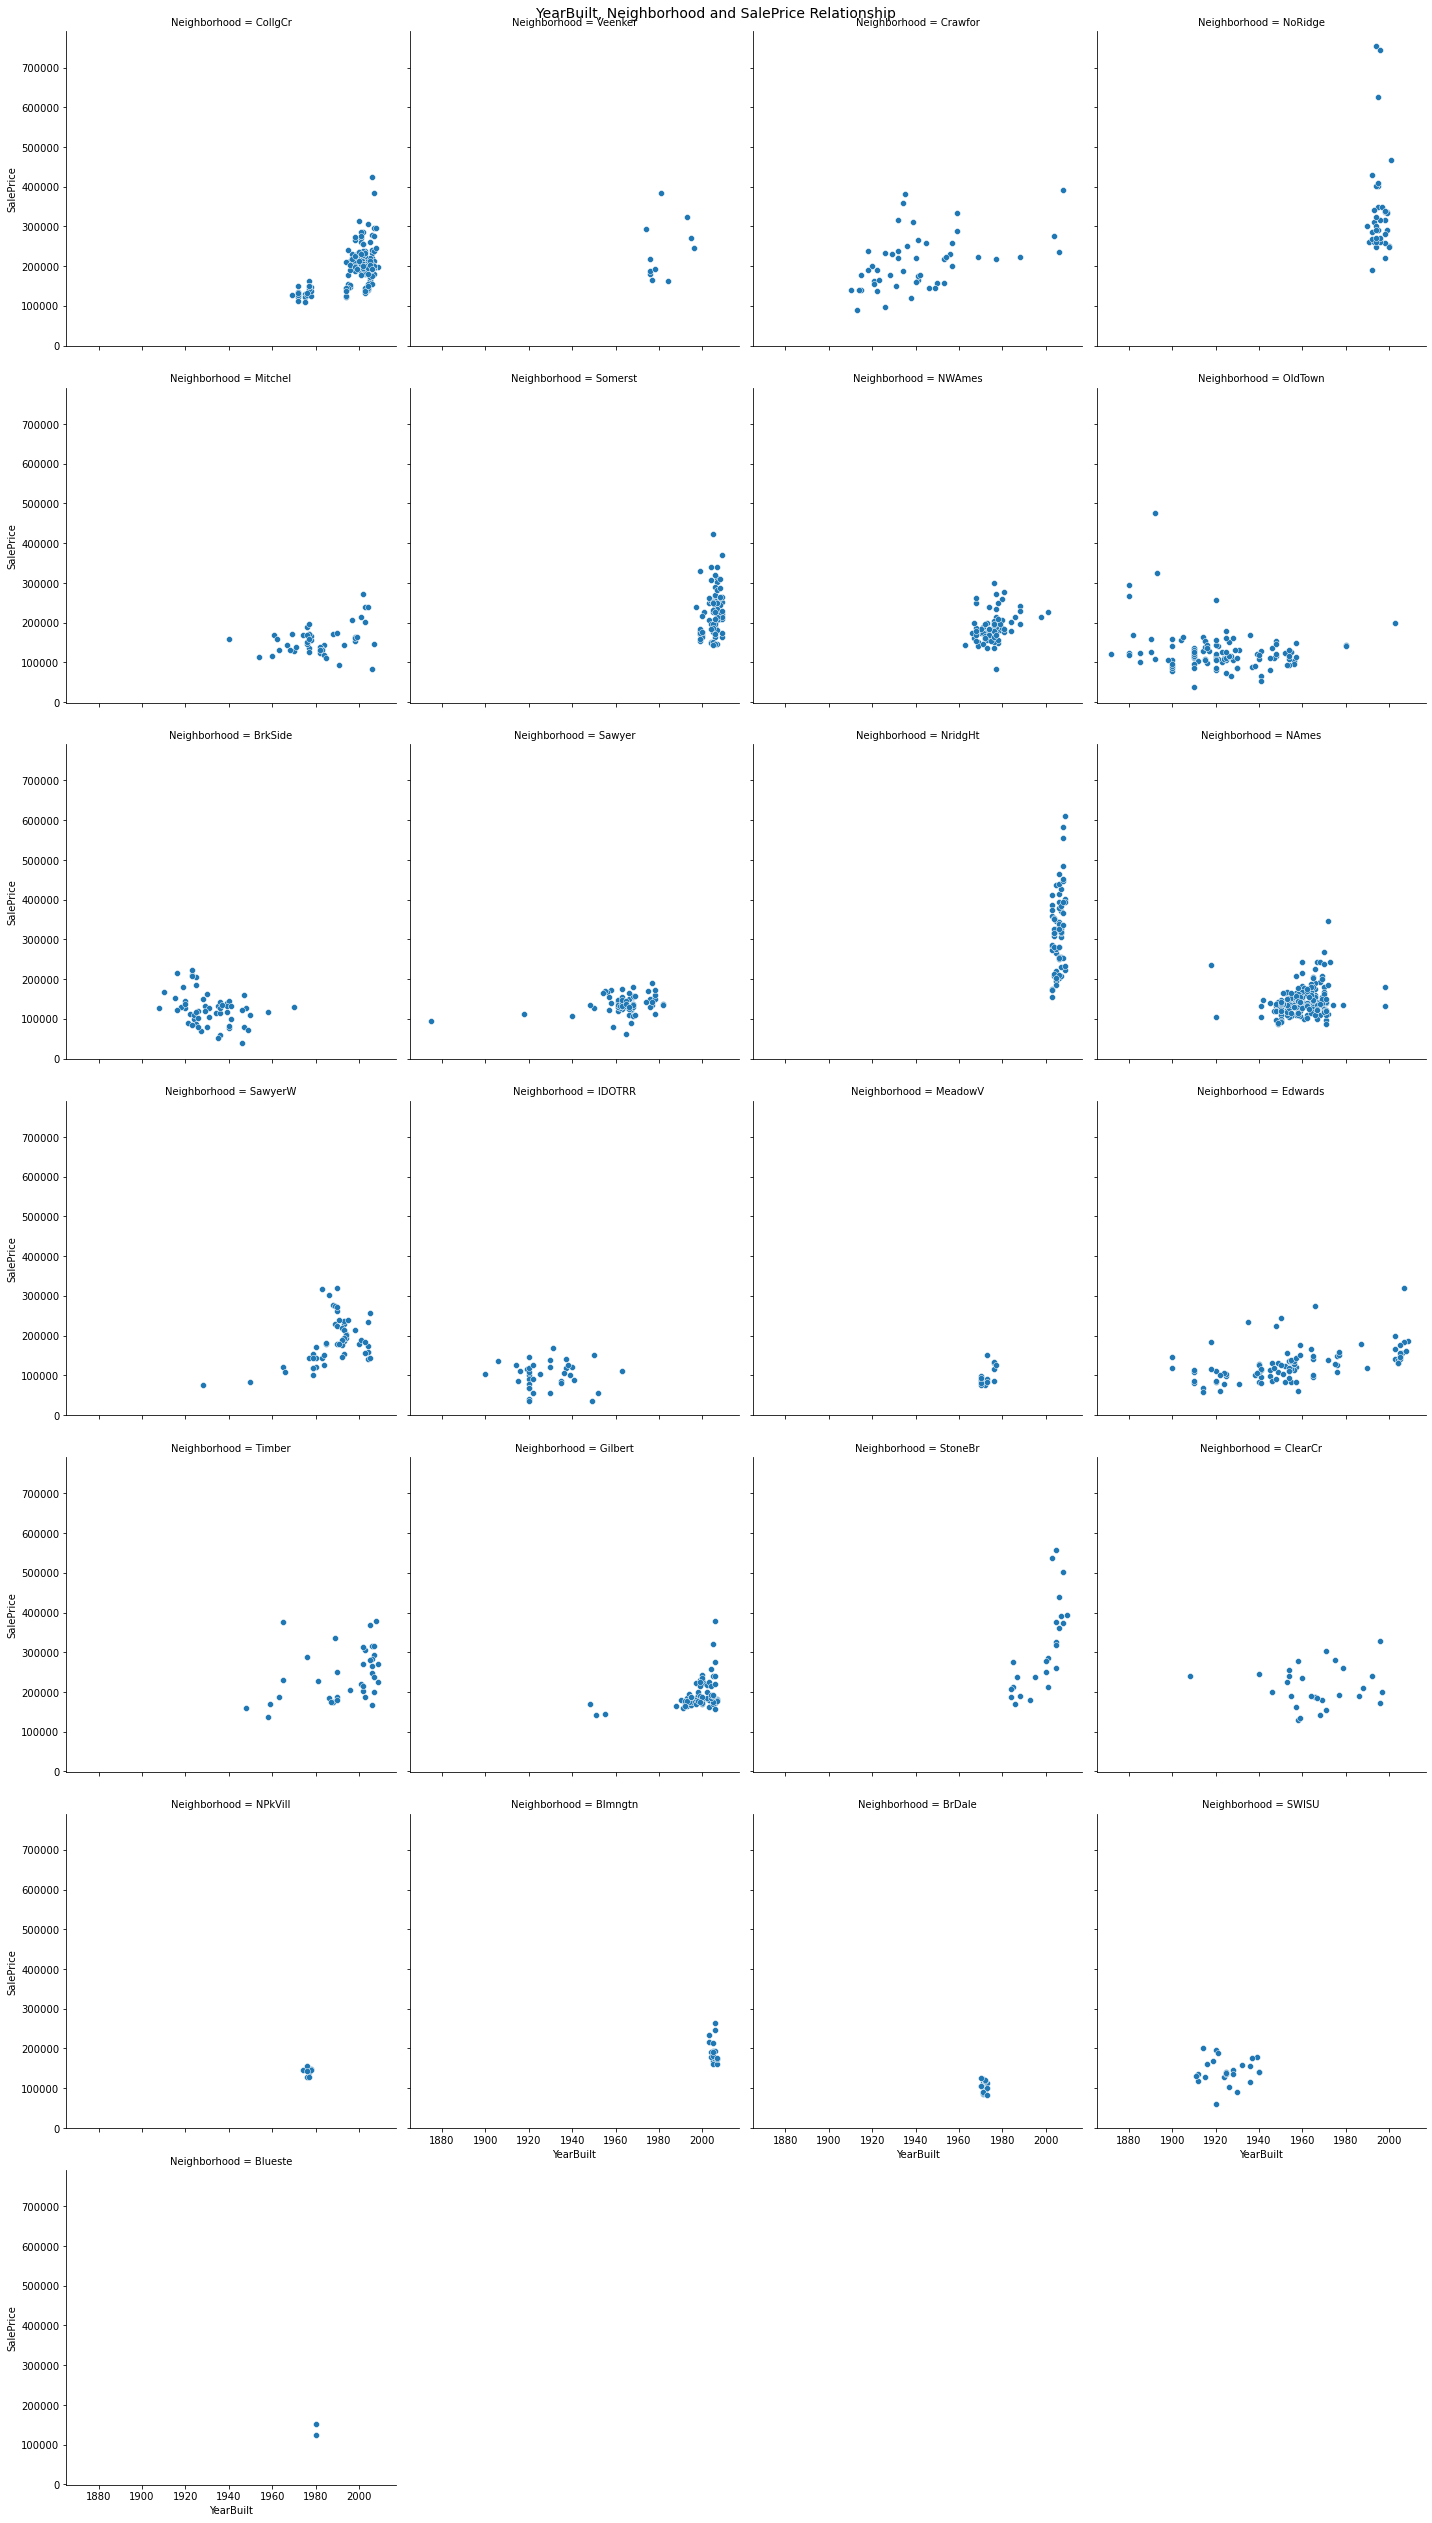

In [293]:
year_builr_and_neighborhood_and_sale_price = sns.relplot(data = df_train, x = "YearBuilt", y = "SalePrice", 
                                                         col = "Neighborhood", col_wrap=4)
_ = year_builr_and_neighborhood_and_sale_price.fig.suptitle('YearBuilt, Neighborhood and SalePrice Relationship', 
                                                        x=0.5, y=1, fontsize=14)

It shows how the constructions were changing in the neighborhoods over the years.

We have new popular neighborhoods with high price, like Stone Brook (StoneBr), Bloomington Heights(Blmngtn), Northridge Heights (NridgHt), Somerset (Somerst) and Northridge(NoRidge).

In other sites, the construction stopped, such us Brookside (BrkSide), Sawyer (Sawyer), Northpark Villa (NPkVill), Briardale (BrDale), South & West of Iowa State University (SWISU), and Iowa DOT & Rail Road (IDOTRR). And thier price is bellow the above neighborhoods.

### Sale price by exterior (ExterQual) and kitchen quality (KitchenQual)

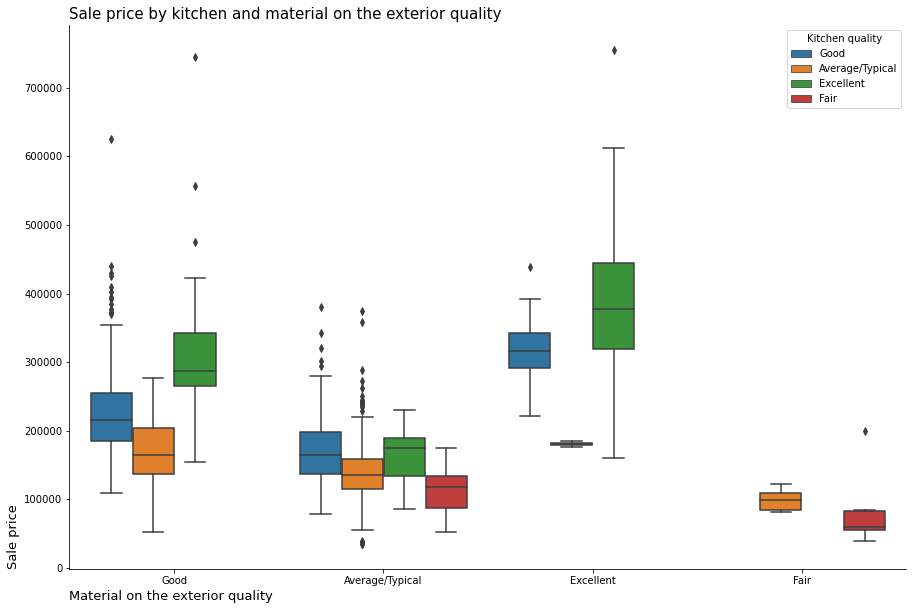

In [320]:
fig, ax = plt.subplots(figsize=(15, 10))
df_exter_qual_and_kitchen_qual_sale_price = df_train[["SalePrice", "ExterQual", "KitchenQual"]].copy()
df_exter_qual_and_kitchen_qual_sale_price['ExterQualDescription'] = df_exter_qual_and_kitchen_qual_sale_price[
                                                                    'ExterQual'].map(exter_qu_code_to_description)
df_exter_qual_and_kitchen_qual_sale_price['KitchenQualDescription'] = df_exter_qual_and_kitchen_qual_sale_price[
                                                                    'KitchenQual'].map(kitchen_qu_code_to_description)

exter_qual_and_kitchen_qual_and_sale_price_plot = sns.boxplot(data=df_exter_qual_and_kitchen_qual_sale_price, 
                                                         x="ExterQualDescription", y="SalePrice", 
                                                         hue="KitchenQualDescription", ax=ax)
exter_qual_and_kitchen_qual_and_sale_price_plot.set_title('Sale price by kitchen and material on the exterior quality', 
                                                     fontsize = 15, loc='left')
exter_qual_and_kitchen_qual_and_sale_price_plot.set_ylabel('Sale price', fontsize = 13, loc="bottom")
exter_qual_and_kitchen_qual_and_sale_price_plot.set_xlabel('Material on the exterior quality', fontsize = 13, loc="left")
exter_qual_and_kitchen_qual_and_sale_price_plot.legend(title="Kitchen quality")
sns.despine()

We can see what when both ExterQual and KitchenQual are Fair, the price is too low. Similar situation is found when both are Typical.

On the other hand, the price increases when both are Excellent, and a bit lower when both are Good.

## Feature Engineering<a name="feature"></a>

I will apply the log function due to the skewness and standarize these numeraical features:
- GrLivArea
- TotalBsmtSF
- YearBuilt
- GarageArea
- 1stFlrSF
- YearRemodAdd
- GarageYrBlt
- 2ndFlrSF
- MasVnrArea
- BsmtFinSF1

Categorical Nominal, I'll apply one hot encodig:
- TotRmsAbvGrd
- Neighborhood
- Foundation
- GarageType
- GarageFinish
- Fireplaces
- GarageCars
- FullBath

Categorical Ordinal:
- MSSubClass
- HeatingQC
- OverallQual
- KitchenQual
- BsmtQual
- ExterQual

 About the outliers, I won't do any treatment with them because I say that are valid values.

With the categorical Nominal featues, I'll apply one hot encoding.

## Models<a name="models"></a>

Before starting analysing the model I'll split the data into train and test sets.

In [370]:
X = df_train.copy()
y = X.pop("SalePrice")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now I'll create a pipeline with these steps in order to do the feature engineering:
- Drop the unnecessary features.
- Standardize numerical features.
- Encode the categorial features.

In [371]:
class ColumnDropperTransformer():
    """
    Class Transformer to remove the unnecessary columns
    """
    def __init__(self,columns):
        self.columns = columns

    def transform(self, data, y=None):
        return data.drop(self.columns,axis=1)

    def fit(self, data, y=None):
        return self


class ColumnSkewnessTransformer():
    """
    Class Transformer Skewness features
    Apply a log method to fix the skewness
    """
    def __init__(self,columns):
        self.columns = columns

    def transform(self, data, y=None):
        for each in self.columns:
            data[each] = np.log1p(data[each])
        return data

    def fit(self, data, y=None):
        return self
    
class Debug(BaseEstimator, TransformerMixin):
        """
        Debug Class, used to print the status of the data through the different steps of the pipeline.
        """  
    def transform(self, X):
        print(X.shape)
        #print(pd.DataFrame(X).describe())
        #what other output you want
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [373]:
numerical_pipeline = Pipeline(
    steps=[
        ('number_scale', StandardScaler()),
    ]
)

numerical_categorical = ColumnTransformer(
    transformers=[
            ('numerical_pipeline', numerical_pipeline, 
             ['2ndFlrSF','GarageArea', 'GarageYrBlt','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'MasVnrArea', 'GrLivArea','TotalBsmtSF','YearBuilt', '1stFlrSF', 
              'YearRemodAdd']),
            ('one_hot_columns', OneHotEncoder(handle_unknown='ignore'), ['GarageType','Foundation','Fireplaces', 
                                                                         'Neighborhood','TotRmsAbvGrd','GarageCars',
                                                                         'FullBath','GarageFinish']),
            ('one_hot_BsmtQual', OrdinalEncoder(categories=[['NA','Po','Fa','TA','Gd','Ex']], 
                                                handle_unknown='use_encoded_value', unknown_value=6), ['BsmtQual']),
            ('one_hot_KitchenQual', OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']], 
                                                   handle_unknown='use_encoded_value', unknown_value=5), ['KitchenQual']),
            ('one_hot_ExterQual', OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']], 
                                                 handle_unknown='use_encoded_value', unknown_value=5), ['ExterQual']),
            ('one_hot_HeatingQC', OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']], 
                                                 handle_unknown='use_encoded_value', unknown_value=5), ['HeatingQC'])
], remainder='passthrough')


#Pipeline
preprocessor_pipeline = Pipeline(steps=[#('debug1', Debug()),
                                ('drop_colummns', ColumnDropperTransformer([ 'Id', 'MSZoning','LotArea', 
                                                                            'Street', 'Alley', 'LotShape', 'LandContour', 
                                                                            'Utilities', 'LotConfig', 'LandSlope', 
                                                                            'Condition1', 'Condition2', 'BldgType',
                                                                           'HouseStyle', 'OverallCond','RoofStyle', 
                                                                            'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                                            'MasVnrType','ExterCond', 'BsmtCond', 
                                                                            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                                            'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
                                                                           'CentralAir', 'Electrical', 'LowQualFinSF', 
                                                                            'BsmtFullBath', 'BsmtHalfBath',
                                                                           'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                                                                           'Functional', 'FireplaceQu', 'GarageQual',
                                                                           'GarageCond', 'PavedDrive', 
                                                                            'EnclosedPorch', '3SsnPorch', 
                                                                            'ScreenPorch', 'PoolArea', 'PoolQC',
                                                                           'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 
                                                                            'YrSold', 'SaleType', 'SaleCondition'])),
                                ('skewness', ColumnSkewnessTransformer(['2ndFlrSF','GarageArea', 'GarageYrBlt','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 
                                                                        'MasVnrArea', 'GrLivArea', 
                                                                        'TotalBsmtSF', 'YearBuilt', 
                                                                        '1stFlrSF', 'YearRemodAdd'
                                                                        ])),
                               # ('debug2', Debug()),
                                ('numerical_categorical', numerical_categorical),
                              #  ('debug8', Debug())
                            ])

### DecisionTree

Let's start usin DecisionTreeRegressor, with the default parameters.

In [532]:
pipeline_dtr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeRegressor(random_state=42))])
pipeline_dtr_default.fit(X_train, y_train)
X_train_pred_dtr_default = pipeline_dtr_default.predict(X_train)
rmse_train_dtr_default = mean_squared_error(y_train, X_train_pred_dtr_default, squared=False)
rmse_train_dtr_default

183.58519140958066

I use the metric Root Mean Squared Error (RMSE) because it is used in the evaluation.

In [533]:
pipeline_dtr_default.score(X_train, y_train)

0.9999944000830953

We get a RMSE of 183.58 and a score of 0.99 by predecting the training data.

In [537]:
y_test_pred_dtr_default = pipeline_dtr_default.predict(X_test)
rmse_test_dtr_default = mean_squared_error(y_test, y_test_pred_dtr_default, squared=False)
rmse_test_dtr_default

38929.56183273303

In [538]:
pipeline_dtr_default.score(X_test, y_test)

0.7828187988857598

As we can see, the model does very well with the train data, with a good score and RMSE.

But with the test data, its behavior was significantly worse, with a RMSE of 36617.

Let's see if we can improve the model by tuning the hyperparameters usin GridSearchCV.

In [698]:
pipeline_dtr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeRegressor(random_state=42))])

dtr_param = {'model__criterion': ['squared_error', 'friedman_mse','poisson'],
             'model__max_features': ['sqrt', 'log2'],
             'model__min_samples_split': [2, 6, 8, 10, 15, 20],
             'model__max_depth': [2, 6, 8, 10, 15, 20],
             'model__min_samples_leaf': [2, 6, 8, 10, 15, 20]
            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
dtr_search = GridSearchCV(pipeline_dtr, dtr_param, cv=cv, error_score='raise', scoring='neg_mean_squared_error', n_jobs=-1)

In [700]:
dtr_search_result = dtr_search.fit(X_train, y_train)
print(dtr_search_result.best_params_)

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



{'model__criterion': 'poisson', 'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 20}


In [1087]:
pipeline_dtr_hyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                                     ('model', DecisionTreeRegressor(random_state=42, criterion='poisson', max_depth=15, 
                                      max_features='sqrt', min_samples_leaf=6, min_samples_split=20))])
pipeline_dtr_hyper.fit(X_train, y_train)
y_train_pred_dtr_hyper = pipeline_dtr_hyper.predict(X_train)
rmse_train_dtr_hyper = mean_squared_error(y_train, y_train_pred_dtr_hyper, squared=False)
rmse_train_dtr_hyper

34122.81307621642

In [1088]:
pipeline_dtr_hyper.score(X_train, y_train)

0.8065378795294134

In [1090]:
y_pred_test_dtr_hyper = pipeline_dtr_hyper.predict(X_test)
rmse_test_dtr_hyper = mean_squared_error(y_test, y_pred_test_dtr_hyper, squared=False)
rmse_test_dtr_hyper

41974.1779057035

In [1091]:
pipeline_dtr_hyper.score(X_test, y_test)

0.7475196420085803

The model has not improved, it has worse RMSE with the train and test data.

Let's see by unsig BayesSearchCV to tunning the hyperparameters.

In [ ]:
pipeline_dtr_bayes = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeRegressor(random_state=42))])

search_space_bayes_dtr = {
             'model__criterion': ['squared_error', 'friedman_mse','poisson'],
             'model__max_features': ['sqrt', 'log2','auto', None],
             'model__min_samples_split': (2,30),
             'model__max_depth': (2,30),
             'model__min_samples_leaf': (2,30)
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
optimizer_bayes_dtr = BayesSearchCV(pipeline_dtr_bayes, search_space_bayes_dtr, cv=cv)
optimizer_bayes_dtr.fit(X_train, y_train)
best_bayes_hyperparams_dtr = optimizer_bayes_dtr.best_params_
best_bayes_hyperparams_dtr

In [1092]:
pipeline_bayes_dtr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', DecisionTreeRegressor(criterion='squared_error',max_features='auto', 
                                                              max_depth=16, min_samples_leaf=20, min_samples_split=8))])

In [1093]:
pipeline_bayes_dtr.fit(X_train, y_train)
y_train_pred_bayes_dtr = pipeline_bayes_dtr.predict(X_train)
rmse_train_bayes_dtr = mean_squared_error(y_train, y_train_pred_bayes_dtr, squared=False)
rmse_train_bayes_dtr

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



33383.82080470269

In [1094]:
y_test_pred_bayes_dtr = pipeline_bayes_dtr.predict(X_test)
rmse_test_bayes_dtr = mean_squared_error(y_test, y_test_pred_bayes_dtr, squared=False)
rmse_test_bayes_dtr

36000.79283236042

Now with this values, the model has improved a bit than GridSearchCV. But with the default values was the which one that we get the best behavior.

In [1125]:
results = [['DT_Default', 183, 36617]]

### Random Forest

In [725]:
pipeline_rfr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42))])

pipeline_rfr_default.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_pipeline',
                 Pipeline(steps=[('drop_colummns',
                                  <__main__.ColumnDropperTransformer object at 0x000001DBD9E4ECD0>),
                                 ('Skewness',
                                  <__main__.ColumnSkewnessTransformer object at 0x000001DBDA14FE80>),
                                 ('numerical',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('age_transform',
                                                                   Pipeline(steps=[('age_scale',
                                                                                    StandardScaler())]),
                                                                   ['...
                                                                   ['KitchenQual']),
                                                                  ('one_hot_ExterQual',
                                                                   OrdinalEncoder(categories=[['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=5),
                                                                   ['ExterQual']),
                                                                  ('one_hot_HeatingQC',
                                                                   OrdinalEncoder(categories=[['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=5),
                                                                   ['HeatingQC'])]))])),
                ('model', RandomForestRegressor(random_state=42))])

In [726]:
y_train_pred_rfr_default = pipeline_rfr_default.predict(X_train)
rmse_train_rfr_default = mean_squared_error(y_train, y_train_pred_rfr_default, squared=False)
rmse_train_rfr_default

11969.777090503021

In [729]:
pipeline_rfr_default.score(X_train,y_train)

0.976194439305411

In [730]:
y_test_pred_rfr_default = pipeline_rfr_default.predict(X_test)
rmse_test_rfr_default = mean_squared_error(y_test, y_test_pred_rfr_default, squared=False)
rmse_test_rfr_default

26603.73530924022

In [732]:
pipeline_rfr_default.score(X_test,y_test)

0.8985742014006924

With the default values, we get a model better than Decision Tree, with a hihger RMSE with the train data, but a lower one with the test data. Seems that the model generalizes better.

Let's see if we can improve tunning the hyperparameters.

In [733]:
pipeline_rfr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42))])

rfr_param = {'model__criterion': ['squared_error', 'friedman_mse','poisson', 'absolute_error'],
             'model__max_features': ['sqrt', 'log2', None],
             'model__min_samples_split': [5, 9, 13,15, 20],
             'model__max_depth': [4, 8, 6, 10, 15, 20],
             'model__min_samples_leaf': [2, 4, 6, 10, 15, 20, 30],
             'model__n_estimators': [100, 120, 150, 170, 200]
            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
rfr_search = GridSearchCV(pipeline_rfr, rfr_param, cv=2, error_score='raise', scoring='neg_mean_squared_error', n_jobs=-1)
rfr_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor_pipeline',
                                        Pipeline(steps=[('drop_colummns',
                                                         <__main__.ColumnDropperTransformer object at 0x000001DBD9E4ECD0>),
                                                        ('Skewness',
                                                         <__main__.ColumnSkewnessTransformer object at 0x000001DBDA14FE80>),
                                                        ('numerical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('age_transform',
                                                                                          Pip...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'poisson', 'absolute_error'],
                         'model__max_depth': [4, 8, 6, 10, 15, 20],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [2, 4, 6, 10, 15, 20, 30],
                         'model__min_samples_split': [5, 9, 13, 15, 20],
                         'model__n_estimators': [100, 120, 150, 170, 200]},
             scoring='neg_mean_squared_error')

In [734]:
print("Best Hyperparameters:", rfr_search.best_params_)

Best Hyperparameters: {'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 120}


In [394]:
pipeline_rfr_hyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42, criterion='squared_error', max_depth=10,
                                max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=120))])
X = df_train.copy()
y = X.pop("SalePrice")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

pipeline_rfr_hyper.fit(X_train, y_train)
y_train_pred_rfr_hyper = pipeline_rfr_hyper.predict(X_train)
rmse_rfr_pred_rfr_hyper = mean_squared_error(y_train, y_train_pred_rfr_hyper, squared=False)
rmse_rfr_pred_rfr_hyper

0.07953051494180288

In [389]:
pipeline_rfr_hyper.score(X_train, y_train)

0.9591938439158672

In [390]:
y_test_pred_rfr_hyper = pipeline_rfr_hyper.predict(X_test)
rmse_rfr_test_rfr_hyper = mean_squared_error(y_test, y_test_pred_rfr_hyper, squared=False)
rmse_rfr_test_rfr_hyper

0.1465734969556714

In [391]:
pipeline_rfr_hyper.score(X_test, y_test)

0.8733595211788101

Their performance has not been improved by tunning the hyperparameters.

Let's see if there is luck using Bayes.

In [1107]:
pipeline_rfr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42))])

search_space_bayes_rfr = {
                 'model__criterion': ['squared_error', 'friedman_mse','poisson', 'absolute_error'],
                 'model__max_features': ['sqrt', 'log2', None],
                 'model__min_samples_split': [5, 9, 13,15, 20,  23, 25],
                 'model__max_depth': [4, 8, 6, 10, 15, 20, 23, 25],
                 'model__min_samples_leaf': [2, 4, 6, 10, 15, 20, 30, 50],
                 'model__n_estimators': [100, 150, 200, 500, 700, 1000]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
optimizer_bayes_rfr = BayesSearchCV(pipeline_rfr, search_space_bayes_rfr, cv=cv, scoring='neg_mean_squared_error')
optimizer_bayes_rfr.fit(X_train, y_train)
best_bayes_hyperparams_rfr = optimizer_bayes_rfr.best_params_
best_bayes_hyperparams_rfr

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\skle

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\ouw-Alejandro.Sandle\

OrderedDict([('model__criterion', 'squared_error'),
             ('model__max_depth', 20),
             ('model__max_features', None),
             ('model__min_samples_leaf', 6),
             ('model__min_samples_split', 15),
             ('model__n_estimators', 1000)])

In [1108]:
best_bayes_hyperparams_rfr

OrderedDict([('model__criterion', 'squared_error'),
             ('model__max_depth', 20),
             ('model__max_features', None),
             ('model__min_samples_leaf', 6),
             ('model__min_samples_split', 15),
             ('model__n_estimators', 1000)])

In [434]:
pipeline_rfr_bayes = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', RandomForestRegressor(random_state=42,  criterion='squared_error', max_depth=20,
                                                             max_features=None, min_samples_leaf=6, min_samples_split=15,
                                                             n_estimators=1000))])
pipeline_rfr_bayes.fit(X_train, y_train)
y_train_pred_rfr_bayes = pipeline_rfr_bayes.predict(X_train)
rmse_train_bayes_rfr = mean_squared_error(y_train, y_train_pred_rfr_bayes, squared=False)
rmse_train_bayes_rfr

0.11435926589128215

In [321]:
pipeline_rfr_bayes.score(X_train, y_train)

0.9094723120805981

In [435]:
y_test_pred_rfr_bayes = pipeline_rfr_bayes.predict(X_test)
rmse_test_bayes_rfr = mean_squared_error(y_test, y_test_pred_rfr_bayes, squared=False)
rmse_test_bayes_rfr

0.1494560724135177

In [1113]:
pipeline_rfr_bayes.score(X_test, y_test)

0.8702446414252383

Not luck using Bayes. We get the best performance with the default values.

In [1126]:
results.append(["RandonForest", 11969, 26603])

## xgboost

In [497]:
pipeline_xgbr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', xg.XGBRegressor())])

pipeline_xgbr_default.fit(X_train, y_train)
y_train_pred_xgbr_default = pipeline_xgbr_default.predict(X_train)
rmse_train_xgbr_default = mean_squared_error(y_train, y_train_pred_xgbr_default, squared=False)
rmse_train_xgbr_default

1428.6779759311141

In [498]:
pipeline_xgbr_default.score(X_train, y_train)

0.9996608631444778

In [499]:
y_test_pred_xgbr_default = pipeline_xgbr_default.predict(X_test)
rmse_test_xgbr_default = mean_squared_error(y_test, y_test_pred_xgbr_default, squared=False)
rmse_test_xgbr_default

28026.405733351752

In [500]:
pipeline_xgbr_default.score(X_test, y_test)

0.8874363909055988

The model has good scores, the RMSE of the train data is one of the best, but with the test is similar than other models.

Let's see if we can improve their performance with the hyperparameters.

In [813]:
pipeline_xgbr = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', xg.XGBRegressor())])

xgbr_param = {'model__booster': ['gbtree', 'gblinear', ],
              'model__max_depth': [3,4,6,8,10],
              'model__eta': [0.001, 0.01, 0.02, 0.03, 0.05,0.06, 0.07, 0.8, 0.1, 1.5, 2],
              'model__n_estimators': [100, 200, 300, 400, 500, 1000, 2000, 1500],
               "model__colsample_bytree": [0.1, 0.3, 0.5,1]

            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
xgbr_search = GridSearchCV(pipeline_xgbr, xgbr_param, cv=2, error_score='raise', scoring='neg_mean_squared_error', 
                           n_jobs=-1)
xgbr_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor_pipeline',
                                        Pipeline(steps=[('drop_colummns',
                                                         <__main__.ColumnDropperTransformer object at 0x000001DBD9E4ECD0>),
                                                        ('Skewness',
                                                         <__main__.ColumnSkewnessTransformer object at 0x000001DBDA14FE80>),
                                                        ('numerical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('age_transform',
                                                                                          Pip...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__booster': ['gbtree', 'gblinear'],
                         'model__colsample_bytree': [0.1, 0.3, 0.5, 1],
                         'model__eta': [0.001, 0.01, 0.02, 0.03, 0.05, 0.06,
                                        0.07, 0.8, 0.1, 1.5, 2],
                         'model__max_depth': [3, 4, 6, 8, 10],
                         'model__n_estimators': [100, 200, 300, 400, 500, 1000,
                                                 2000, 1500]},
             scoring='neg_mean_squared_error')

In [814]:
print("Best Hyperparameters:", xgbr_search.best_params_)

Best Hyperparameters: {'model__booster': 'gbtree', 'model__colsample_bytree': 0.3, 'model__eta': 0.01, 'model__max_depth': 3, 'model__n_estimators': 2000}


In [502]:
pipeline_xgbr_pyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', xg.XGBRegressor(booster='gbtree', colsample_bytree=0.3, eta=0.01, max_depth=3,
                                                        n_estimators=2000))])
pipeline_xgbr_pyper.fit(X_train, y_train)
y_train_pred_xgbr_hyper = pipeline_xgbr_pyper.predict(X_train)
rmse_train_xgbr_hyper = mean_squared_error(y_train, y_train_pred_xgbr_hyper, squared=False)
rmse_train_xgbr_hyper

13597.46521139219

In [503]:
pipeline_xgbr_pyper.score(X_train, y_train)

0.9692799299168412

In [816]:
y_test_pred_xgbr_hyper = pipeline_xgbr_pyper.predict(X_test)
rmse_test_xgbr_hyper = mean_squared_error(y_test, y_test_pred_xgbr_hyper, squared=False)
rmse_test_xgbr_hyper

26681.792760921264

In [819]:
pipeline_xgbr_pyper.score(X_test,y_test)

0.8979781457048063

We keep the scores, and also improve the RMSE with the both data.

The RMSE of the test data is like the RMSE of Random Forest with the default values.

What about Bayes optimizer?

In [ ]:
pipeline_xg = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', xg.XGBRegressor())])

search_space_bayes_xg = {
              'model__booster': ['gbtree', 'gblinear'],
              'model__max_depth': [3,4,6,8,10,12,15,20],
              'model__eta': [0.001,0.01, 0.02, 0.03, 0.05,0.06, 0.07, 0.08,0.09,0.1,1.5,2],
              'model__n_estimators': [100,200,300,400,500,1000,1500,2000,2500],
             "model__colsample_bytree": [0.1, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
optimizer_bayes_xg = BayesSearchCV(pipeline_xg, search_space_bayes_xg, cv=cv, scoring='neg_mean_squared_error')
optimizer_bayes_xg.fit(X_train, y_train)

In [ ]:
best_hyperparams_bayes_xg = optimizer_bayes_xg.best_params_
best_hyperparams_bayes_xg

In [303]:
pipeline_bayes_xg = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', xg.XGBRegressor(booster='gbtree', max_depth=3, eta=0.02, n_estimators=2000, 
                                                        colsample_bytree=0.4))])

pipeline_bayes_xg.fit(X_train,y_train)
y_train_pred_bayes_xg = pipeline_bayes_xg.predict(X_train)
rmse_train_xgbr_bayes = mean_squared_error(y_train, y_train_pred_bayes_xg, squared=False)
rmse_train_xgbr_bayes

10387.485095289227

In [304]:
pipeline_bayes_xg.score(X_train, y_train)

0.982072195126549

In [305]:
y_test_pred_bayes_xg = pipeline_bayes_xg.predict(X_test)
rmse_test_xgbr_bayes = mean_squared_error(y_test, y_test_pred_bayes_xg, squared=False)
rmse_test_xgbr_bayes

26696.23142209732

In [306]:
pipeline_bayes_xg.score(X_test, y_test)

0.8978676990367291

By tunning using Bayes, we get good scores, and improved the RMSE related with the train data. The RMSE related with the test data is similar than GridSearchCV.

In [1128]:
results.append(["XGBRegressor", 10165, 26802])

### Linear Regression Models

#### Linear Regression

In [1254]:
pipeline_lr_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', LinearRegression())])

In [1255]:
pipeline_lr_default.fit(X_train, y_train)
y_train_pred_lr_default = pipeline_lr_default.predict(X_train)
rmse_train_lr_default = mean_squared_error(y_train, y_train_pred_lr_default, squared=False)
rmse_train_lr_default

28790.7859287894

In [1256]:
y_test_pred_lr_default = pipeline_lr_default.predict(X_test)
rmse_test_lr_default = mean_squared_error(y_test, y_test_pred_lr_default, squared=False)
rmse_test_lr_default

32497.06603105689

In [1270]:
results.append(["LinearRegression", 28790, 32497])

We don't get good reults with this model, let's see with other.

#### Ridge

In [1257]:
pipeline_ridge_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Ridge())])

In [1258]:
pipeline_ridge_default.fit(X_train, y_train)
y_train_pred_ridge_default = pipeline_ridge_default.predict(X_train)
rmse_train_ridge_default = mean_squared_error(y_train, y_train_pred_ridge_default, squared=False)
rmse_train_ridge_default

28962.568127779137

In [1259]:
y_test_pred_ridge_default = pipeline_ridge_default.predict(X_test)
rmse_test_ridge_default = mean_squared_error(y_test, y_test_pred_ridge_default, squared=False)
rmse_test_ridge_default

31900.71300608063

The RMSE are a bit better than Liner Regression. Let's see if we can improve by tunning hyperparameters.

In [1260]:
pipeline_ridge = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Ridge())])

ridge_param = {'model__solver': ['auto','lsqr','sparse_cg','sag'],
              'model__alpha': [0.001, 0.01, 0.015, 0.02, 0.03, 0.05, 0.06, 0.07, 0.8, 0.1, 1, 1.2, 1.5, 2, 2.5, 3, 
                               3.5, 4, 4.5, 5, 7, 10]
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
ridge_search = GridSearchCV(pipeline_ridge, ridge_param, cv=2, error_score='raise', scoring='neg_mean_squared_error', 
                            n_jobs=-1)
ridge_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor_pipeline',
                                        Pipeline(steps=[('drop_colummns',
                                                         <__main__.ColumnDropperTransformer object at 0x000001DBD9E4ECD0>),
                                                        ('Skewness',
                                                         <__main__.ColumnSkewnessTransformer object at 0x000001DBDA14FE80>),
                                                        ('numerical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('age_transform',
                                                                                          Pip...
                                                                                          OrdinalEncoder(categories=[['Po',
                                                                                                                      'Fa',
                                                                                                                      'TA',
                                                                                                                      'Gd',
                                                                                                                      'Ex']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=5),
                                                                                          ['HeatingQC'])]))])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.015, 0.02, 0.03, 0.05,
                                          0.06, 0.07, 0.8, 0.1, 1, 1.2, 1.5, 2,
                                          2.5, 3, 3.5, 4, 4.5, 5, 7, 10],
                         'model__solver': ['auto', 'lsqr', 'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [1261]:
print("Best Hyperparameters:", ridge_search.best_params_)

Best Hyperparameters: {'model__alpha': 7, 'model__solver': 'sparse_cg'}


In [1262]:
pipeline_ridge_hyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Ridge(random_state=42, alpha=7, solver='sparse_cg'))])

pipeline_ridge_hyper.fit(X_train, y_train)
y_train_pred_ridge_hyper = pipeline_ridge_hyper.predict(X_train)
rmse_train_ridge_hyper = mean_squared_error(y_train, y_train_pred_ridge_hyper, squared=False)
rmse_train_ridge_hyper

29444.479188569996

In [1263]:
y_test_pred_ridge_hyper = pipeline_ridge_hyper.predict(X_test)
rmse_test_ridge_hyper = mean_squared_error(y_test, y_test_pred_ridge_hyper, squared=False)
rmse_test_ridge_hyper

31280.041684589716

Applying tunning hyperparameters, we get a better performance, but comparing with other models it is not a good option.

In [1271]:
results.append(["Ridge", 29444, 31280])

#### Lasso

In [1264]:
pipeline_lasso_default = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Lasso())])

pipeline_lasso_default.fit(X_train, y_train)
y_train_lasso_default = pipeline_lasso_default.predict(X_train)
rmse_train_lasso_default = mean_squared_error(y_train, y_train_lasso_default, squared=False)
rmse_train_lasso_default

28792.21973641232

In [1265]:
y_test_pred_lasso_default = pipeline_lasso_default.predict(X_test)
rmse_test_lasso_default = mean_squared_error(y_test, y_test_pred_lasso_default, squared=False)
rmse_test_lasso_default

32489.758713995314

In [1266]:
pipeline_lasso = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Lasso())])

lasso_param = {'model__selection': ['cyclic', 'random'],
              'model__alpha': [0.0001, 0.001, 0.01, 0.015, 0.02, 0.03, 0.05, 0.06, 0.07, 0.8, 0.1, 1, 
                               1.2, 1.5, 2, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
lasso_search = GridSearchCV(pipeline_lasso, lasso_param, cv=2, error_score='raise', scoring='neg_mean_squared_error', 
                            n_jobs=-1)
lasso_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor_pipeline',
                                        Pipeline(steps=[('drop_colummns',
                                                         <__main__.ColumnDropperTransformer object at 0x000001DBD9E4ECD0>),
                                                        ('Skewness',
                                                         <__main__.ColumnSkewnessTransformer object at 0x000001DBDA14FE80>),
                                                        ('numerical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('age_transform',
                                                                                          Pip...
                                                                                          OrdinalEncoder(categories=[['Po',
                                                                                                                      'Fa',
                                                                                                                      'TA',
                                                                                                                      'Gd',
                                                                                                                      'Ex']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=5),
                                                                                          ['HeatingQC'])]))])),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.015, 0.02,
                                          0.03, 0.05, 0.06, 0.07, 0.8, 0.1, 1,
                                          1.2, 1.5, 2, 3, 5, 7, 10, 15, 20, 25,
                                          30, 35, 40, 45, 50, 60, 70, 80, ...],
                         'model__selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error')

In [1267]:
print("Best Hyperparameters:", lasso_search.best_params_)

Best Hyperparameters: {'model__alpha': 100, 'model__selection': 'cyclic'}


In [1268]:
pipeline_lasso_hyper = Pipeline(steps=[('preprocessor_pipeline', preprocessor_pipeline),
                              ('model', Lasso(alpha=100, selection='random'))])

pipeline_lasso_hyper.fit(X_train, y_train)
y_train_lasso_hyper = pipeline_lasso_hyper.predict(X_train)
rmse_train_lasso_hyper = mean_squared_error(y_train, y_train_lasso_hyper, squared=False)
rmse_train_lasso_hyper

29457.007185950166

In [1269]:
y_test_pred_lasso_hyper = pipeline_lasso_hyper.predict(X_test)
rmse_test_lasso_hyper = mean_squared_error(y_test, y_test_pred_lasso_hyper, squared=False)
rmse_test_lasso_hyper

31277.27374995744

Applying tunning hyperparameters, we get a better performance with unseen data, but comparing with other models it is not a good option. It is worse than Ridge.

In [1272]:
results.append(["Lasso", 29457, 31277])

## Summary and Test Data

In [1274]:
results_df = pd.DataFrame(results, columns=['Model', 'RMSE-TrainingData', 'RMSE-TestData'])
results_df.head(7)

Model  RMSE-TrainingData  RMSE-TestData
0        DT_Default                183          36617
1      RandonForest              11969          26603
2      XGBRegressor              10165          26802
3  LinearRegression              28790          32497
4             Ridge              29444          31280
5             Lasso              29457          31277

The best model is XGBRegressor. It is the model with the lowest RMSE with the test data, and a good one with the train data, we have here the best balance.

## Conclusion<a name="conclusion"></a>

We got a good score using just 25 features out of 81, and we found a good model to have a base line.

About the price, we can say:

- The price increases with the rate of Overall Quality.
- We have max price in Northridge Heights (NridgHt) and Northridge (NoRidge) neighboorhoods and low price in other like Old Town (OldTown) and Brookside (BrkSide).
- The price increases with the Above grade living area square feet.
- The price increases with the number of cars, except when the garage is for 4 cars.
- We saw positive corelation between TotalBsmtSF and SalePrice
- We can see how the price increases with the year built.
- As the first Floor square feet (1stFlrSF) increases, the price also does.
- We can see show the price increases with the total of rooms.